# Example of how to use the benchmark module

## imports

In [2]:
# reading data
from lclpy.io.tsplib import read_tsplib

# termination criterion
from lclpy.termination.max_seconds_termination_criterion import MaxSecondsTerminationCriterion

# move functions
from lclpy.localsearch.move.tsp_array_swap import TspArraySwap
from lclpy.localsearch.move.array_reverse_order import ArrayReverseOrder

# evaluation function
from lclpy.evaluation.tsp_evaluation_function import TspEvaluationFunction

# Problem class
from lclpy.problem.array_problem import ArrayProblem

# simulated annealing
from lclpy.localsearch.simulatedannealing.simulated_annealing import SimulatedAnnealing
from lclpy.localsearch.simulatedannealing.geometric_cooling_function import GeometricCoolingFunction
from lclpy.localsearch.simulatedannealing.cnst_iterations_temp_function import CnstIterationsTempFunction

# steepest descent
from lclpy.localsearch.steepestdescent.steepest_descent import SteepestDescent

# benchmark
from lclpy.benchmark.benchmark import benchmark
# benchmark statistics
import lclpy.benchmark.statistics as stat 
# note the "as stat", 
# python already has a package named "statistics" in it's standard library, 
# because of this it's better to import the package under a different name than statistics

# plotting
from lclpy.plot.plot import plot
from lclpy.plot.plot import plot_single_stat


## Read data

In [3]:
data = read_tsplib('data/gr48.tsp')
distance_matrix = data[0]

size = distance_matrix.shape[0]

## Benchmark

### Init

In [4]:
# init termination criterion

termination_criterion = MaxSecondsTerminationCriterion(5)

In [5]:
# init solutions

move_1 = TspArraySwap(size)

evaluation_1 = TspEvaluationFunction(distance_matrix, move_1)

problem_1 = ArrayProblem(evaluation_1, move_1, size)



move_2 = ArrayReverseOrder(size)

evaluation_2 = TspEvaluationFunction(distance_matrix, move_2)

problem_2 = ArrayProblem(evaluation_2, move_2, size)

# make tuple of Problems

problem_tuple = (problem_1, problem_2)

In [6]:
# init algorithms
#
# Note that there is no Problem or termination criterion given to the algorithms,
# this isn't needed, benchmark will always set the Problem and Termination criterion.
#
# The parameter benchmarking must be True for all algorithms.

cooling_func = GeometricCoolingFunction(0.95)
i_for_temp = CnstIterationsTempFunction(1500)

algorithm_1 = SimulatedAnnealing(None, None,cooling_func, i_for_temp, benchmarking=True)


algorithm_2 = SteepestDescent(None, benchmarking=True)

# make tuple of algorithms

alg_tuple = (algorithm_1, algorithm_2)

### Run benchmark

In [7]:
# performs 3 runs of every Problem-algorithm pair

result=benchmark(problem_tuple, alg_tuple, termination_criterion, 3) 

____Benchmark started___
|---  Starting runs for algorithm 0
--|---  Starting runs for problem 0
----|---  Starting run for seed 0
Passed worse: 19886
Passed worse: 20353
Passed worse: 20401
Improvement : 19947
Passed worse: 20430
Improvement : 19464
Improvement : 19209
Improvement : 18985
Passed worse: 19083
Improvement : 18850
Passed worse: 19456
Passed worse: 19656
Improvement : 19207
Improvement : 18981
Passed worse: 19089
Improvement : 18574
Improvement : 18377
Passed worse: 18455
Improvement : 18216
Improvement : 18136
Improvement : 17943
Improvement : 17213
Passed worse: 19462
Passed worse: 19753
Passed worse: 19833
Passed worse: 21129
Passed worse: 21697
Improvement : 21505
Improvement : 20963
Passed worse: 21126
Improvement : 20969
Passed worse: 21316
Improvement : 21022
Passed worse: 21863
Passed worse: 21961
Improvement : 21769
Improvement : 21707
Improvement : 21596
Passed worse: 21826
Passed worse: 22078
Passed worse: 22198
Improvement : 21714
Passed worse: 22227
Passed wo

Improvement : 20136
Passed worse: 21798
Passed worse: 22028
Passed worse: 22044
Improvement : 22044
Improvement : 21821
Passed worse: 22422
Improvement : 21550
Passed worse: 21725
Improvement : 20936
Improvement : 20801
Improvement : 20327
Improvement : 20215
Improvement : 20115
Passed worse: 20273
Improvement : 19801
Improvement : 19267
Passed worse: 19325
Improvement : 18864
Passed worse: 19290
Passed worse: 20016
Improvement : 19842
Improvement : 19534
Passed worse: 19552
Passed worse: 19771
Improvement : 19601
Passed worse: 20128
Passed worse: 20268
Passed worse: 20994
Passed worse: 21035
Improvement : 20980
Passed worse: 21295
Improvement : 21051
Improvement : 20812
Passed worse: 21346
Improvement : 20546
Improvement : 19345
Passed worse: 19479
Passed worse: 19562
Passed worse: 19734
Passed worse: 19880
Improvement : 19690
Passed worse: 19741
Passed worse: 19947
Improvement : 19704
Passed worse: 19749
Improvement : 19631
Improvement : 19409
Passed worse: 19560
Improvement : 19398


Passed worse: 21135
Passed worse: 22188
Improvement : 21980
Improvement : 21944
Passed worse: 22058
Passed worse: 22135
Passed worse: 22475
Improvement : 21360
Improvement : 21357
Passed worse: 22330
Improvement : 22178
Improvement : 21868
Passed worse: 22374
Improvement : 22169
Improvement : 21436
Improvement : 20658
Improvement : 20509
Improvement : 20366
Improvement : 19994
Improvement : 19537
Passed worse: 19548
Passed worse: 19727
Improvement : 18637
Passed worse: 18727
Improvement : 18677
Improvement : 18462
Improvement : 18346
Improvement : 18052
Passed worse: 18144
Passed worse: 18271
Improvement : 18067
Passed worse: 18425
Passed worse: 18968
Passed worse: 18994
Passed worse: 19607
Passed worse: 19943
Passed worse: 20562
Improvement : 20558
Passed worse: 21441
Improvement : 21349
Improvement : 21216
Passed worse: 21368
Improvement : 21368
Passed worse: 21455
Passed worse: 21611
Passed worse: 21800
Passed worse: 22327
Passed worse: 22339
Improvement : 22065
Passed worse: 22382


Improvement : 23012
Improvement : 22758
Improvement : 22024
Passed worse: 22059
Improvement : 22000
Improvement : 21752
Passed worse: 21892
Improvement : 21590
Passed worse: 22166
Improvement : 22068
Passed worse: 22179
Improvement : 21849
Passed worse: 21859
Improvement : 21640
Improvement : 21494
Passed worse: 22038
Improvement : 21880
Improvement : 20121
Passed worse: 20740
Improvement : 20142
Improvement : 19646
Improvement : 19313
Improvement : 19094
Improvement : 19053
Improvement : 18932
Passed worse: 19154
Passed worse: 19209
Passed worse: 20215
Improvement : 19829
Improvement : 19829
Passed worse: 20350
Improvement : 20136
Passed worse: 20635
Passed worse: 20766
Improvement : 20545
Passed worse: 20653
Passed worse: 21240
Improvement : 20837
Passed worse: 20999
Passed worse: 21046
Improvement : 20245
Improvement : 20245
Improvement : 20152
Passed worse: 20588
Passed worse: 21158
Improvement : 20806
Passed worse: 21131
Improvement : 21083
Improvement : 20675
Passed worse: 20678


Improvement : 20500
Improvement : 20423
Passed worse: 20841
Improvement : 19989
Improvement : 19920
Passed worse: 20484
Improvement : 20360
Passed worse: 20627
Passed worse: 20668
Passed worse: 20763
Improvement : 20398
Improvement : 20326
Improvement : 19366
Passed worse: 19437
Passed worse: 19589
Improvement : 18798
Passed worse: 19024
Passed worse: 19117
Improvement : 18276
Passed worse: 18497
Improvement : 17873
Passed worse: 18776
Passed worse: 19454
Passed worse: 19805
Improvement : 19090
Passed worse: 19696
Passed worse: 19903
Improvement : 19608
Passed worse: 21177
Improvement : 20422
Improvement : 20295
Improvement : 19945
Passed worse: 20412
Improvement : 19767
Passed worse: 19836
Passed worse: 20111
Improvement : 19864
Passed worse: 19984
Passed worse: 20135
Improvement : 19364
Improvement : 19241
Passed worse: 19350
Passed worse: 19625
Passed worse: 19815
Passed worse: 19976
Passed worse: 20038
Improvement : 19483
Passed worse: 20067
Passed worse: 20349
Improvement : 20349


Passed worse: 18495
Improvement : 18344
Improvement : 18266
Passed worse: 18347
Improvement : 18260
Passed worse: 18290
Passed worse: 18551
Improvement : 18470
Passed worse: 19670
Improvement : 19602
Passed worse: 19743
Improvement : 19720
Improvement : 18908
Passed worse: 20098
Passed worse: 20425
Passed worse: 20528
Passed worse: 20903
Improvement : 20893
Improvement : 20869
Passed worse: 21549
Improvement : 21348
Passed worse: 21467
Passed worse: 21604
Passed worse: 21644
Passed worse: 22237
Improvement : 21445
Passed worse: 21828
Improvement : 21290
Passed worse: 21345
Improvement : 20561
Improvement : 20391
Improvement : 20225
Passed worse: 20396
Improvement : 20202
Passed worse: 20220
Improvement : 20158
Passed worse: 20474
Passed worse: 21150
Passed worse: 21403
Passed worse: 21459
Improvement : 21330
Improvement : 21237
Improvement : 20702
Improvement : 19439
Passed worse: 20045
Passed worse: 20621
Passed worse: 20660
Improvement : 20527
Passed worse: 21055
Improvement : 20564


Improvement : 20979
Improvement : 20826
Improvement : 20450
Improvement : 20247
Passed worse: 20348
Improvement : 20046
Passed worse: 20150
Improvement : 19643
Passed worse: 20097
Passed worse: 20625
Improvement : 20591
Improvement : 20411
Passed worse: 20419
Improvement : 19901
Improvement : 19624
Improvement : 19186
Improvement : 18483
Passed worse: 18876
Improvement : 18832
Improvement : 18832
Improvement : 18479
Improvement : 18466
Improvement : 18154
Passed worse: 19102
Passed worse: 20072
Improvement : 19966
Passed worse: 19984
Passed worse: 20291
Passed worse: 20714
Improvement : 20320
Passed worse: 20360
Improvement : 20269
Passed worse: 20408
Improvement : 20212
Passed worse: 20493
Improvement : 20189
Passed worse: 20190
Improvement : 19601
Passed worse: 20577
Improvement : 20415
Improvement : 20366
Passed worse: 21145
Passed worse: 21548
Passed worse: 21629
Passed worse: 21662
Improvement : 21660
Improvement : 21064
Improvement : 20892
Passed worse: 21022
Improvement : 20073


Passed worse: 16586
Passed worse: 16997
Improvement : 16985
Passed worse: 17408
Passed worse: 17488
Improvement : 17055
Passed worse: 17583
Passed worse: 17850
Improvement : 17735
Improvement : 17406
Passed worse: 17435
Improvement : 17260
Passed worse: 17291
Improvement : 16518
Passed worse: 16650
Passed worse: 17306
Passed worse: 17602
Improvement : 17506
Improvement : 17340
Passed worse: 17850
Passed worse: 17891
Improvement : 17790
Passed worse: 17796
Improvement : 17648
Improvement : 17527
Passed worse: 17866
Improvement : 17624
Passed worse: 19857
Improvement : 19809
Passed worse: 19982
Improvement : 19920
Improvement : 19598
Passed worse: 19993
Passed worse: 20019
Passed worse: 20094
Improvement : 19913
Passed worse: 20123
Passed worse: 20480
Passed worse: 20614
Improvement : 19988
Improvement : 19924
Passed worse: 20048
Passed worse: 20776
Passed worse: 21333
Improvement : 21333
Improvement : 21333
Improvement : 21306
Passed worse: 21422
Improvement : 20726
Passed worse: 21067


Improvement : 18070
Improvement : 17610
Passed worse: 17891
Passed worse: 17916
Passed worse: 18272
Passed worse: 18790
Passed worse: 18811
Passed worse: 19207
Improvement : 19178
Passed worse: 19311
Passed worse: 19570
Passed worse: 19691
Improvement : 19450
Improvement : 18606
Passed worse: 19267
Improvement : 18818
Passed worse: 18920
Passed worse: 19384
Improvement : 19243
Improvement : 19034
Passed worse: 19275
Passed worse: 19406
Improvement : 19404
Improvement : 19232
Passed worse: 19289
Passed worse: 19544
Passed worse: 19587
Passed worse: 19879
Improvement : 19879
Improvement : 19813
Improvement : 19089
Improvement : 18469
Passed worse: 19612
Passed worse: 20005
Improvement : 19978
Improvement : 19940
Improvement : 19422
Improvement : 19315
Passed worse: 20340
Passed worse: 20445
Passed worse: 20895
Improvement : 20772
Improvement : 20739
Improvement : 20512
Improvement : 20336
Improvement : 19959
Passed worse: 20163
Improvement : 20077
Passed worse: 20695
Passed worse: 21230


Passed worse: 20396
Improvement : 19966
Improvement : 19468
Passed worse: 19872
Improvement : 19866
Improvement : 19771
Passed worse: 19927
Passed worse: 20715
Improvement : 20381
Passed worse: 20845
Improvement : 20257
Improvement : 19981
Passed worse: 20002
Improvement : 19455
Passed worse: 20636
Improvement : 20341
Improvement : 20231
Improvement : 19748
Improvement : 19241
Improvement : 19131
Improvement : 18268
Passed worse: 18410
Passed worse: 19197
Passed worse: 19412
Improvement : 19168
Improvement : 18944
Improvement : 18373
Passed worse: 18683
Improvement : 18514
Improvement : 18160
Improvement : 17424
Passed worse: 17648
Improvement : 17287
Passed worse: 17693
Improvement : 17436
Passed worse: 18104
Improvement : 17751
Passed worse: 17936
Passed worse: 18068
Improvement : 17951
Passed worse: 17993
Passed worse: 18540
Improvement : 18521
Passed worse: 18786
Passed worse: 19315
Passed worse: 19492
Passed worse: 19880
Improvement : 19154
Improvement : 19083
Passed worse: 19602


Passed worse: 19737
Improvement : 19700
Passed worse: 20304
Passed worse: 20730
Improvement : 20412
Improvement : 19330
Improvement : 18789
Improvement : 18315
Passed worse: 18554
Passed worse: 18983
Improvement : 18977
Passed worse: 19673
Passed worse: 19875
Passed worse: 20369
Improvement : 19612
Improvement : 19215
Passed worse: 19546
Passed worse: 19737
Improvement : 19373
Improvement : 19311
Improvement : 19269
Improvement : 18731
Improvement : 18295
Passed worse: 18686
Passed worse: 18711
Improvement : 18563
Passed worse: 19122
Passed worse: 19400
Passed worse: 19630
Improvement : 19474
Improvement : 19395
Improvement : 18984
Passed worse: 19444
Improvement : 18947
Improvement : 18378
Passed worse: 18479
Passed worse: 18532
Passed worse: 18877
Passed worse: 19486
Passed worse: 19899
Passed worse: 19937
Improvement : 19317
Improvement : 18917
Passed worse: 19464
Passed worse: 19687
Improvement : 19563
Passed worse: 19675
Passed worse: 20300
Improvement : 20186
Improvement : 20132


Improvement : 16760
Improvement : 16673
Improvement : 16562
Passed worse: 16642
Passed worse: 16756
Improvement : 16746
Improvement : 16421
Improvement : 15954
Passed worse: 16094
Improvement : 15734
Passed worse: 16215
Improvement : 16194
Passed worse: 16360
Passed worse: 16688
Passed worse: 16975
Passed worse: 17411
Improvement : 17273
Passed worse: 17421
Improvement : 17207
Improvement : 17183
Passed worse: 17915
Improvement : 17844
Improvement : 17250
Passed worse: 17687
Improvement : 17410
Passed worse: 17416
Improvement : 16923
Passed worse: 17275
Improvement : 17081
Passed worse: 17082
Passed worse: 17110
Passed worse: 17386
Improvement : 16978
Improvement : 16785
Passed worse: 17559
Improvement : 17467
Improvement : 17105
Improvement : 16755
Improvement : 16488
Improvement : 16462
Passed worse: 17148
Improvement : 16866
Passed worse: 17560
Improvement : 17252
Passed worse: 17298
Passed worse: 18324
Passed worse: 18417
Passed worse: 18454
Passed worse: 18497
Passed worse: 18778


Passed worse: 17522
Improvement : 17434
Passed worse: 17871
Passed worse: 18259
Passed worse: 18337
Improvement : 18117
Improvement : 18031
Passed worse: 18105
Improvement : 17800
Improvement : 17469
Improvement : 17298
Passed worse: 17702
Improvement : 17092
Passed worse: 17481
Passed worse: 17502
Improvement : 16777
Passed worse: 17185
Improvement : 17023
Improvement : 16546
Passed worse: 16812
Improvement : 16348
Passed worse: 16503
Passed worse: 16705
Passed worse: 17168
Improvement : 17002
Improvement : 16521
Passed worse: 17070
Passed worse: 17168
Passed worse: 17740
Improvement : 17636
Passed worse: 17884
Improvement : 17261
Passed worse: 17648
Passed worse: 18056
Improvement : 18026
Improvement : 17899
Improvement : 17652
Passed worse: 17759
Passed worse: 17855
Passed worse: 17964
Improvement : 17345
Improvement : 17122
Passed worse: 17138
Passed worse: 17685
Passed worse: 18453
Passed worse: 18800
Improvement : 18659
Improvement : 18245
Improvement : 17014
Improvement : 16517


Improvement : 16841
Improvement : 16710
Passed worse: 16964
Improvement : 16065
Passed worse: 16153
Improvement : 16146
Passed worse: 16190
Improvement : 16167
Improvement : 15864
Passed worse: 16116
Improvement : 16048
Improvement : 15868
Improvement : 15325
Passed worse: 15550
Passed worse: 15652
Improvement : 15535
Improvement : 15382
Improvement : 15031
Improvement : 14905
Passed worse: 15094
Improvement : 14789
Passed worse: 14796
Passed worse: 15090
Improvement : 15013
Passed worse: 15136
Improvement : 14904
Passed worse: 15306
Passed worse: 15378
Passed worse: 15406
Passed worse: 15505
Passed worse: 15603
Passed worse: 16197
Improvement : 15837
Improvement : 15688
Passed worse: 16128
Passed worse: 16353
Improvement : 16316
Passed worse: 16406
Passed worse: 16413
Passed worse: 16928
Improvement : 16545
Passed worse: 17310
Improvement : 16910
Passed worse: 17516
Passed worse: 18056
Passed worse: 18183
Improvement : 17670
Passed worse: 17806
Improvement : 17677
Passed worse: 18401


Passed worse: 18692
Passed worse: 19041
Improvement : 19006
Passed worse: 19137
Passed worse: 19201
Improvement : 19065
Passed worse: 19701
Passed worse: 19864
Improvement : 19791
Improvement : 19791
Improvement : 19319
Passed worse: 19321
Improvement : 19120
Passed worse: 19143
Passed worse: 19325
Passed worse: 19723
Passed worse: 19731
Improvement : 19488
Passed worse: 19530
Passed worse: 19581
Passed worse: 19707
Improvement : 19402
Passed worse: 19537
Passed worse: 19621
Passed worse: 20051
Improvement : 19750
Improvement : 19597
Improvement : 18667
Improvement : 18576
Passed worse: 18614
Improvement : 18304
Passed worse: 18630
Passed worse: 18757
Passed worse: 18810
Passed worse: 19754
Improvement : 19613
Improvement : 19489
Passed worse: 19964
Improvement : 19423
Passed worse: 19440
Improvement : 19055
Passed worse: 19554
Passed worse: 19912
Improvement : 19830
Passed worse: 19871
Improvement : 19645
Passed worse: 19777
Improvement : 19766
Improvement : 19502
Improvement : 19353


Passed worse: 16274
Improvement : 15515
Improvement : 15455
Passed worse: 16194
Improvement : 15996
Passed worse: 17264
Improvement : 17000
Improvement : 16902
Passed worse: 17071
Improvement : 16224
Improvement : 16156
Improvement : 15552
Improvement : 15261
Improvement : 15168
Passed worse: 15178
Improvement : 15099
Passed worse: 15112
Improvement : 14779
Passed worse: 14787
Passed worse: 15027
Passed worse: 15365
Passed worse: 15637
Passed worse: 15964
Passed worse: 16098
Passed worse: 16161
Passed worse: 16344
Improvement : 16330
Improvement : 15897
Improvement : 15727
Passed worse: 15765
Passed worse: 15818
Improvement : 15377
Improvement : 15107
Improvement : 14996
Improvement : 13939
Passed worse: 14144
Passed worse: 14316
Passed worse: 14441
Improvement : 14092
Passed worse: 14517
Improvement : 14410
Passed worse: 15051
Improvement : 14884
Passed worse: 15214
Passed worse: 15408
Passed worse: 15681
Improvement : 15412
Improvement : 15061
Passed worse: 15519
Passed worse: 15789


Improvement : 17012
Improvement : 16965
Improvement : 16855
Improvement : 15519
Improvement : 15287
Passed worse: 15970
Improvement : 15969
Passed worse: 16148
Passed worse: 16882
Passed worse: 17118
Passed worse: 17119
Improvement : 16135
Passed worse: 16517
Passed worse: 16863
Improvement : 16705
Improvement : 16582
Passed worse: 16874
Passed worse: 16933
Improvement : 16743
Passed worse: 17104
Improvement : 16620
Passed worse: 16644
Improvement : 16566
Improvement : 16523
Passed worse: 16626
Improvement : 16590
Improvement : 16460
Improvement : 16054
Passed worse: 16080
Passed worse: 16193
Improvement : 16136
Improvement : 16012
Improvement : 15694
Improvement : 15551
Passed worse: 15669
Improvement : 15554
Passed worse: 15839
Improvement : 15700
Improvement : 15411
Improvement : 15067
Passed worse: 16033
Passed worse: 16105
Passed worse: 16609
Passed worse: 16869
Improvement : 16676
Passed worse: 16757
Passed worse: 16759
Improvement : 16616
Passed worse: 16921
Passed worse: 17380


Improvement : 15230
Passed worse: 15747
Improvement : 15486
Improvement : 15050
Passed worse: 15309
Passed worse: 15449
Improvement : 15170
Improvement : 15151
Improvement : 14187
Improvement : 14087
Improvement : 13841
Passed worse: 13957
Passed worse: 14187
Passed worse: 14648
Improvement : 13903
Improvement : 13034
Improvement : 13034
Passed worse: 13080
Passed worse: 13088
Passed worse: 13453
Passed worse: 13664
Improvement : 13425
Passed worse: 13454
Improvement : 13431
Improvement : 13318
Passed worse: 13568
Improvement : 13467
Improvement : 13271
Improvement : 13192
Improvement : 12862
Passed worse: 12910
Improvement : 12908
Improvement : 12813
Improvement : 12716
Passed worse: 12751
Passed worse: 12995
Improvement : 12706
Improvement : 12636
Improvement : 12512
Passed worse: 12995
Improvement : 12892
Improvement : 12679
Passed worse: 12816
Passed worse: 13000
Passed worse: 13006
Improvement : 12992
Passed worse: 13084
Improvement : 12260
Improvement : 12184
Passed worse: 12430


Improvement : 13150
Improvement : 13144
Passed worse: 13581
Improvement : 13195
Passed worse: 13270
Passed worse: 13880
Improvement : 13615
Improvement : 13194
Passed worse: 13565
Improvement : 13087
Improvement : 12858
Improvement : 12819
Improvement : 12671
Improvement : 12582
Passed worse: 12732
Improvement : 12722
Improvement : 12608
Improvement : 12590
Passed worse: 12621
Improvement : 12356
Passed worse: 12361
Passed worse: 12541
Improvement : 12231
Improvement : 11932
Improvement : 11816
Passed worse: 12225
Passed worse: 12314
Improvement : 12314
Passed worse: 12492
Improvement : 12412
Passed worse: 12617
Improvement : 12588
Improvement : 12491
Improvement : 12483
Passed worse: 12914
Passed worse: 12993
Improvement : 12849
Passed worse: 12967
Improvement : 12841
Improvement : 12779
Improvement : 12380
Improvement : 12380
Passed worse: 12480
Improvement : 12140
Passed worse: 12271
Passed worse: 12456
Improvement : 12373
Passed worse: 12751
Improvement : 12750
Improvement : 12693


Improvement : 11034
Passed worse: 11219
Improvement : 11081
Passed worse: 11132
Passed worse: 11324
Passed worse: 11352
Improvement : 11258
Passed worse: 11475
Improvement : 11384
Improvement : 11269
Improvement : 11259
Improvement : 11144
Passed worse: 11222
Passed worse: 11282
Improvement : 11195
Improvement : 10925
Passed worse: 11133
Improvement : 11059
Passed worse: 11134
Passed worse: 11373
Improvement : 11298
Passed worse: 11437
Improvement : 11317
Improvement : 11260
Improvement : 10917
Passed worse: 10962
Passed worse: 10991
Improvement : 10534
Improvement : 10261
Passed worse: 10299
Passed worse: 10419
Passed worse: 10760
Passed worse: 10770
Passed worse: 10878
Improvement : 10726
Passed worse: 10868
Passed worse: 10891
Passed worse: 11015
Passed worse: 11372
Improvement : 10973
Improvement : 10849
Passed worse: 10987
Improvement : 10929
Passed worse: 11262
Improvement : 11144
Passed worse: 11361
Improvement : 11221
Improvement : 11046
Improvement : 10680
Improvement : 10573


Passed worse: 10304
Passed worse: 10496
Improvement : 10299
Passed worse: 10398
Improvement : 10352
Improvement : 10347
Passed worse: 10400
Passed worse: 10534
Passed worse: 10543
Passed worse: 10551
Passed worse: 10560
Passed worse: 10819
Improvement : 10618
Passed worse: 11112
Passed worse: 11173
Improvement : 11172
Passed worse: 11189
Improvement : 11129
Improvement : 11077
Improvement : 10964
Improvement : 10824
Improvement : 10564
Improvement : 10446
Improvement : 10337
Improvement : 10099
Improvement : 9592
Improvement : 9411
Passed worse: 9464
Improvement : 9464
Passed worse: 9570
Passed worse: 9682
Improvement : 9603
Passed worse: 9712
Passed worse: 9851
Passed worse: 9876
Improvement : 9814
Improvement : 9803
Improvement : 9720
Passed worse: 9815
Improvement : 9675
Passed worse: 9756
Passed worse: 9834
Improvement : 9807
Improvement : 9807
Improvement : 9717
Passed worse: 9990
Passed worse: 10019
Passed worse: 10111
Improvement : 10033
Passed worse: 10093
Passed worse: 10214
I

Passed worse: 8456
Passed worse: 8543
Passed worse: 8544
Passed worse: 8827
Passed worse: 8863
Improvement : 8783
Improvement : 8720
Passed worse: 8916
Improvement : 8863
Passed worse: 8922
Passed worse: 9092
Passed worse: 9116
Passed worse: 9178
Improvement : 9178
Passed worse: 9253
Passed worse: 9374
Improvement : 9351
Improvement : 9325
Improvement : 9296
Improvement : 9181
Improvement : 9162
Passed worse: 9163
Improvement : 8989
Improvement : 8903
Passed worse: 8923
Passed worse: 9473
Passed worse: 9559
Passed worse: 9619
Improvement : 9440
Passed worse: 9513
Passed worse: 9561
Improvement : 9510
Improvement : 9500
Improvement : 9463
Passed worse: 9609
Passed worse: 9717
Improvement : 9472
Passed worse: 9481
Improvement : 9352
Improvement : 9259
Passed worse: 9382
Improvement : 9219
Improvement : 9045
Improvement : 9030
Improvement : 8941
Improvement : 8936
Passed worse: 8978
Passed worse: 9096
Improvement : 9096
Passed worse: 9152
Improvement : 9147
Improvement : 9147
Improvement 

Improvement : 8360
Improvement : 8322
Passed worse: 8393
Passed worse: 8402
Improvement : 8402
Passed worse: 8439
Passed worse: 8441
Improvement : 8436
Improvement : 8400
Improvement : 8300
Passed worse: 8315
Improvement : 8249
Improvement : 8247
Improvement : 8073
Improvement : 8019
Improvement : 8015
Improvement : 7634
Improvement : 7625
Improvement : 7608
Passed worse: 7661
Passed worse: 7790
Improvement : 7560
Passed worse: 7587
Improvement : 7512
Improvement : 7352
Improvement : 7213
Passed worse: 7277
Passed worse: 7281
Passed worse: 7287
Improvement : 7255
Improvement : 7255
Passed worse: 7570
Improvement : 7474
Passed worse: 7706
Improvement : 7697
Passed worse: 7710
Improvement : 7376
Passed worse: 7470
Improvement : 7444
Passed worse: 7465
Passed worse: 7505
Passed worse: 7561
Improvement : 7560
Improvement : 7526
Passed worse: 7535
Passed worse: 7633
Improvement : 7530
Improvement : 7474
Passed worse: 7627
Passed worse: 7647
Passed worse: 7728
Improvement : 7728
Passed worse

Passed worse: 6199
Passed worse: 6212
Passed worse: 6215
Improvement : 6202
Passed worse: 6220
Passed worse: 6261
Passed worse: 6274
Improvement : 6274
Improvement : 6233
Improvement : 6225
Improvement : 6161
Improvement : 6143
Improvement : 5951
Passed worse: 6024
Passed worse: 6026
Improvement : 6003
Improvement : 5968
Improvement : 5921
Improvement : 5897
Improvement : 5819
Improvement : 5819
Passed worse: 5828
Passed worse: 5850
Improvement : 5828
Improvement : 5826
Improvement : 5817
Improvement : 5808
Improvement : 5778
Passed worse: 5825
Passed worse: 5843
Improvement : 5834
Improvement : 5820
Passed worse: 5859
Passed worse: 5879
Passed worse: 5888
Passed worse: 5951
Passed worse: 5990
Improvement : 5956
Improvement : 5935
Passed worse: 5984
Passed worse: 5993
Improvement : 5952
Passed worse: 5956
Passed worse: 5990
Improvement : 5893
Improvement : 5871
Improvement : 5837
Improvement : 5834
Passed worse: 5837
Improvement : 5798
Improvement : 5798
Improvement : 5733
Improvement 

Passed worse: 20519
Improvement : 20515
Passed worse: 20978
Improvement : 20978
Improvement : 20654
Improvement : 19805
Passed worse: 20763
Passed worse: 20919
Improvement : 20407
Passed worse: 20485
Passed worse: 20954
Passed worse: 21085
Improvement : 21085
Passed worse: 21368
Improvement : 21189
Passed worse: 21201
Improvement : 20911
Passed worse: 21127
Improvement : 20472
Passed worse: 20656
Passed worse: 21074
Passed worse: 21228
Passed worse: 21238
Improvement : 21064
Improvement : 20911
Improvement : 20479
Passed worse: 20612
Improvement : 20485
Improvement : 20336
Passed worse: 20555
Improvement : 20165
Improvement : 19312
Improvement : 19309
Improvement : 18590
Improvement : 18580
Improvement : 18523
Improvement : 18068
Passed worse: 18320
Improvement : 18057
Passed worse: 18898
Passed worse: 19348
Passed worse: 19763
Passed worse: 20617
Improvement : 20067
Passed worse: 20557
Passed worse: 20681
Improvement : 20681
Improvement : 20678
Improvement : 20198
Improvement : 20181


Improvement : 21158
Passed worse: 21348
Passed worse: 21902
Improvement : 21407
Improvement : 21337
Improvement : 20743
Passed worse: 20753
Passed worse: 20961
Passed worse: 21123
Improvement : 20840
Improvement : 20669
Improvement : 20536
Passed worse: 20717
Improvement : 20706
Improvement : 20509
Improvement : 20417
Passed worse: 20591
Passed worse: 21818
Passed worse: 22207
Improvement : 21391
Improvement : 20892
Improvement : 20363
Passed worse: 20522
Improvement : 20261
Passed worse: 20337
Improvement : 19890
Improvement : 19800
Improvement : 19587
Passed worse: 19874
Improvement : 19859
Passed worse: 19891
Improvement : 19348
Passed worse: 19350
Passed worse: 19495
Improvement : 19401
Improvement : 19088
Improvement : 18801
Passed worse: 19163
Passed worse: 19283
Improvement : 18788
Passed worse: 19378
Passed worse: 19609
Improvement : 19019
Passed worse: 19301
Passed worse: 19486
Passed worse: 19654
Improvement : 19427
Passed worse: 20390
Passed worse: 20599
Improvement : 20357


Passed worse: 20482
Improvement : 20243
Improvement : 19709
Passed worse: 21124
Improvement : 20658
Passed worse: 20725
Passed worse: 21023
Passed worse: 21069
Improvement : 20669
Passed worse: 21060
Passed worse: 21907
Improvement : 21467
Passed worse: 22027
Improvement : 21937
Improvement : 21577
Improvement : 20801
Passed worse: 21203
Passed worse: 21287
Improvement : 20416
Passed worse: 20479
Passed worse: 21227
Improvement : 20975
Improvement : 20891
Improvement : 19835
Passed worse: 19883
Improvement : 19261
Improvement : 18390
Passed worse: 18910
Improvement : 18858
Passed worse: 19457
Improvement : 19238
Improvement : 18910
Passed worse: 19091
Passed worse: 19183
Passed worse: 19212
Improvement : 19089
Improvement : 18570
Passed worse: 18906
Passed worse: 19691
Improvement : 19589
Improvement : 19589
Passed worse: 20583
Improvement : 20568
Improvement : 20498
Passed worse: 20761
Improvement : 20328
Passed worse: 20514
Improvement : 20086
Improvement : 19335
Improvement : 19180


Passed worse: 17101
Passed worse: 17695
Passed worse: 17948
Passed worse: 18558
Improvement : 18422
Passed worse: 18533
Improvement : 18255
Passed worse: 18346
Passed worse: 18438
Passed worse: 19281
Passed worse: 19706
Passed worse: 19843
Passed worse: 21236
Passed worse: 22145
Improvement : 21774
Improvement : 21002
Improvement : 21002
Passed worse: 21196
Passed worse: 21738
Improvement : 20955
Improvement : 20620
Passed worse: 21166
Improvement : 20898
Improvement : 20637
Improvement : 20595
Passed worse: 20932
Improvement : 20289
Passed worse: 20419
Improvement : 19606
Improvement : 19453
Passed worse: 19508
Passed worse: 20692
Passed worse: 21450
Improvement : 21188
Improvement : 19044
Passed worse: 19203
Passed worse: 19374
Improvement : 19267
Passed worse: 19323
Improvement : 19225
Improvement : 18582
Passed worse: 19346
Passed worse: 19378
Passed worse: 19538
Improvement : 19166
Improvement : 19079
Improvement : 18595
Improvement : 18426
Passed worse: 18583
Improvement : 18152


Passed worse: 19076
Passed worse: 19538
Improvement : 19530
Passed worse: 20293
Improvement : 20034
Improvement : 19725
Passed worse: 19982
Improvement : 19791
Passed worse: 19881
Improvement : 19797
Improvement : 19534
Improvement : 19332
Improvement : 18890
Improvement : 18782
Improvement : 18499
Improvement : 17878
Passed worse: 18555
Improvement : 18346
Improvement : 17999
Passed worse: 18247
Improvement : 18018
Passed worse: 18670
Passed worse: 19917
Improvement : 19659
Passed worse: 19848
Passed worse: 20192
Improvement : 19936
Improvement : 19372
Passed worse: 19390
Passed worse: 19434
Improvement : 19101
Improvement : 18520
Improvement : 18287
Passed worse: 18539
Passed worse: 18941
Improvement : 18818
Passed worse: 19234
Passed worse: 19458
Improvement : 18606
Improvement : 18587
Improvement : 18411
Passed worse: 18641
Improvement : 18119
Passed worse: 18432
Passed worse: 18711
Passed worse: 19136
Improvement : 18681
Improvement : 18594
Improvement : 18154
Improvement : 17989


Improvement : 18371
Improvement : 17918
Improvement : 17899
Improvement : 17591
Passed worse: 17788
Passed worse: 17872
Improvement : 17651
Passed worse: 17908
Improvement : 17872
Passed worse: 17873
Improvement : 17616
Improvement : 17575
Improvement : 17575
Passed worse: 17680
Improvement : 17544
Passed worse: 17916
Passed worse: 18303
Passed worse: 18596
Improvement : 18531
Passed worse: 19354
Passed worse: 19504
Passed worse: 19614
Passed worse: 20226
Improvement : 20155
Passed worse: 20166
Passed worse: 20386
Improvement : 20261
Improvement : 20136
Passed worse: 20542
Improvement : 20277
Improvement : 19894
Passed worse: 19917
Improvement : 19845
Passed worse: 20893
Improvement : 20851
Improvement : 20851
Improvement : 20851
Improvement : 20606
Improvement : 20161
Passed worse: 20176
Passed worse: 20186
Improvement : 20169
Passed worse: 20574
Improvement : 19756
Improvement : 19142
Improvement : 18548
Improvement : 18211
Improvement : 18145
Passed worse: 18363
Passed worse: 18700


Improvement : 18915
Improvement : 18453
Passed worse: 18852
Improvement : 18796
Passed worse: 18847
Improvement : 17990
Improvement : 17837
Improvement : 17816
Improvement : 17027
Improvement : 16667
Improvement : 16646
Improvement : 16479
Passed worse: 17445
Improvement : 17380
Improvement : 17222
Improvement : 16674
Passed worse: 16794
Passed worse: 17607
Passed worse: 18335
Passed worse: 18400
Improvement : 17952
Improvement : 17777
Passed worse: 17861
Passed worse: 18144
Improvement : 18133
Passed worse: 18347
Passed worse: 19335
Improvement : 18483
Passed worse: 18518
Improvement : 18149
Improvement : 17945
Passed worse: 18102
Passed worse: 19165
Improvement : 19127
Passed worse: 19259
Passed worse: 19577
Passed worse: 19701
Improvement : 19300
Passed worse: 19422
Improvement : 18954
Passed worse: 19287
Improvement : 19271
Passed worse: 19291
Improvement : 18987
Improvement : 18869
Improvement : 18803
Passed worse: 19423
Passed worse: 19810
Improvement : 19414
Passed worse: 20207


Passed worse: 18668
Improvement : 18656
Improvement : 18038
Improvement : 18038
Passed worse: 18403
Improvement : 17316
Passed worse: 17942
Passed worse: 19242
Passed worse: 19410
Improvement : 18967
Passed worse: 19114
Passed worse: 19202
Passed worse: 19692
Passed worse: 20127
Passed worse: 20613
Improvement : 19111
Improvement : 18937
Improvement : 18864
Passed worse: 19124
Improvement : 19012
Passed worse: 19137
Passed worse: 19390
Passed worse: 19710
Improvement : 18702
Improvement : 18373
Passed worse: 18614
Passed worse: 19754
Passed worse: 19755
Improvement : 19700
Passed worse: 20018
Improvement : 19941
Improvement : 19529
Passed worse: 19830
Passed worse: 20104
Improvement : 19543
Passed worse: 19627
Passed worse: 19660
Passed worse: 19741
Passed worse: 20134
Improvement : 19697
Passed worse: 19873
Passed worse: 19969
Improvement : 18966
Improvement : 18915
Improvement : 18700
Improvement : 18397
Passed worse: 18738
Passed worse: 19011
Passed worse: 19481
Passed worse: 19761


Improvement : 19326
Passed worse: 19592
Passed worse: 19704
Improvement : 19704
Improvement : 19361
Passed worse: 19501
Improvement : 19387
Improvement : 19062
Passed worse: 19185
Improvement : 18067
Passed worse: 18743
Improvement : 18742
Improvement : 18690
Improvement : 18665
Improvement : 18608
Passed worse: 19201
Passed worse: 19358
Passed worse: 19396
Passed worse: 20082
Passed worse: 20451
Passed worse: 20510
Improvement : 20178
Passed worse: 20239
Improvement : 19958
Passed worse: 20110
Improvement : 19656
Improvement : 18409
Passed worse: 18823
Improvement : 17688
Improvement : 17407
Passed worse: 17750
Improvement : 17407
Improvement : 17071
Improvement : 16037
Passed worse: 16085
Improvement : 15991
Passed worse: 16905
Passed worse: 17608
Passed worse: 17946
Passed worse: 18173
Passed worse: 18469
Improvement : 17664
Passed worse: 17911
Passed worse: 18122
Improvement : 18122
Passed worse: 18468
Passed worse: 19009
Passed worse: 19334
Improvement : 19173
Improvement : 18917


Passed worse: 21139
Improvement : 20925
Improvement : 20190
Improvement : 20172
Improvement : 20171
Improvement : 19671
Improvement : 19264
Passed worse: 19386
Improvement : 19131
Improvement : 18747
Passed worse: 19083
Improvement : 18982
Improvement : 18610
Improvement : 17998
Improvement : 17901
Improvement : 17839
Passed worse: 17996
Improvement : 17503
Improvement : 17404
Passed worse: 17615
Passed worse: 18037
Passed worse: 18062
Improvement : 17911
Improvement : 17823
Passed worse: 18455
Improvement : 18431
Passed worse: 18547
Improvement : 17495
Passed worse: 18066
Passed worse: 18513
Passed worse: 18813
Improvement : 18641
Improvement : 18640
Improvement : 18409
Improvement : 18172
Passed worse: 18764
Passed worse: 19142
Passed worse: 19185
Passed worse: 19433
Improvement : 19392
Improvement : 19354
Improvement : 19034
Improvement : 18732
Passed worse: 19152
Improvement : 18654
Passed worse: 19310
Improvement : 19187
Passed worse: 19431
Improvement : 18967
Passed worse: 19127


Improvement : 19449
Improvement : 18145
Passed worse: 18794
Improvement : 18641
Improvement : 18558
Improvement : 18031
Improvement : 18003
Passed worse: 18166
Passed worse: 18959
Improvement : 18862
Improvement : 18862
Improvement : 18862
Passed worse: 18950
Improvement : 18846
Passed worse: 19886
Passed worse: 20121
Passed worse: 20310
Improvement : 19746
Improvement : 19397
Improvement : 19219
Improvement : 18889
Improvement : 18296
Improvement : 18295
Improvement : 18294
Passed worse: 18624
Passed worse: 19228
Improvement : 19228
Improvement : 19212
Improvement : 19085
Passed worse: 19586
Passed worse: 19642
Passed worse: 19889
Passed worse: 20019
Passed worse: 20502
Passed worse: 20567
Improvement : 20163
Improvement : 20054
Improvement : 18964
Passed worse: 19054
Improvement : 18898
Improvement : 18444
Improvement : 18132
Passed worse: 18528
Passed worse: 18788
Improvement : 18743
Improvement : 17504
Passed worse: 17531
Passed worse: 17546
Passed worse: 17634
Improvement : 17269


Passed worse: 15757
Improvement : 15684
Passed worse: 15838
Improvement : 15783
Passed worse: 16215
Improvement : 15755
Improvement : 15394
Passed worse: 15395
Improvement : 15075
Passed worse: 15084
Improvement : 14992
Improvement : 14939
Improvement : 14802
Improvement : 14585
Improvement : 14583
Improvement : 14438
Passed worse: 14519
Passed worse: 14732
Improvement : 14722
Improvement : 14717
Improvement : 14435
Passed worse: 14642
Passed worse: 14752
Improvement : 14739
Improvement : 14105
Passed worse: 14302
Improvement : 14052
Improvement : 13882
Passed worse: 15316
Improvement : 15206
Passed worse: 15540
Passed worse: 15617
Improvement : 14984
Passed worse: 15231
Passed worse: 15991
Passed worse: 16069
Passed worse: 16480
Passed worse: 16933
Passed worse: 16940
Passed worse: 17539
Improvement : 17330
Passed worse: 17381
Passed worse: 17802
Improvement : 17644
Passed worse: 18102
Improvement : 17871
Improvement : 17857
Passed worse: 17928
Improvement : 17533
Passed worse: 17674


Improvement : 17414
Passed worse: 18090
Improvement : 18012
Improvement : 17994
Passed worse: 18171
Improvement : 17826
Improvement : 17798
Passed worse: 17873
Improvement : 17873
Passed worse: 17970
Improvement : 17758
Passed worse: 18566
Improvement : 18301
Passed worse: 18312
Passed worse: 18412
Improvement : 17705
Improvement : 17260
Improvement : 17030
Improvement : 16946
Passed worse: 17107
Passed worse: 17258
Passed worse: 17364
Improvement : 17327
Passed worse: 17590
Passed worse: 17856
Improvement : 17776
Improvement : 17672
Improvement : 16933
Improvement : 16814
Passed worse: 16820
Improvement : 16707
Improvement : 15714
Improvement : 15463
Passed worse: 15709
Passed worse: 16184
Improvement : 15665
Improvement : 15447
Passed worse: 15481
Passed worse: 16517
Improvement : 16415
Improvement : 16096
Passed worse: 16209
Passed worse: 16237
Passed worse: 16675
Improvement : 16646
Passed worse: 17246
Passed worse: 17272
Passed worse: 17407
Improvement : 16985
Passed worse: 16998


Passed worse: 16710
Passed worse: 17132
Improvement : 17114
Passed worse: 17183
Improvement : 17178
Improvement : 16937
Improvement : 16705
Passed worse: 16756
Passed worse: 17009
Improvement : 17001
Improvement : 16590
Passed worse: 17566
Improvement : 17518
Passed worse: 17629
Improvement : 17018
Passed worse: 17312
Improvement : 17312
Passed worse: 17438
Passed worse: 17918
Passed worse: 18026
Improvement : 18006
Improvement : 17802
Passed worse: 18072
Improvement : 17326
Improvement : 17247
Passed worse: 17317
Passed worse: 17502
Passed worse: 17554
Improvement : 17358
Improvement : 17351
Improvement : 17054
Improvement : 16417
Improvement : 16365
Improvement : 15881
Improvement : 15878
Improvement : 15878
Improvement : 15215
Improvement : 14732
Improvement : 13845
Improvement : 13475
Passed worse: 13480
Passed worse: 13927
Improvement : 13871
Passed worse: 13923
Passed worse: 14186
Passed worse: 14570
Improvement : 14082
Improvement : 13961
Passed worse: 14176
Passed worse: 14397


Passed worse: 16359
Passed worse: 16693
Improvement : 16673
Improvement : 16487
Passed worse: 16895
Passed worse: 16902
Passed worse: 16929
Passed worse: 18086
Improvement : 17210
Improvement : 17168
Passed worse: 17256
Improvement : 16678
Passed worse: 16704
Passed worse: 16849
Passed worse: 17972
Passed worse: 18032
Improvement : 17670
Passed worse: 17907
Improvement : 17777
Passed worse: 18006
Improvement : 17983
Passed worse: 18090
Passed worse: 18151
Passed worse: 18536
Improvement : 18535
Passed worse: 18741
Improvement : 17913
Passed worse: 18073
Improvement : 18056
Improvement : 17985
Passed worse: 18009
Improvement : 17942
Improvement : 17862
Improvement : 17148
Passed worse: 17352
Improvement : 16869
Passed worse: 17235
Improvement : 17094
Improvement : 16961
Improvement : 16756
Improvement : 16708
Passed worse: 17038
Passed worse: 17124
Passed worse: 17326
Improvement : 17315
Passed worse: 17512
Passed worse: 17754
Improvement : 17496
Improvement : 17403
Passed worse: 17413


Improvement : 16843
Improvement : 16534
Improvement : 16089
Improvement : 15955
Improvement : 15951
Improvement : 15951
Improvement : 15908
Passed worse: 15977
Passed worse: 16113
Passed worse: 16205
Passed worse: 16393
Improvement : 16085
Improvement : 15680
Passed worse: 15922
Passed worse: 16053
Improvement : 15745
Passed worse: 15981
Improvement : 15873
Improvement : 15497
Improvement : 14937
Passed worse: 15079
Improvement : 14720
Passed worse: 14774
Improvement : 14615
Passed worse: 14752
Improvement : 14641
Improvement : 13912
Passed worse: 13913
Passed worse: 14160
Improvement : 13721
Passed worse: 14010
Passed worse: 14552
Improvement : 14533
Passed worse: 14590
Passed worse: 14604
Improvement : 14488
Passed worse: 14745
Passed worse: 15004
Passed worse: 15218
Improvement : 15215
Passed worse: 15289
Passed worse: 16064
Improvement : 15669
Improvement : 15579
Passed worse: 15721
Improvement : 15624
Improvement : 15271
Improvement : 15034
Improvement : 14856
Passed worse: 15411


Improvement : 14177
Improvement : 13558
Improvement : 13482
Improvement : 13324
Passed worse: 13349
Passed worse: 13554
Passed worse: 13785
Passed worse: 13971
Passed worse: 14247
Improvement : 14024
Improvement : 14014
Improvement : 13576
Improvement : 13576
Improvement : 13218
Passed worse: 13314
Improvement : 13277
Improvement : 13205
Improvement : 12836
Passed worse: 13056
Improvement : 12977
Improvement : 12764
Improvement : 12691
Improvement : 12618
Passed worse: 12690
Passed worse: 13029
Improvement : 13018
Passed worse: 13251
Improvement : 12851
Passed worse: 13627
Improvement : 13572
Improvement : 13433
Passed worse: 14104
Passed worse: 14182
Passed worse: 14465
Improvement : 14364
Improvement : 14171
Improvement : 14078
Improvement : 14077
Improvement : 14020
Passed worse: 14052
Passed worse: 14243
Passed worse: 14298
Passed worse: 14849
Improvement : 14573
Improvement : 14520
Passed worse: 14687
Improvement : 14668
Passed worse: 14859
Passed worse: 15009
Passed worse: 15115


Passed worse: 14246
Passed worse: 14406
Passed worse: 14603
Improvement : 14161
Passed worse: 14163
Improvement : 14004
Improvement : 13999
Improvement : 13916
Improvement : 13680
Passed worse: 13954
Passed worse: 14142
Passed worse: 14214
Passed worse: 14295
Passed worse: 14632
Improvement : 14570
Improvement : 14570
Improvement : 14412
Improvement : 14044
Passed worse: 14270
Passed worse: 14830
Improvement : 14619
Passed worse: 14712
Passed worse: 15330
Improvement : 15322
Improvement : 15037
Passed worse: 15322
Improvement : 14988
Passed worse: 15026
Improvement : 14920
Improvement : 14790
Passed worse: 14805
Passed worse: 15127
Passed worse: 15137
Improvement : 14790
Improvement : 14598
Passed worse: 15097
Passed worse: 15133
Improvement : 14981
Passed worse: 15023
Passed worse: 15102
Improvement : 14710
Passed worse: 14898
Improvement : 14676
Improvement : 14640
Improvement : 14144
Passed worse: 14328
Passed worse: 14824
Passed worse: 14872
Passed worse: 15084
Improvement : 14768


Improvement : 11648
Improvement : 11585
Improvement : 11167
Passed worse: 11365
Passed worse: 11378
Improvement : 11006
Passed worse: 11327
Passed worse: 11332
Passed worse: 11375
Improvement : 11117
Passed worse: 11432
Improvement : 11140
Passed worse: 11148
Passed worse: 11326
Passed worse: 11583
Improvement : 11292
Passed worse: 11298
Passed worse: 11486
Passed worse: 11580
Improvement : 11567
Improvement : 11310
Passed worse: 11647
Improvement : 11491
Improvement : 11243
Passed worse: 11335
Passed worse: 11344
Improvement : 11344
Passed worse: 11461
Passed worse: 11664
Improvement : 11493
Passed worse: 11499
Improvement : 11486
Improvement : 11284
Improvement : 11204
Passed worse: 11206
Improvement : 11166
Passed worse: 11226
Improvement : 11074
Improvement : 10877
Improvement : 10769
Passed worse: 11129
Improvement : 10977
Improvement : 10766
Passed worse: 10962
Passed worse: 11192
Passed worse: 11424
Passed worse: 11976
Passed worse: 12081
Improvement : 12079
Improvement : 12067


Passed worse: 9429
Passed worse: 9493
Improvement : 9436
Improvement : 9322
Passed worse: 9362
Passed worse: 9741
Improvement : 9575
Improvement : 9545
Improvement : 9524
Improvement : 9481
Improvement : 9300
Passed worse: 9535
Improvement : 9529
Improvement : 9294
Passed worse: 9315
Passed worse: 9510
Improvement : 9479
Improvement : 9479
Improvement : 9340
Improvement : 8936
Improvement : 8733
Improvement : 8686
Improvement : 8642
Passed worse: 8709
Improvement : 8627
Passed worse: 8659
Passed worse: 8827
Passed worse: 8844
Improvement : 8775
Improvement : 8739
Passed worse: 8954
Improvement : 8904
Improvement : 8764
Improvement : 8669
Improvement : 8602
Improvement : 8575
Passed worse: 8599
Improvement : 8449
Passed worse: 8800
Improvement : 8507
Improvement : 8441
Improvement : 8389
Improvement : 8388
Passed worse: 8456
Passed worse: 8523
Improvement : 8436
Passed worse: 8440
Improvement : 8414
Passed worse: 8452
Improvement : 8445
Improvement : 8414
Passed worse: 8480
Passed worse

Passed worse: 9982
Improvement : 9938
Improvement : 9831
Improvement : 9768
Passed worse: 9821
Passed worse: 9846
Passed worse: 10006
Improvement : 10005
Passed worse: 10108
Passed worse: 10123
Improvement : 10006
Passed worse: 10121
Passed worse: 10128
Passed worse: 10221
Passed worse: 10277
Improvement : 10158
Passed worse: 10201
Passed worse: 10273
Passed worse: 10331
Improvement : 10133
Improvement : 10067
Passed worse: 10219
Passed worse: 10253
Passed worse: 10396
Passed worse: 10430
Passed worse: 10435
Improvement : 10317
Passed worse: 10337
Passed worse: 10477
Passed worse: 10527
Improvement : 10522
Improvement : 10373
Improvement : 10186
Passed worse: 10222
Passed worse: 10234
Improvement : 10200
Passed worse: 10281
Improvement : 10179
Improvement : 10171
Improvement : 10023
Improvement : 9886
Passed worse: 9993
Improvement : 9993
Improvement : 9892
Improvement : 9792
Passed worse: 9937
Improvement : 9747
Passed worse: 9781
Improvement : 9693
Improvement : 9556
Improvement : 94

Improvement : 7426
Improvement : 7360
Passed worse: 7381
Passed worse: 7414
Improvement : 7063
Improvement : 7042
Improvement : 7009
Improvement : 7003
Passed worse: 7065
Improvement : 7065
Passed worse: 7085
Improvement : 7065
Improvement : 7061
Improvement : 7061
Improvement : 7048
Improvement : 7048
Passed worse: 7057
Improvement : 7057
Improvement : 6913
Improvement : 6802
Passed worse: 6823
Improvement : 6677
Improvement : 6646
Passed worse: 6657
Passed worse: 6710
Passed worse: 6769
Passed worse: 6777
Passed worse: 6795
Passed worse: 6889
Improvement : 6888
Improvement : 6794
Passed worse: 6888
Improvement : 6809
Passed worse: 6871
Passed worse: 7107
Passed worse: 7258
Improvement : 7258
Passed worse: 7358
Passed worse: 7360
Passed worse: 7370
Passed worse: 7453
Passed worse: 7552
Passed worse: 7682
Passed worse: 7821
Improvement : 7740
Improvement : 7740
Improvement : 7695
Passed worse: 7752
Passed worse: 7764
Improvement : 7605
Improvement : 7551
Improvement : 7510
Passed worse

Passed worse: 6219
Improvement : 6150
Improvement : 6150
Passed worse: 6248
Passed worse: 6304
Passed worse: 6455
Improvement : 6433
Improvement : 6335
Improvement : 6279
Improvement : 6279
Passed worse: 6455
Passed worse: 6464
Improvement : 6371
Improvement : 6361
Improvement : 6352
Improvement : 6262
Improvement : 6241
Improvement : 6194
Improvement : 6193
Passed worse: 6348
Passed worse: 6404
Passed worse: 6493
Passed worse: 6540
Passed worse: 6557
Improvement : 6540
Improvement : 6356
Passed worse: 6409
Improvement : 6383
Passed worse: 6395
Improvement : 6302
Improvement : 6246
Improvement : 6216
Improvement : 6181
Passed worse: 6270
Improvement : 6034
Improvement : 5969
Improvement : 5957
Passed worse: 5978
Improvement : 5925
Passed worse: 5946
Improvement : 5925
Improvement : 5897
Passed worse: 5962
Passed worse: 5983
Passed worse: 5992
Improvement : 5962
Improvement : 5953
Improvement : 5937
Improvement : 5848
Improvement : 5776
Improvement : 5775
Improvement : 5710
Improvement 

Improvement : 17486
Passed worse: 17724
Passed worse: 19222
Improvement : 18949
Passed worse: 19195
Improvement : 17617
Passed worse: 17653
Passed worse: 17835
Passed worse: 18267
Improvement : 17562
Improvement : 17225
Passed worse: 18362
Improvement : 18100
Passed worse: 18281
Passed worse: 18822
Improvement : 18469
Improvement : 18447
Improvement : 18447
Improvement : 17839
Passed worse: 17923
Passed worse: 18744
Improvement : 17547
Passed worse: 17693
Improvement : 17561
Improvement : 17561
Passed worse: 17650
Passed worse: 17924
Passed worse: 18624
Improvement : 18596
Improvement : 17891
Passed worse: 17946
Passed worse: 18507
Passed worse: 18742
Passed worse: 19398
Improvement : 19273
Improvement : 18980
Passed worse: 19698
Improvement : 19690
Improvement : 19302
Passed worse: 19438
Passed worse: 19519
Passed worse: 19563
Improvement : 18778
Passed worse: 19010
Passed worse: 20538
Passed worse: 20827
Passed worse: 20892
Improvement : 20881
Passed worse: 21017
Passed worse: 21535


Passed worse: 20642
Passed worse: 20723
Passed worse: 21252
Improvement : 21009
Passed worse: 21492
Improvement : 21354
Passed worse: 22006
Improvement : 21000
Passed worse: 21160
Improvement : 20782
Passed worse: 21068
Improvement : 20378
Improvement : 19983
Improvement : 19922
Improvement : 19813
Passed worse: 21213
Improvement : 20788
Passed worse: 21301
Passed worse: 21345
Passed worse: 21862
Improvement : 21427
Passed worse: 21498
Passed worse: 21583
Improvement : 21305
Improvement : 21246
Passed worse: 22013
Passed worse: 22345
Improvement : 21881
Improvement : 21617
Improvement : 20970
Improvement : 20787
Improvement : 20473
Passed worse: 20554
Passed worse: 20857
Passed worse: 21050
Passed worse: 21198
Passed worse: 21893
Improvement : 21274
Improvement : 21154
Improvement : 19879
Improvement : 19507
Passed worse: 20057
Improvement : 19858
Passed worse: 19892
Passed worse: 21495
Improvement : 20955
Passed worse: 21159
Passed worse: 21346
Passed worse: 21876
Improvement : 21303


Improvement : 20751
Improvement : 20093
Improvement : 20092
Passed worse: 20782
Passed worse: 20808
Passed worse: 20917
Passed worse: 21547
Passed worse: 21670
Improvement : 21471
Improvement : 21130
Passed worse: 21263
Passed worse: 21355
Improvement : 19579
Passed worse: 19600
Improvement : 19579
Improvement : 18128
Improvement : 17849
Passed worse: 18016
Passed worse: 18360
Improvement : 18317
Passed worse: 18745
Improvement : 18593
Improvement : 18556
Improvement : 18269
Passed worse: 19076
Improvement : 18952
Improvement : 18819
Improvement : 18690
Passed worse: 19074
Passed worse: 19587
Improvement : 19498
Passed worse: 19528
Improvement : 19480
Improvement : 19331
Passed worse: 19344
Improvement : 19185
Passed worse: 20103
Improvement : 20007
Improvement : 19824
Passed worse: 20317
Improvement : 20046
Improvement : 19690
Passed worse: 20407
Improvement : 20135
Passed worse: 20184
Passed worse: 20709
Improvement : 19929
Passed worse: 20442
Improvement : 19645
Improvement : 19644


Passed worse: 20061
Improvement : 19672
Improvement : 19612
Improvement : 19504
Passed worse: 20410
Improvement : 20152
Improvement : 18684
Improvement : 18425
Passed worse: 18529
Passed worse: 19285
Improvement : 19191
Passed worse: 19428
Passed worse: 20284
Improvement : 20077
Improvement : 19796
Improvement : 19686
Passed worse: 20209
Passed worse: 20301
Passed worse: 20660
Passed worse: 20887
Improvement : 20356
Passed worse: 20664
Passed worse: 20776
Passed worse: 20814
Improvement : 20094
Improvement : 19919
Passed worse: 20423
Improvement : 20366
Passed worse: 21058
Improvement : 20939
Improvement : 20781
Passed worse: 21380
Passed worse: 21405
Improvement : 20309
Improvement : 19244
Improvement : 19208
Passed worse: 19544
Passed worse: 19563
Improvement : 19442
Improvement : 19308
Improvement : 18442
Passed worse: 18469
Passed worse: 18717
Passed worse: 18954
Passed worse: 19802
Passed worse: 19964
Passed worse: 20169
Improvement : 19625
Passed worse: 19937
Passed worse: 19990


Passed worse: 19747
Passed worse: 19956
Improvement : 19321
Improvement : 19008
Improvement : 18674
Improvement : 17672
Passed worse: 18036
Passed worse: 18286
Passed worse: 18511
Passed worse: 18553
Improvement : 18528
Passed worse: 18535
Improvement : 17964
Passed worse: 18003
Improvement : 17866
Passed worse: 18006
Improvement : 17540
Passed worse: 17947
Passed worse: 18108
Improvement : 17717
Improvement : 17679
Passed worse: 17704
Passed worse: 17784
Improvement : 17747
Improvement : 17738
Improvement : 17505
Passed worse: 17829
Improvement : 17825
Passed worse: 18141
Passed worse: 18288
Passed worse: 18820
Improvement : 18568
Passed worse: 18687
Passed worse: 18697
Passed worse: 18896
Passed worse: 19024
Improvement : 18494
Passed worse: 19034
Passed worse: 20467
Improvement : 19722
Improvement : 19257
Improvement : 18909
Passed worse: 19500
Improvement : 19439
Improvement : 18803
Improvement : 18742
Passed worse: 18797
Passed worse: 19199
Improvement : 19064
Improvement : 18663


Passed worse: 20529
Improvement : 20429
Improvement : 20373
Improvement : 20356
Improvement : 19455
Improvement : 18755
Passed worse: 19374
Passed worse: 20151
Improvement : 19886
Improvement : 19858
Improvement : 19733
Passed worse: 20066
Passed worse: 20107
Improvement : 18698
Passed worse: 19347
Improvement : 18246
Passed worse: 18352
Passed worse: 18563
Improvement : 18006
Passed worse: 18398
Improvement : 17897
Passed worse: 18066
Passed worse: 18067
Improvement : 18038
Passed worse: 18112
Passed worse: 18666
Passed worse: 18835
Passed worse: 19205
Passed worse: 19262
Passed worse: 19534
Passed worse: 19847
Passed worse: 19918
Passed worse: 20001
Improvement : 19837
Improvement : 19796
Passed worse: 20090
Improvement : 19982
Passed worse: 20571
Passed worse: 20578
Improvement : 20276
Improvement : 19125
Passed worse: 19673
Improvement : 18930
Improvement : 18082
Passed worse: 18196
Improvement : 18183
Passed worse: 18276
Passed worse: 18294
Improvement : 18285
Passed worse: 18789


Improvement : 19265
Passed worse: 19785
Passed worse: 19895
Passed worse: 20097
Improvement : 19536
Improvement : 18937
Improvement : 18579
Improvement : 18449
Passed worse: 18649
Passed worse: 18773
Improvement : 18318
Improvement : 18113
Improvement : 17529
Passed worse: 18282
Passed worse: 18658
Passed worse: 19162
Passed worse: 19484
Passed worse: 19494
Passed worse: 19953
Improvement : 18774
Improvement : 18577
Improvement : 18342
Passed worse: 18553
Passed worse: 18906
Passed worse: 19386
Passed worse: 20214
Improvement : 20149
Passed worse: 20159
Passed worse: 20317
Improvement : 20315
Improvement : 20103
Improvement : 19881
Passed worse: 20148
Improvement : 19688
Improvement : 19298
Passed worse: 19424
Improvement : 19065
Improvement : 18961
Passed worse: 19186
Improvement : 19126
Improvement : 18850
Passed worse: 19219
Improvement : 18693
Passed worse: 18769
Passed worse: 19231
Improvement : 18908
Improvement : 18797
Passed worse: 18804
Improvement : 18638
Improvement : 18546


Passed worse: 18434
Improvement : 18124
Passed worse: 18129
Passed worse: 18504
Passed worse: 18891
Improvement : 18830
Passed worse: 19089
Improvement : 18966
Passed worse: 18994
Improvement : 18637
Improvement : 18198
Improvement : 18130
Improvement : 17789
Passed worse: 17793
Passed worse: 18063
Passed worse: 18563
Improvement : 18320
Passed worse: 18321
Passed worse: 18562
Improvement : 18472
Improvement : 18190
Passed worse: 18263
Passed worse: 18554
Passed worse: 18567
Improvement : 17933
Improvement : 17505
Improvement : 17485
Passed worse: 17504
Improvement : 17215
Passed worse: 17453
Passed worse: 17559
Passed worse: 17695
Passed worse: 17963
Passed worse: 18512
Improvement : 17952
Passed worse: 17959
Passed worse: 18498
Passed worse: 18741
Passed worse: 19629
Improvement : 19606
Improvement : 18831
Passed worse: 18977
Passed worse: 19327
Passed worse: 19459
Improvement : 17861
Passed worse: 18122
Improvement : 17394
Improvement : 17360
Improvement : 17269
Improvement : 17208


Passed worse: 18564
Improvement : 18197
Improvement : 17979
Improvement : 17746
Passed worse: 18419
Passed worse: 18883
Passed worse: 19408
Passed worse: 19855
Improvement : 19832
Improvement : 19729
Improvement : 19677
Improvement : 19511
Passed worse: 19945
Passed worse: 19978
Improvement : 19755
Improvement : 19172
Improvement : 19019
Improvement : 18271
Improvement : 18271
Passed worse: 18279
Improvement : 18236
Passed worse: 18298
Passed worse: 18318
Improvement : 18187
Passed worse: 18378
Improvement : 17984
Passed worse: 18222
Passed worse: 18900
Passed worse: 18903
Improvement : 18609
Passed worse: 19344
Improvement : 18951
Improvement : 18951
Improvement : 18489
Passed worse: 18581
Improvement : 18155
Passed worse: 18360
Passed worse: 18425
Passed worse: 18543
Improvement : 18286
Passed worse: 18288
Improvement : 18022
Improvement : 17656
Passed worse: 17695
Improvement : 17211
Passed worse: 17971
Improvement : 17887
Passed worse: 18724
Improvement : 18546
Passed worse: 18972


Passed worse: 17250
Passed worse: 17573
Improvement : 17371
Passed worse: 18667
Passed worse: 18916
Improvement : 18770
Improvement : 18394
Passed worse: 18431
Passed worse: 19278
Improvement : 19214
Improvement : 18808
Passed worse: 18943
Passed worse: 19716
Improvement : 19563
Improvement : 19197
Passed worse: 19923
Improvement : 18989
Passed worse: 19205
Improvement : 19136
Passed worse: 19574
Passed worse: 19661
Improvement : 19573
Passed worse: 19579
Improvement : 19498
Improvement : 19424
Improvement : 19316
Improvement : 18590
Passed worse: 18744
Improvement : 18464
Improvement : 18241
Passed worse: 18464
Passed worse: 18525
Improvement : 18179
Passed worse: 18454
Improvement : 18338
Passed worse: 19023
Improvement : 18805
Improvement : 18671
Passed worse: 18729
Improvement : 18389
Passed worse: 18576
Improvement : 18576
Passed worse: 18749
Passed worse: 19104
Improvement : 18877
Passed worse: 18988
Improvement : 18720
Improvement : 18720
Improvement : 18690
Passed worse: 19289


Improvement : 19076
Improvement : 18968
Passed worse: 19262
Improvement : 19229
Passed worse: 19365
Improvement : 19186
Passed worse: 19652
Passed worse: 19962
Improvement : 19189
Passed worse: 19362
Passed worse: 19519
Passed worse: 19835
Passed worse: 20760
Passed worse: 20875
Improvement : 20439
Improvement : 19887
Passed worse: 19897
Passed worse: 20048
Improvement : 19123
Improvement : 18627
Improvement : 18568
Improvement : 18175
Passed worse: 18622
Improvement : 17655
Improvement : 17438
Passed worse: 17491
Passed worse: 17673
Passed worse: 19064
Passed worse: 19097
Improvement : 18918
Passed worse: 19149
Improvement : 19016
Passed worse: 19421
Passed worse: 19847
Passed worse: 20036
Passed worse: 20053
Improvement : 19148
Improvement : 19102
Passed worse: 19828
Improvement : 19248
Improvement : 19205
Improvement : 19084
Improvement : 18549
Passed worse: 18575
Passed worse: 18688
Passed worse: 18991
Improvement : 18460
Improvement : 18396
Improvement : 18324
Passed worse: 18344


Passed worse: 16666
Improvement : 16304
Improvement : 16222
Improvement : 16222
Passed worse: 16865
Passed worse: 16882
Passed worse: 17301
Improvement : 17301
Passed worse: 17507
Improvement : 16942
Improvement : 16627
Improvement : 16023
Passed worse: 16553
Passed worse: 17122
Passed worse: 17205
Passed worse: 17350
Passed worse: 18441
Passed worse: 18926
Improvement : 18851
Passed worse: 19029
Passed worse: 19463
Improvement : 19351
Passed worse: 19667
Passed worse: 19980
Improvement : 19833
Improvement : 19490
Improvement : 19327
Improvement : 18844
Passed worse: 19129
Improvement : 19092
Passed worse: 19198
Improvement : 18880
Improvement : 18475
Improvement : 18295
Improvement : 17732
Passed worse: 18008
Passed worse: 18813
Improvement : 18347
Passed worse: 18829
Improvement : 18604
Passed worse: 18951
Improvement : 18951
Passed worse: 19295
Improvement : 19170
Improvement : 18926
Improvement : 18760
Passed worse: 18829
Improvement : 18695
Passed worse: 19060
Passed worse: 19224


Improvement : 17792
Improvement : 17256
Improvement : 17198
Improvement : 17114
Passed worse: 17708
Passed worse: 18060
Passed worse: 18063
Passed worse: 18164
Improvement : 17912
Improvement : 17863
Passed worse: 18452
Passed worse: 19023
Passed worse: 19397
Improvement : 19397
Passed worse: 19632
Passed worse: 20046
Passed worse: 20205
Improvement : 19063
Passed worse: 19123
Passed worse: 19879
Passed worse: 20047
Improvement : 19234
Passed worse: 19675
Improvement : 19198
Passed worse: 19332
Passed worse: 19516
Improvement : 19108
Improvement : 18866
Improvement : 18822
Improvement : 18406
Passed worse: 18699
Passed worse: 18737
Improvement : 17964
Passed worse: 18323
Passed worse: 18434
Improvement : 18152
Improvement : 17917
Passed worse: 18012
Improvement : 17549
Passed worse: 17826
Passed worse: 17990
Improvement : 17685
Improvement : 17092
Improvement : 16715
Improvement : 16510
Improvement : 16123
Passed worse: 16369
Passed worse: 16469
Improvement : 16050
Passed worse: 16150


Passed worse: 16800
Passed worse: 16887
Passed worse: 17634
Improvement : 17427
Passed worse: 17529
Improvement : 17466
Passed worse: 17682
Passed worse: 17864
Passed worse: 18622
Passed worse: 19697
Passed worse: 20248
Improvement : 20130
Improvement : 19736
Improvement : 18961
Improvement : 18795
Passed worse: 18979
Passed worse: 19059
Passed worse: 19545
Improvement : 19177
Passed worse: 19245
Improvement : 19222
Improvement : 18964
Improvement : 18750
Passed worse: 18886
Passed worse: 19270
Improvement : 19159
Improvement : 19053
Improvement : 18639
Improvement : 18543
Passed worse: 18688
Passed worse: 19584
Improvement : 18957
Passed worse: 19355
Improvement : 19292
Passed worse: 19698
Passed worse: 19732
Passed worse: 19749
Improvement : 19716
Passed worse: 21120
Passed worse: 21172
Improvement : 20735
Passed worse: 20789
Improvement : 20724
Passed worse: 20836
Passed worse: 20927
Improvement : 20528
Improvement : 20358
Improvement : 20273
Improvement : 20013
Improvement : 18754


Improvement : 16869
Improvement : 16658
Improvement : 16644
Improvement : 16385
Passed worse: 16641
Passed worse: 17272
Improvement : 17024
Improvement : 16951
Passed worse: 17073
Improvement : 17073
Passed worse: 17316
Improvement : 17162
Passed worse: 17298
Improvement : 17097
Improvement : 16578
Improvement : 16428
Improvement : 16101
Passed worse: 16180
Passed worse: 16216
Passed worse: 16439
Improvement : 15842
Improvement : 15009
Improvement : 14924
Improvement : 14145
Improvement : 13931
Passed worse: 14426
Improvement : 14330
Improvement : 13675
Passed worse: 14090
Passed worse: 14618
Passed worse: 14648
Passed worse: 14820
Improvement : 14636
Improvement : 14505
Passed worse: 15190
Improvement : 15061
Improvement : 14863
Passed worse: 14918
Passed worse: 15040
Passed worse: 15714
Improvement : 15714
Passed worse: 16425
Passed worse: 16472
Passed worse: 16595
Passed worse: 17317
Passed worse: 17735
Improvement : 17733
Passed worse: 18100
Improvement : 17945
Improvement : 17720


Improvement : 15346
Passed worse: 15377
Passed worse: 15887
Improvement : 15794
Passed worse: 15841
Improvement : 15809
Improvement : 15469
Passed worse: 16551
Passed worse: 16557
Improvement : 16241
Passed worse: 17043
Improvement : 16909
Passed worse: 17024
Improvement : 16928
Passed worse: 17013
Passed worse: 17215
Improvement : 16092
Passed worse: 16128
Passed worse: 16390
Improvement : 16186
Improvement : 15890
Passed worse: 16238
Passed worse: 16531
Improvement : 16506
Improvement : 16264
Passed worse: 16300
Passed worse: 16727
Improvement : 16722
Improvement : 16619
Improvement : 16584
Passed worse: 16816
Improvement : 16473
Improvement : 16473
Passed worse: 16485
Passed worse: 16548
Passed worse: 16717
Passed worse: 16780
Improvement : 16428
Passed worse: 16804
Improvement : 16359
Passed worse: 17105
Improvement : 17093
Passed worse: 17492
Improvement : 17449
Improvement : 17117
Improvement : 17110
Passed worse: 17308
Improvement : 17269
Passed worse: 17569
Improvement : 17394


Passed worse: 16886
Improvement : 16579
Passed worse: 16980
Improvement : 16521
Improvement : 15905
Improvement : 15417
Improvement : 15226
Improvement : 15126
Passed worse: 15247
Passed worse: 15625
Improvement : 15328
Improvement : 15060
Improvement : 15060
Improvement : 15001
Passed worse: 15126
Passed worse: 15375
Improvement : 15249
Passed worse: 15423
Improvement : 15342
Improvement : 15304
Passed worse: 15783
Improvement : 15458
Improvement : 15441
Improvement : 15394
Passed worse: 15966
Improvement : 15826
Passed worse: 15905
Improvement : 15905
Passed worse: 16407
Passed worse: 16482
Passed worse: 16530
Passed worse: 16565
Improvement : 16465
Improvement : 15332
Improvement : 15131
Improvement : 15042
Passed worse: 15084
Passed worse: 15086
Improvement : 13854
Passed worse: 14128
Improvement : 13941
Passed worse: 14052
Passed worse: 14425
Improvement : 13658
Improvement : 13550
Improvement : 13257
Improvement : 13193
Passed worse: 13799
Improvement : 13718
Passed worse: 14051


Improvement : 14616
Passed worse: 14809
Passed worse: 15278
Improvement : 14792
Improvement : 14689
Improvement : 14319
Improvement : 14295
Passed worse: 14395
Improvement : 14267
Improvement : 13921
Passed worse: 14154
Improvement : 14135
Improvement : 13446
Passed worse: 13626
Improvement : 13626
Improvement : 13622
Improvement : 13085
Passed worse: 13179
Improvement : 13132
Passed worse: 13234
Improvement : 13183
Improvement : 12907
Passed worse: 13102
Passed worse: 13405
Improvement : 13159
Passed worse: 13206
Improvement : 13191
Passed worse: 13783
Passed worse: 13855
Improvement : 13566
Passed worse: 13602
Improvement : 13117
Passed worse: 13151
Passed worse: 13167
Passed worse: 13435
Passed worse: 13493
Improvement : 13338
Improvement : 13275
Improvement : 13127
Improvement : 12974
Passed worse: 13009
Improvement : 12850
Improvement : 12843
Passed worse: 13122
Passed worse: 13158
Improvement : 12894
Passed worse: 13001
Passed worse: 13040
Improvement : 13031
Improvement : 12959


Passed worse: 11972
Improvement : 11871
Improvement : 11823
Passed worse: 11971
Improvement : 11864
Passed worse: 12228
Improvement : 12013
Passed worse: 12210
Improvement : 12069
Passed worse: 12516
Passed worse: 12628
Improvement : 12601
Passed worse: 12793
Improvement : 12764
Improvement : 12561
Improvement : 12507
Passed worse: 12793
Passed worse: 12884
Improvement : 12829
Passed worse: 12839
Passed worse: 12977
Passed worse: 13170
Passed worse: 13496
Improvement : 12817
Passed worse: 12959
Passed worse: 13357
Improvement : 13158
Improvement : 13057
Improvement : 12829
Passed worse: 12892
Passed worse: 12973
Improvement : 12973
Improvement : 12727
Improvement : 12599
Passed worse: 12806
Improvement : 12720
Improvement : 12509
Improvement : 12384
Passed worse: 12524
Passed worse: 12682
Improvement : 12654
Passed worse: 12887
Passed worse: 12919
Passed worse: 12968
Improvement : 12667
Improvement : 12555
Passed worse: 12559
Improvement : 12552
Improvement : 12383
Improvement : 12169


Passed worse: 10507
Passed worse: 10731
Improvement : 10722
Improvement : 10717
Improvement : 10717
Improvement : 10618
Improvement : 10450
Passed worse: 10503
Passed worse: 10622
Improvement : 10581
Passed worse: 10692
Passed worse: 10888
Improvement : 10175
Improvement : 9980
Improvement : 9967
Improvement : 9932
Passed worse: 10199
Passed worse: 10335
Passed worse: 10424
Passed worse: 10489
Passed worse: 10636
Passed worse: 10809
Passed worse: 10988
Passed worse: 11021
Passed worse: 11107
Passed worse: 11120
Improvement : 11029
Passed worse: 11180
Passed worse: 11272
Improvement : 11163
Passed worse: 11180
Improvement : 10794
Passed worse: 10818
Improvement : 9902
Improvement : 9858
Improvement : 9764
Passed worse: 9788
Improvement : 9681
Improvement : 9453
Improvement : 9254
Passed worse: 9384
Passed worse: 9400
Improvement : 9213
Improvement : 9165
Improvement : 9068
Improvement : 9014
Passed worse: 9100
Improvement : 9076
Improvement : 9040
Improvement : 8984
Passed worse: 9072
P

Improvement : 10142
Improvement : 10121
Improvement : 10115
Improvement : 10072
Passed worse: 10127
Passed worse: 10390
Passed worse: 10467
Improvement : 10406
Improvement : 10333
Passed worse: 10426
Passed worse: 10521
Improvement : 10380
Improvement : 10155
Improvement : 10095
Improvement : 9846
Passed worse: 9905
Improvement : 9905
Improvement : 9717
Improvement : 9517
Passed worse: 9613
Passed worse: 9818
Improvement : 9772
Improvement : 9575
Improvement : 9548
Improvement : 9548
Passed worse: 9562
Improvement : 9461
Passed worse: 9469
Improvement : 9216
Passed worse: 9253
Passed worse: 9362
Passed worse: 9389
Improvement : 9379
Improvement : 9342
Passed worse: 9491
Passed worse: 9909
Passed worse: 9968
Passed worse: 10133
Passed worse: 10301
Improvement : 10301
Improvement : 10301
Improvement : 10212
Passed worse: 10412
Improvement : 10354
Improvement : 10354
Improvement : 10082
Improvement : 9873
Improvement : 9803
Improvement : 9531
Passed worse: 9605
Passed worse: 9624
Improvem

Passed worse: 8613
Passed worse: 8644
Passed worse: 8661
Improvement : 8441
Improvement : 8431
Improvement : 8395
Passed worse: 8484
Improvement : 8395
Improvement : 8352
Passed worse: 8384
Improvement : 8353
Passed worse: 8561
Improvement : 8530
Improvement : 8522
Passed worse: 8672
Improvement : 8651
Passed worse: 8702
Passed worse: 8782
Improvement : 8781
Passed worse: 9047
Improvement : 8939
Improvement : 8929
Improvement : 8850
Passed worse: 8851
Improvement : 8738
Improvement : 8637
Passed worse: 8638
Improvement : 8500
Improvement : 8435
Improvement : 8433
Passed worse: 8506
Passed worse: 8565
Passed worse: 8608
Passed worse: 8910
Passed worse: 9104
Passed worse: 9202
Improvement : 9113
Improvement : 8868
Improvement : 8848
Improvement : 8847
Improvement : 8810
Passed worse: 8850
Improvement : 8779
Passed worse: 8810
Improvement : 8620
Improvement : 8620
Improvement : 8584
Improvement : 8584
Passed worse: 8606
Passed worse: 8847
Passed worse: 8900
Passed worse: 9001
Improvement 

Improvement : 7460
Passed worse: 7506
Passed worse: 7728
Passed worse: 7742
Improvement : 7717
Improvement : 7717
Passed worse: 7841
Passed worse: 7936
Passed worse: 7971
Passed worse: 8006
Improvement : 7998
Improvement : 7945
Improvement : 7821
Passed worse: 7848
Improvement : 7626
Improvement : 7551
Passed worse: 7568
Improvement : 7552
Passed worse: 7605
Improvement : 7596
Improvement : 7477
Passed worse: 7666
Passed worse: 7669
Passed worse: 7714
Improvement : 7599
Improvement : 7582
Passed worse: 7663
Passed worse: 7738
Improvement : 7729
Improvement : 7560
Passed worse: 7641
Improvement : 7578
Passed worse: 7685
Passed worse: 7841
Passed worse: 7856
Improvement : 7835
Passed worse: 7901
Passed worse: 7960
Passed worse: 8026
Improvement : 8023
Passed worse: 8027
Improvement : 7876
Passed worse: 7910
Passed worse: 7928
Improvement : 7910
Improvement : 7904
Passed worse: 7995
Improvement : 7905
Improvement : 7878
Improvement : 7799
Improvement : 7579
Improvement : 7554
Improvement 

Improvement : 6180
Passed worse: 6279
Passed worse: 6301
Improvement : 6275
Improvement : 6253
Improvement : 6221
Passed worse: 6226
Passed worse: 6228
Improvement : 6223
Passed worse: 6273
Passed worse: 6295
Passed worse: 6306
Passed worse: 6315
Improvement : 6315
Passed worse: 6320
Improvement : 6311
Passed worse: 6324
Improvement : 6324
Improvement : 6320
Passed worse: 6463
Improvement : 6433
Improvement : 6350
Passed worse: 6351
Passed worse: 6360
Improvement : 6352
Improvement : 6343
Improvement : 6341
Improvement : 6336
Passed worse: 6341
Improvement : 6311
Passed worse: 6341
Improvement : 6310
Passed worse: 6375
Improvement : 6360
Improvement : 6352
Passed worse: 6359
Passed worse: 6367
Improvement : 6359
Improvement : 6349
Passed worse: 6390
Passed worse: 6400
Improvement : 6335
Passed worse: 6343
Improvement : 6302
Improvement : 6297
Passed worse: 6350
Improvement : 6342
Improvement : 6341
Passed worse: 6349
Improvement : 6341
Passed worse: 6372
Improvement : 6344
Passed worse

Passed worse: 21292
Improvement : 20789
Passed worse: 21134
Improvement : 21106
Improvement : 21106
Passed worse: 21300
Improvement : 20494
Improvement : 19804
Improvement : 19804
Improvement : 19245
Improvement : 19160
Passed worse: 19288
Passed worse: 19407
Passed worse: 19788
Improvement : 19701
Passed worse: 20705
Passed worse: 21023
Improvement : 20649
Improvement : 20515
Improvement : 20145
Improvement : 20116
Passed worse: 20237
Passed worse: 20345
Passed worse: 20383
Passed worse: 20470
Improvement : 20470
Improvement : 20049
Passed worse: 20267
Passed worse: 21150
Passed worse: 21314
Passed worse: 21453
Passed worse: 21929
Improvement : 21772
Passed worse: 22141
Improvement : 22046
Improvement : 21789
Passed worse: 21907
Improvement : 21353
Passed worse: 21819
Improvement : 21090
Improvement : 21090
Passed worse: 21429
Improvement : 21024
Improvement : 20534
Passed worse: 20980
Improvement : 20953
Improvement : 20241
Improvement : 19494
Improvement : 19494
Improvement : 19374


Passed worse: 19962
Passed worse: 20082
Passed worse: 20265
Improvement : 19887
Passed worse: 20263
Improvement : 19750
Improvement : 19536
Passed worse: 20031
Improvement : 20027
Passed worse: 20035
Passed worse: 20455
Passed worse: 20824
Improvement : 20824
Passed worse: 21238
Passed worse: 21614
Improvement : 21042
Improvement : 20908
Improvement : 20660
Improvement : 20117
Improvement : 20058
Passed worse: 20127
Passed worse: 20366
Improvement : 19999
Improvement : 19999
Passed worse: 20140
Passed worse: 20594
Improvement : 20414
Improvement : 19703
Passed worse: 19916
Passed worse: 20104
Passed worse: 20159
Improvement : 19800
Improvement : 19596
Passed worse: 20596
Improvement : 20497
Improvement : 20492
Passed worse: 21357
Improvement : 20900
Passed worse: 20963
Improvement : 20963
Improvement : 20873
Improvement : 20672
Improvement : 20476
Passed worse: 20592
Passed worse: 20725
Improvement : 19589
Improvement : 19428
Passed worse: 20138
Improvement : 19912
Improvement : 19705


Improvement : 19239
Improvement : 19072
Improvement : 18901
Passed worse: 19021
Improvement : 18798
Passed worse: 19139
Passed worse: 19645
Passed worse: 19754
Passed worse: 20325
Passed worse: 20475
Passed worse: 21205
Passed worse: 21218
Improvement : 21052
Improvement : 20262
Improvement : 20256
Improvement : 20256
Passed worse: 20632
Improvement : 20325
Improvement : 20220
Improvement : 20060
Passed worse: 20141
Improvement : 19549
Improvement : 18967
Passed worse: 19469
Improvement : 19466
Passed worse: 20030
Improvement : 20030
Improvement : 19637
Improvement : 19464
Passed worse: 19560
Passed worse: 19619
Passed worse: 19773
Passed worse: 20106
Improvement : 19956
Passed worse: 20141
Improvement : 19663
Improvement : 19505
Passed worse: 20173
Passed worse: 20651
Improvement : 20230
Passed worse: 20312
Improvement : 20052
Passed worse: 20555
Passed worse: 20873
Passed worse: 21006
Improvement : 20963
Passed worse: 21198
Improvement : 21040
Passed worse: 21115
Passed worse: 21452


Passed worse: 17869
Improvement : 17597
Passed worse: 17974
Passed worse: 18251
Passed worse: 18654
Passed worse: 18786
Passed worse: 19058
Improvement : 18574
Improvement : 18559
Passed worse: 18637
Passed worse: 18799
Improvement : 18664
Passed worse: 19697
Improvement : 19568
Passed worse: 19838
Passed worse: 19954
Passed worse: 20035
Passed worse: 20569
Passed worse: 20732
Passed worse: 20963
Passed worse: 20964
Improvement : 20806
Improvement : 20331
Passed worse: 20452
Passed worse: 20542
Passed worse: 20623
Passed worse: 20656
Passed worse: 20848
Improvement : 20022
Passed worse: 20722
Passed worse: 20807
Improvement : 20702
Passed worse: 20833
Improvement : 20527
Improvement : 20138
Passed worse: 20149
Improvement : 20108
Improvement : 19994
Improvement : 19976
Passed worse: 20219
Improvement : 19839
Passed worse: 19876
Improvement : 19705
Passed worse: 20063
Passed worse: 20071
Improvement : 19951
Improvement : 19951
Passed worse: 20210
Passed worse: 20690
Improvement : 19848


Passed worse: 21121
Improvement : 21121
Passed worse: 21166
Improvement : 21119
Passed worse: 21585
Improvement : 21575
Passed worse: 21978
Improvement : 21384
Improvement : 21341
Improvement : 20882
Improvement : 20784
Improvement : 20784
Improvement : 20761
Improvement : 20331
Improvement : 19876
Passed worse: 19990
Improvement : 19562
Passed worse: 19839
Improvement : 19839
Passed worse: 20112
Improvement : 20056
Improvement : 20011
Passed worse: 20246
Improvement : 20023
Passed worse: 20773
Improvement : 20686
Passed worse: 20744
Improvement : 20744
Improvement : 20744
Passed worse: 21236
Improvement : 21111
Improvement : 21110
Passed worse: 21727
Improvement : 21727
Improvement : 21723
Passed worse: 21949
Improvement : 21408
Improvement : 20787
Passed worse: 20866
Passed worse: 21042
Improvement : 20756
Improvement : 20578
Improvement : 20467
Passed worse: 20635
Improvement : 20369
Improvement : 20093
Passed worse: 20464
Improvement : 19841
Passed worse: 19961
Passed worse: 19967


Improvement : 19996
Passed worse: 20038
Improvement : 19741
Improvement : 19448
Improvement : 19448
Passed worse: 19896
Passed worse: 20147
Passed worse: 20391
Passed worse: 20481
Passed worse: 20902
Improvement : 20865
Passed worse: 21006
Passed worse: 21409
Improvement : 21269
Improvement : 21211
Improvement : 21145
Passed worse: 21398
Passed worse: 21416
Improvement : 20844
Improvement : 20838
Passed worse: 21070
Improvement : 21070
Passed worse: 21550
Passed worse: 21907
Improvement : 21860
Improvement : 21723
Passed worse: 21886
Improvement : 21657
Improvement : 21091
Improvement : 20390
Passed worse: 20400
Improvement : 20400
Passed worse: 20470
Passed worse: 21294
Passed worse: 21615
Passed worse: 22332
Improvement : 22210
Improvement : 21878
Improvement : 21051
Passed worse: 21745
Improvement : 21745
Improvement : 21745
Improvement : 20841
Passed worse: 20967
Passed worse: 21182
Improvement : 20972
Passed worse: 21023
Improvement : 20681
Improvement : 20681
Passed worse: 20861


Passed worse: 21981
Improvement : 21558
Passed worse: 21559
Improvement : 20728
Improvement : 20728
Passed worse: 20804
Improvement : 20480
Improvement : 20366
Improvement : 20341
Passed worse: 20402
Improvement : 20345
Passed worse: 20488
Improvement : 20287
Passed worse: 20359
Improvement : 20246
Passed worse: 20427
Improvement : 19755
Passed worse: 20029
Passed worse: 20090
Passed worse: 20272
Passed worse: 21014
Passed worse: 21128
Improvement : 20522
Improvement : 20430
Improvement : 20430
Improvement : 20147
Improvement : 19960
Improvement : 19635
Improvement : 19463
Passed worse: 19646
Passed worse: 19653
Passed worse: 20365
Passed worse: 20447
Improvement : 19948
Improvement : 19679
Improvement : 19474
Improvement : 19291
Passed worse: 20399
Improvement : 20399
Passed worse: 20690
Improvement : 20180
Improvement : 19664
Passed worse: 20185
Passed worse: 20457
Passed worse: 21099
Improvement : 20166
Passed worse: 20599
Passed worse: 20833
Passed worse: 21405
Passed worse: 21888


Passed worse: 23343
Improvement : 23062
Passed worse: 23261
Improvement : 22229
Passed worse: 22709
Improvement : 22661
Improvement : 22586
Improvement : 22358
Improvement : 22271
Passed worse: 22502
Passed worse: 22520
Passed worse: 22850
Improvement : 22501
Passed worse: 22889
Improvement : 21258
Passed worse: 21264
Improvement : 21264
Improvement : 21264
Improvement : 20629
Improvement : 20197
Improvement : 20194
Improvement : 20136
Passed worse: 20207
Passed worse: 20533
Passed worse: 20609
Passed worse: 20650
Improvement : 20591
Improvement : 20591
Passed worse: 20627
Improvement : 20569
Improvement : 20569
Passed worse: 20579
Improvement : 20579
Improvement : 20197
Improvement : 19565
Passed worse: 19745
Passed worse: 20119
Passed worse: 20149
Improvement : 19983
Improvement : 19977
Passed worse: 20460
Passed worse: 20545
Improvement : 20096
Passed worse: 20242
Passed worse: 20801
Improvement : 20801
Improvement : 20442
Improvement : 20204
Passed worse: 20229
Passed worse: 20641


Passed worse: 19692
Passed worse: 19834
Improvement : 19442
Improvement : 19398
Improvement : 19340
Improvement : 18949
Improvement : 18424
Passed worse: 18673
Improvement : 18332
Passed worse: 18462
Passed worse: 19471
Improvement : 18912
Passed worse: 19314
Improvement : 19207
Improvement : 18626
Improvement : 18626
Passed worse: 18628
Improvement : 18197
Improvement : 18032
Passed worse: 18266
Passed worse: 18338
Passed worse: 18496
Passed worse: 18980
Passed worse: 19100
Improvement : 18631
Improvement : 18551
Improvement : 18551
Passed worse: 18869
Passed worse: 19238
Passed worse: 19274
Improvement : 18520
Improvement : 18328
Passed worse: 18471
Improvement : 18284
Improvement : 18279
Improvement : 18279
Improvement : 18220
Improvement : 18217
Improvement : 17347
Passed worse: 17548
Passed worse: 17634
Improvement : 17332
Passed worse: 17338
Passed worse: 17586
Improvement : 17105
Passed worse: 17370
Passed worse: 17623
Passed worse: 17656
Passed worse: 18049
Improvement : 18049


Passed worse: 17715
Improvement : 17466
Passed worse: 17644
Passed worse: 17663
Improvement : 17342
Passed worse: 18104
Passed worse: 18217
Passed worse: 18262
Passed worse: 18738
Passed worse: 18788
Improvement : 18634
Passed worse: 18855
Passed worse: 18999
Improvement : 18155
Improvement : 17655
Improvement : 17457
Passed worse: 18054
Improvement : 17931
Improvement : 17675
Passed worse: 17921
Passed worse: 18054
Passed worse: 18310
Improvement : 17915
Passed worse: 18622
Improvement : 18428
Passed worse: 18608
Improvement : 18435
Passed worse: 19074
Improvement : 18769
Passed worse: 18836
Improvement : 18737
Passed worse: 18913
Passed worse: 19649
Improvement : 19557
Improvement : 19427
Passed worse: 19641
Improvement : 19641
Improvement : 19222
Passed worse: 19239
Improvement : 18859
Improvement : 18555
Passed worse: 18794
Passed worse: 19137
Improvement : 18634
Passed worse: 18831
Improvement : 18231
Passed worse: 18332
Passed worse: 18337
Improvement : 18337
Passed worse: 18486


Improvement : 18610
Improvement : 18293
Passed worse: 19062
Improvement : 18578
Passed worse: 18601
Passed worse: 18687
Passed worse: 18954
Passed worse: 19404
Improvement : 19113
Passed worse: 19659
Improvement : 19180
Improvement : 19150
Improvement : 18744
Passed worse: 19488
Improvement : 19447
Passed worse: 19853
Improvement : 19749
Passed worse: 19806
Passed worse: 19987
Passed worse: 20812
Passed worse: 21010
Improvement : 20875
Passed worse: 21166
Passed worse: 21227
Passed worse: 21231
Passed worse: 21642
Passed worse: 21732
Improvement : 21522
Improvement : 21272
Improvement : 21025
Improvement : 20901
Passed worse: 20968
Passed worse: 21567
Improvement : 21567
Improvement : 21552
Passed worse: 21790
Improvement : 21383
Improvement : 21178
Passed worse: 21432
Passed worse: 21686
Improvement : 21490
Improvement : 20974
Improvement : 20829
Improvement : 20732
Passed worse: 20745
Improvement : 20626
Passed worse: 20833
Improvement : 19816
Improvement : 19445
Improvement : 19135


Passed worse: 20043
Improvement : 19946
Improvement : 19895
Passed worse: 19896
Passed worse: 20216
Improvement : 20211
Improvement : 20071
Passed worse: 20146
Improvement : 19959
Improvement : 19513
Improvement : 19335
Passed worse: 19920
Improvement : 19238
Passed worse: 19390
Improvement : 19366
Passed worse: 19433
Passed worse: 19436
Improvement : 19333
Improvement : 18890
Passed worse: 18898
Improvement : 18408
Passed worse: 18872
Passed worse: 18990
Improvement : 18990
Passed worse: 19513
Passed worse: 20053
Passed worse: 20185
Improvement : 19724
Improvement : 19693
Improvement : 18691
Improvement : 17866
Passed worse: 18202
Passed worse: 18450
Passed worse: 18711
Improvement : 18658
Passed worse: 18744
Improvement : 18018
Passed worse: 18737
Passed worse: 18764
Passed worse: 19075
Improvement : 19075
Passed worse: 19187
Passed worse: 19321
Passed worse: 19466
Passed worse: 19551
Improvement : 19551
Improvement : 19551
Improvement : 19551
Improvement : 19171
Improvement : 19164


Passed worse: 20310
Passed worse: 20524
Passed worse: 20631
Improvement : 20631
Improvement : 20531
Improvement : 20460
Improvement : 20460
Passed worse: 21033
Passed worse: 21195
Improvement : 21195
Improvement : 21195
Passed worse: 21301
Passed worse: 22037
Passed worse: 22411
Improvement : 22318
Improvement : 21938
Passed worse: 22090
Improvement : 21720
Passed worse: 21775
Improvement : 21763
Passed worse: 21764
Improvement : 21764
Improvement : 21229
Improvement : 21088
Improvement : 21088
Passed worse: 21326
Improvement : 20592
Improvement : 19174
Improvement : 18829
Passed worse: 19060
Improvement : 18921
Improvement : 18888
Improvement : 18888
Passed worse: 19239
Passed worse: 19299
Improvement : 19151
Improvement : 19151
Passed worse: 19215
Improvement : 19215
Improvement : 18917
Passed worse: 19099
Passed worse: 19365
Passed worse: 19485
Passed worse: 20048
Improvement : 20033
Passed worse: 20094
Passed worse: 20601
Passed worse: 20673
Improvement : 20576
Improvement : 20576


Passed worse: 18285
Improvement : 18227
Passed worse: 18510
Improvement : 18510
Passed worse: 18590
Improvement : 18356
Improvement : 18263
Passed worse: 18290
Passed worse: 18382
Improvement : 18378
Improvement : 18352
Improvement : 18333
Passed worse: 18471
Improvement : 18362
Passed worse: 18950
Improvement : 18950
Passed worse: 19375
Improvement : 19207
Improvement : 19107
Improvement : 18831
Passed worse: 19013
Improvement : 18952
Improvement : 18447
Passed worse: 18908
Improvement : 18515
Passed worse: 18642
Improvement : 18544
Passed worse: 19052
Passed worse: 19291
Passed worse: 19315
Passed worse: 19529
Improvement : 19520
Passed worse: 20362
Passed worse: 20878
Improvement : 20356
Passed worse: 20694
Improvement : 20438
Improvement : 20391
Passed worse: 20478
Passed worse: 20860
Passed worse: 21240
Passed worse: 21352
Passed worse: 21409
Improvement : 20706
Improvement : 20355
Passed worse: 20359
Passed worse: 20409
Passed worse: 20612
Passed worse: 20734
Passed worse: 21302


Improvement : 19157
Passed worse: 19158
Passed worse: 19608
Passed worse: 19822
Passed worse: 20093
Improvement : 20093
Improvement : 19739
Improvement : 19684
Improvement : 19195
Passed worse: 19444
Passed worse: 19907
Improvement : 19613
Passed worse: 19709
Passed worse: 20464
Improvement : 20285
Improvement : 19932
Passed worse: 20285
Improvement : 20197
Improvement : 19767
Improvement : 19767
Passed worse: 19963
Passed worse: 20544
Improvement : 20426
Improvement : 20426
Passed worse: 20429
Passed worse: 20465
Improvement : 20451
Passed worse: 20552
Improvement : 20458
Passed worse: 20671
Improvement : 19838
Passed worse: 20078
Improvement : 19543
Improvement : 19543
Passed worse: 19637
Passed worse: 19764
Improvement : 19611
Improvement : 19497
Improvement : 19407
Improvement : 19173
Improvement : 19173
Improvement : 19083
Improvement : 18225
Improvement : 18225
Improvement : 17969
Passed worse: 18371
Passed worse: 18586
Improvement : 17806
Improvement : 17496
Passed worse: 17586


Passed worse: 16625
Improvement : 16336
Improvement : 15831
Improvement : 15730
Passed worse: 16175
Improvement : 16175
Passed worse: 16404
Improvement : 16096
Passed worse: 16611
Improvement : 16562
Improvement : 16294
Passed worse: 16596
Passed worse: 16666
Passed worse: 17829
Passed worse: 18065
Passed worse: 18718
Passed worse: 18720
Passed worse: 18986
Improvement : 18853
Improvement : 18118
Passed worse: 18151
Improvement : 18131
Passed worse: 18432
Improvement : 17853
Improvement : 17811
Improvement : 17561
Passed worse: 17691
Passed worse: 17814
Improvement : 17814
Passed worse: 17866
Improvement : 17835
Improvement : 17835
Improvement : 17674
Improvement : 17513
Improvement : 17285
Passed worse: 17703
Passed worse: 17743
Improvement : 17163
Passed worse: 17382
Passed worse: 18022
Improvement : 17786
Improvement : 17760
Passed worse: 18015
Improvement : 17449
Improvement : 17375
Improvement : 17375
Improvement : 16221
Improvement : 15962
Improvement : 15888
Passed worse: 16560


Improvement : 19940
Improvement : 19633
Passed worse: 19636
Improvement : 19074
Improvement : 18784
Passed worse: 18848
Passed worse: 19029
Passed worse: 19695
Passed worse: 19831
Passed worse: 20127
Improvement : 20042
Improvement : 20034
Improvement : 20034
Improvement : 19578
Passed worse: 19867
Improvement : 19673
Improvement : 19604
Passed worse: 19628
Passed worse: 19972
Improvement : 19972
Improvement : 19939
Improvement : 19911
Improvement : 19540
Passed worse: 19694
Passed worse: 19849
Passed worse: 20120
Improvement : 19919
Passed worse: 19991
Improvement : 19948
Passed worse: 20000
Improvement : 19983
Improvement : 19786
Improvement : 19629
Passed worse: 20254
Passed worse: 20936
Improvement : 20745
Improvement : 20745
Improvement : 20651
Passed worse: 21065
Improvement : 20421
Improvement : 19201
Passed worse: 19344
Passed worse: 19379
Passed worse: 19711
Passed worse: 19820
Improvement : 19397
Improvement : 19016
Improvement : 18981
Passed worse: 19439
Improvement : 18957


Improvement : 21460
Passed worse: 21510
Passed worse: 21796
Passed worse: 21966
Passed worse: 22101
Improvement : 22044
Improvement : 21839
Improvement : 21727
Improvement : 21556
Improvement : 21085
Improvement : 21085
Passed worse: 21773
Passed worse: 21846
Improvement : 21818
Improvement : 21265
Improvement : 21225
Passed worse: 21335
Passed worse: 21831
Improvement : 21831
Improvement : 21641
Improvement : 21641
Passed worse: 21751
Improvement : 21738
Improvement : 21210
Improvement : 20952
Improvement : 20747
Passed worse: 20918
Passed worse: 20965
Passed worse: 21567
Improvement : 21310
Improvement : 20765
Improvement : 20765
Passed worse: 20775
Improvement : 20322
Improvement : 20012
Improvement : 19964
Improvement : 19451
Passed worse: 19506
Improvement : 19116
Passed worse: 19475
Passed worse: 19554
Passed worse: 20241
Passed worse: 20791
Passed worse: 20948
Improvement : 20190
Passed worse: 20397
Passed worse: 20628
Improvement : 20424
Improvement : 19092
Passed worse: 19232


Passed worse: 16047
Improvement : 15224
Improvement : 15133
Passed worse: 15381
Improvement : 15323
Passed worse: 15599
Passed worse: 15614
Passed worse: 16156
Improvement : 16150
Improvement : 16150
Passed worse: 16238
Improvement : 15979
Passed worse: 16222
Passed worse: 16395
Improvement : 15616
Improvement : 15397
Improvement : 15251
Passed worse: 15340
Passed worse: 15871
Passed worse: 16557
Passed worse: 16581
Passed worse: 16621
Passed worse: 17242
Improvement : 17238
Passed worse: 17274
Improvement : 17273
Improvement : 17056
Passed worse: 17168
Improvement : 17050
Improvement : 17012
Improvement : 16972
Improvement : 16972
Improvement : 16972
Passed worse: 17135
Passed worse: 17256
Passed worse: 17802
Passed worse: 18053
Improvement : 18053
Improvement : 18053
Passed worse: 18108
Passed worse: 18249
Passed worse: 18554
Passed worse: 18685
Passed worse: 19096
Improvement : 19096
Improvement : 18876
Passed worse: 19531
Improvement : 19304
Improvement : 18941
Improvement : 18031


Passed worse: 16379
Improvement : 16281
Improvement : 15715
Passed worse: 16090
Improvement : 15945
Passed worse: 16111
Improvement : 15854
Improvement : 15565
Passed worse: 15955
Passed worse: 16256
Passed worse: 16446
Improvement : 16446
Passed worse: 16530
Improvement : 16480
Passed worse: 16910
Passed worse: 17127
Improvement : 17090
Passed worse: 17156
Improvement : 16794
Passed worse: 16886
Improvement : 16757
Passed worse: 16823
Improvement : 16823
Passed worse: 16864
Improvement : 16740
Improvement : 16738
Passed worse: 16770
Passed worse: 16878
Improvement : 16613
Passed worse: 16651
Passed worse: 16764
Improvement : 16364
Passed worse: 16641
Passed worse: 16691
Passed worse: 16815
Passed worse: 16816
Passed worse: 16997
Improvement : 16934
Passed worse: 16943
Improvement : 16578
Improvement : 16570
Passed worse: 16681
Passed worse: 17214
Passed worse: 18275
Passed worse: 18279
Improvement : 17591
Improvement : 17578
Improvement : 17206
Improvement : 17206
Improvement : 16764


Passed worse: 18659
Passed worse: 18994
Improvement : 18450
Passed worse: 19019
Passed worse: 19376
Passed worse: 19541
Improvement : 18851
Passed worse: 19143
Passed worse: 19643
Improvement : 19426
Improvement : 19408
Improvement : 18801
Passed worse: 18888
Improvement : 18838
Improvement : 18838
Passed worse: 19063
Passed worse: 19332
Passed worse: 19456
Passed worse: 19590
Improvement : 19519
Passed worse: 19860
Passed worse: 20495
Passed worse: 21456
Improvement : 21062
Improvement : 21062
Passed worse: 21413
Improvement : 21090
Improvement : 20418
Improvement : 19690
Passed worse: 19752
Improvement : 19752
Improvement : 19752
Improvement : 18816
Improvement : 18412
Passed worse: 19063
Improvement : 18892
Improvement : 18401
Improvement : 18226
Improvement : 17793
Improvement : 17779
Improvement : 17641
Improvement : 17620
Passed worse: 18285
Passed worse: 18384
Passed worse: 18527
Improvement : 18240
Improvement : 17869
Improvement : 17650
Improvement : 17116
Improvement : 16783


Passed worse: 17970
Passed worse: 18863
Improvement : 18552
Passed worse: 18792
Passed worse: 18866
Passed worse: 19014
Passed worse: 19239
Passed worse: 19555
Passed worse: 19925
Improvement : 19925
Improvement : 19672
Improvement : 19590
Passed worse: 19733
Improvement : 19269
Improvement : 18937
Passed worse: 18945
Passed worse: 18946
Improvement : 18796
Passed worse: 18940
Improvement : 18911
Passed worse: 19049
Improvement : 18582
Improvement : 18436
Improvement : 18170
Passed worse: 18421
Passed worse: 18448
Improvement : 18085
Passed worse: 18110
Improvement : 18020
Improvement : 17972
Passed worse: 18259
Improvement : 17877
Improvement : 17625
Improvement : 17169
Passed worse: 17603
Improvement : 17603
Improvement : 17530
Passed worse: 17751
Improvement : 16951
Improvement : 16664
Improvement : 16418
Improvement : 16105
Passed worse: 16238
Passed worse: 16284
Improvement : 16129
Improvement : 16102
Passed worse: 16653
Improvement : 16653
Improvement : 16265
Passed worse: 16922


Passed worse: 19689
Improvement : 19516
Improvement : 19495
Passed worse: 19501
Passed worse: 19751
Passed worse: 19814
Improvement : 19624
Passed worse: 19755
Passed worse: 19855
Passed worse: 19873
Passed worse: 20079
Improvement : 20074
Improvement : 19646
Improvement : 19626
Passed worse: 19877
Improvement : 19722
Improvement : 19546
Improvement : 19185
Passed worse: 19518
Passed worse: 19543
Improvement : 19516
Improvement : 19354
Passed worse: 19498
Improvement : 19327
Passed worse: 19448
Improvement : 19201
Improvement : 19195
Improvement : 19112
Passed worse: 19127
Improvement : 18783
Improvement : 18783
Improvement : 18765
Improvement : 18477
Improvement : 18474
Improvement : 18379
Passed worse: 18829
Improvement : 18761
Improvement : 18761
Improvement : 18663
Improvement : 18544
Improvement : 17799
Passed worse: 17923
Improvement : 17749
Improvement : 17680
Passed worse: 18664
Improvement : 18030
Passed worse: 18220
Improvement : 18136
Passed worse: 18310
Passed worse: 18575


Improvement : 17288
Improvement : 16738
Improvement : 16737
Passed worse: 16738
Passed worse: 16847
Improvement : 16534
Improvement : 16096
Passed worse: 16113
Improvement : 16094
Improvement : 15996
Improvement : 15742
Improvement : 15632
Passed worse: 16121
Passed worse: 16124
Improvement : 15905
Improvement : 15789
Passed worse: 16306
Improvement : 16265
Passed worse: 16740
Passed worse: 17004
Passed worse: 17108
Improvement : 17049
Passed worse: 17409
Improvement : 17357
Improvement : 17042
Improvement : 16981
Passed worse: 17137
Passed worse: 17547
Passed worse: 17878
Passed worse: 17936
Improvement : 17565
Improvement : 17565
Improvement : 17519
Improvement : 17518
Passed worse: 17739
Passed worse: 17999
Improvement : 17486
Improvement : 17143
Improvement : 16726
Improvement : 16332
Passed worse: 16780
Improvement : 16630
Improvement : 16404
Improvement : 16016
Improvement : 15944
Improvement : 15797
Improvement : 15554
Passed worse: 15584
Improvement : 15398
Improvement : 14959


Passed worse: 16225
Improvement : 15971
Passed worse: 16118
Passed worse: 16392
Improvement : 16268
Passed worse: 16473
Improvement : 16451
Improvement : 16423
Passed worse: 16770
Passed worse: 16876
Improvement : 16692
Passed worse: 16693
Passed worse: 16762
Improvement : 16762
Improvement : 16762
Passed worse: 16864
Passed worse: 17228
Passed worse: 17364
Improvement : 17308
Passed worse: 17749
Improvement : 17405
Passed worse: 17465
Passed worse: 17624
Improvement : 16610
Improvement : 16515
Passed worse: 16540
Improvement : 16499
Improvement : 16252
Passed worse: 16498
Improvement : 16373
Passed worse: 17238
Improvement : 16807
Passed worse: 16978
Improvement : 16880
Passed worse: 17333
Passed worse: 17821
Improvement : 17772
Passed worse: 18083
Improvement : 17921
Passed worse: 17978
Improvement : 17948
Improvement : 17220
Improvement : 16915
Improvement : 16787
Passed worse: 17028
Improvement : 16930
Passed worse: 17395
Improvement : 17068
Improvement : 17068
Improvement : 16973


Passed worse: 17501
Passed worse: 17996
Passed worse: 18520
Improvement : 18174
Passed worse: 18205
Improvement : 17748
Improvement : 17709
Passed worse: 18004
Improvement : 18004
Improvement : 17784
Improvement : 17518
Improvement : 17404
Passed worse: 17547
Passed worse: 18173
Passed worse: 18209
Passed worse: 18621
Improvement : 18553
Improvement : 18260
Passed worse: 18488
Improvement : 18355
Improvement : 18185
Improvement : 18154
Improvement : 18138
Passed worse: 18427
Improvement : 17943
Passed worse: 18011
Passed worse: 18067
Passed worse: 18448
Improvement : 18167
Improvement : 18167
Passed worse: 18571
Improvement : 18548
Improvement : 18548
Improvement : 17960
Improvement : 17788
Improvement : 16834
Passed worse: 16858
Improvement : 16858
Improvement : 16816
Improvement : 16816
Improvement : 16730
Improvement : 16493
Improvement : 16346
Improvement : 16232
Passed worse: 16439
Passed worse: 16441
Improvement : 16399
Passed worse: 16441
Passed worse: 16489
Improvement : 16202


Improvement : 15745
Improvement : 15667
Improvement : 15586
Passed worse: 15987
Improvement : 15881
Passed worse: 15918
Improvement : 15843
Improvement : 15579
Improvement : 15454
Improvement : 15454
Improvement : 15438
Improvement : 15322
Passed worse: 15404
Improvement : 15006
Passed worse: 15203
Passed worse: 15909
Improvement : 15866
Improvement : 15650
Improvement : 15550
Improvement : 15304
Passed worse: 15378
Passed worse: 15382
Passed worse: 15435
Passed worse: 15703
Passed worse: 16314
Passed worse: 16385
Passed worse: 16736
Passed worse: 16794
Improvement : 16794
Passed worse: 16871
Improvement : 16818
Passed worse: 17102
Improvement : 17026
Passed worse: 17146
Passed worse: 17402
Improvement : 17180
Passed worse: 17286
Passed worse: 17456
Passed worse: 17501
Passed worse: 17597
Improvement : 17318
Improvement : 17013
Improvement : 16953
Passed worse: 17164
Improvement : 17156
Improvement : 16936
Improvement : 16556
Improvement : 16513
Improvement : 15876
Improvement : 15841


Passed worse: 17475
Passed worse: 18105
Passed worse: 18802
Passed worse: 18937
Improvement : 18877
Passed worse: 19038
Passed worse: 19134
Passed worse: 19211
Passed worse: 19777
Improvement : 19522
Passed worse: 19693
Improvement : 19532
Passed worse: 19573
Improvement : 18248
Improvement : 18028
Passed worse: 18432
Improvement : 18183
Passed worse: 18296
Passed worse: 18412
Passed worse: 19822
Improvement : 19822
Passed worse: 20109
Improvement : 20083
Improvement : 19553
Improvement : 18802
Improvement : 18769
Improvement : 18752
Passed worse: 19577
Passed worse: 19698
Passed worse: 20368
Improvement : 20255
Passed worse: 20713
Passed worse: 21205
Improvement : 21084
Passed worse: 21112
Passed worse: 21534
Improvement : 21358
Passed worse: 21624
Improvement : 21249
Passed worse: 21804
Improvement : 21612
Passed worse: 22223
Improvement : 22165
Improvement : 21809
Improvement : 20723
Improvement : 20480
Passed worse: 21067
Improvement : 20981
Improvement : 20838
Passed worse: 20911


Passed worse: 21110
Passed worse: 21378
Passed worse: 21541
Passed worse: 21601
Passed worse: 21806
Passed worse: 21920
Improvement : 21712
Improvement : 21712
Improvement : 21697
Improvement : 21697
Passed worse: 22210
Passed worse: 22467
Passed worse: 22586
Improvement : 22334
Improvement : 22174
Passed worse: 22259
Passed worse: 22389
Passed worse: 22461
Improvement : 22051
Passed worse: 22164
Passed worse: 22954
Passed worse: 22967
Passed worse: 23307
Passed worse: 23388
Improvement : 22596
Improvement : 22520
Improvement : 22014
Improvement : 21670
Improvement : 21187
Passed worse: 22017
Improvement : 21915
Improvement : 20994
Improvement : 20881
Improvement : 20351
Improvement : 19995
Improvement : 19677
Improvement : 19027
Passed worse: 19580
Improvement : 19210
Passed worse: 19856
Improvement : 19741
Passed worse: 19897
Improvement : 19277
Passed worse: 19346
Passed worse: 20250
Passed worse: 20319
Improvement : 20319
Passed worse: 20448
Passed worse: 20561
Improvement : 19756


Improvement : 17571
Passed worse: 17652
Improvement : 17185
Passed worse: 17187
Improvement : 17107
Passed worse: 17365
Passed worse: 17792
Passed worse: 17827
Passed worse: 17971
Improvement : 17946
Improvement : 17890
Passed worse: 18841
Passed worse: 19547
Improvement : 19030
Passed worse: 19454
Passed worse: 19673
Improvement : 19129
Passed worse: 19130
Passed worse: 19184
Passed worse: 19439
Improvement : 18410
Passed worse: 18493
Improvement : 18076
Improvement : 17730
Improvement : 17682
Improvement : 17612
Improvement : 17544
Passed worse: 17850
Passed worse: 18173
Improvement : 18173
Passed worse: 18337
Improvement : 18298
Passed worse: 18499
Passed worse: 18502
Improvement : 18047
Passed worse: 18067
Passed worse: 18863
Passed worse: 18969
Improvement : 18860
Improvement : 18860
Passed worse: 19063
Passed worse: 19500
Passed worse: 19553
Passed worse: 19962
Passed worse: 20215
Improvement : 19754
Passed worse: 20079
Passed worse: 20520
Passed worse: 21071
Improvement : 21063


Passed worse: 21439
Improvement : 21439
Improvement : 21439
Passed worse: 21548
Improvement : 21025
Passed worse: 21319
Improvement : 21291
Passed worse: 21422
Passed worse: 21908
Passed worse: 22369
Passed worse: 22485
Passed worse: 22516
Improvement : 22516
Improvement : 21708
Improvement : 21643
Passed worse: 21863
Passed worse: 21871
Passed worse: 21993
Passed worse: 22153
Passed worse: 22393
Passed worse: 22545
Improvement : 22132
Improvement : 21451
Improvement : 21403
Passed worse: 21598
Improvement : 21587
Improvement : 21076
Passed worse: 21619
Improvement : 21619
Improvement : 21578
Improvement : 21501
Passed worse: 21665
Passed worse: 21962
Improvement : 21961
Improvement : 21750
Improvement : 21524
Improvement : 21524
Improvement : 21524
Improvement : 21434
Improvement : 21434
Passed worse: 21637
Improvement : 21351
Passed worse: 21400
Improvement : 20767
Passed worse: 21154
Passed worse: 21159
Improvement : 21063
Improvement : 20749
Improvement : 20273
Passed worse: 20323


Improvement : 21499
Passed worse: 21510
Passed worse: 21757
Improvement : 20863
Improvement : 20849
Improvement : 20393
Passed worse: 20900
Passed worse: 20957
Improvement : 20932
Improvement : 20872
Passed worse: 20927
Passed worse: 21046
Passed worse: 21127
Improvement : 21109
Improvement : 20657
Improvement : 19762
Improvement : 19504
Passed worse: 19590
Passed worse: 19732
Passed worse: 19770
Improvement : 19278
Passed worse: 19554
Passed worse: 19869
Improvement : 19287
Passed worse: 19645
Passed worse: 19666
Passed worse: 19827
Passed worse: 20033
Improvement : 19991
Passed worse: 20211
Passed worse: 20251
Improvement : 19990
Improvement : 19968
Improvement : 19968
Passed worse: 20167
Passed worse: 20326
Improvement : 19732
Passed worse: 20382
Passed worse: 20684
Passed worse: 20906
Improvement : 20839
Improvement : 20567
Passed worse: 20662
Passed worse: 21204
Passed worse: 21494
Passed worse: 21654
Improvement : 21654
Improvement : 21654
Passed worse: 21692
Improvement : 21363


Improvement : 19920
Improvement : 19106
Improvement : 18767
Passed worse: 18990
Improvement : 18959
Passed worse: 19327
Improvement : 19039
Passed worse: 19112
Passed worse: 19331
Improvement : 19210
Passed worse: 20212
Passed worse: 20313
Passed worse: 21201
Passed worse: 21699
Passed worse: 21908
Passed worse: 22028
Improvement : 21509
Passed worse: 22020
Passed worse: 22269
Improvement : 22254
Passed worse: 22942
Improvement : 22442
Passed worse: 22751
Passed worse: 23443
Improvement : 23149
Passed worse: 23259
Passed worse: 23358
Improvement : 23238
Improvement : 23146
Passed worse: 23242
Improvement : 22852
Passed worse: 22951
Passed worse: 23335
Improvement : 23164
Improvement : 22354
Passed worse: 23203
Improvement : 22965
Improvement : 22839
Improvement : 22584
Improvement : 22510
Improvement : 22361
Improvement : 22032
Passed worse: 22082
Improvement : 22082
Passed worse: 22220
Improvement : 21416
Improvement : 21302
Passed worse: 21372
Improvement : 21331
Improvement : 21084


Improvement : 20568
Improvement : 20201
Improvement : 19717
Passed worse: 19725
Passed worse: 20612
Improvement : 20545
Improvement : 20221
Improvement : 20213
Passed worse: 20424
Improvement : 20305
Passed worse: 20481
Passed worse: 20548
Passed worse: 21192
Passed worse: 21399
Improvement : 20545
Passed worse: 20859
Passed worse: 20891
Passed worse: 21204
Improvement : 21143
Passed worse: 21341
Improvement : 21191
Improvement : 20683
Passed worse: 20823
Passed worse: 21510
Improvement : 21510
Passed worse: 21600
Passed worse: 21864
Passed worse: 22129
Improvement : 22035
Improvement : 21582
Passed worse: 21593
Improvement : 21546
Improvement : 21490
Passed worse: 21811
Passed worse: 21836
Passed worse: 21949
Improvement : 21431
Improvement : 21260
Passed worse: 21420
Passed worse: 21650
Passed worse: 21751
Passed worse: 21788
Improvement : 21786
Passed worse: 21905
Improvement : 21834
Improvement : 21502
Improvement : 20972
Passed worse: 21160
Passed worse: 21236
Passed worse: 21769


Improvement : 20057
Improvement : 19636
Passed worse: 19667
Improvement : 19629
Improvement : 19302
Improvement : 19302
Passed worse: 19345
Improvement : 19302
Passed worse: 19493
Passed worse: 19747
Improvement : 19649
Passed worse: 20089
Improvement : 19601
Improvement : 19583
Improvement : 19340
Passed worse: 19652
Passed worse: 19903
Passed worse: 20256
Passed worse: 20491
Improvement : 20217
Improvement : 19952
Improvement : 19343
Improvement : 19222
Passed worse: 19231
Passed worse: 19515
Improvement : 19364
Passed worse: 19421
Passed worse: 19962
Improvement : 19867
Improvement : 19592
Passed worse: 19736
Improvement : 19229
Improvement : 19063
Passed worse: 19690
Passed worse: 19691
Improvement : 19453
Improvement : 19217
Improvement : 18628
Improvement : 18185
Passed worse: 18249
Improvement : 18121
Passed worse: 18281
Passed worse: 18372
Improvement : 18243
Improvement : 17904
Passed worse: 18434
Passed worse: 18972
Passed worse: 18975
Passed worse: 18995
Improvement : 18881


Passed worse: 21215
Improvement : 20932
Improvement : 20899
Improvement : 20554
Passed worse: 20644
Improvement : 20525
Improvement : 20443
Improvement : 20238
Improvement : 19798
Passed worse: 20255
Passed worse: 20489
Improvement : 20024
Improvement : 19585
Improvement : 19577
Improvement : 19387
Improvement : 19348
Passed worse: 19590
Improvement : 18874
Passed worse: 18876
Passed worse: 18884
Improvement : 18391
Passed worse: 18569
Passed worse: 18956
Passed worse: 19067
Passed worse: 19077
Passed worse: 19150
Improvement : 19150
Passed worse: 19407
Improvement : 18833
Improvement : 18690
Improvement : 18361
Passed worse: 18414
Passed worse: 18959
Passed worse: 19122
Improvement : 19022
Passed worse: 19127
Passed worse: 19156
Improvement : 19149
Passed worse: 19322
Improvement : 18562
Passed worse: 19045
Passed worse: 19211
Improvement : 18794
Improvement : 18144
Improvement : 18144
Passed worse: 18364
Improvement : 17938
Improvement : 17780
Improvement : 17695
Passed worse: 17854


Improvement : 21718
Passed worse: 22226
Passed worse: 22298
Improvement : 21671
Improvement : 21451
Improvement : 21431
Passed worse: 21763
Passed worse: 22141
Improvement : 22082
Improvement : 22062
Passed worse: 22455
Improvement : 22355
Improvement : 21674
Passed worse: 22153
Improvement : 21732
Improvement : 21612
Improvement : 21597
Passed worse: 21931
Improvement : 21878
Passed worse: 21980
Passed worse: 22374
Improvement : 22083
Improvement : 21958
Improvement : 21358
Improvement : 21258
Improvement : 20980
Improvement : 20714
Passed worse: 21005
Improvement : 20725
Improvement : 20515
Improvement : 20455
Improvement : 20370
Improvement : 20200
Improvement : 19929
Improvement : 19606
Improvement : 19606
Passed worse: 19741
Passed worse: 19762
Passed worse: 20482
Passed worse: 20553
Improvement : 20494
Passed worse: 20582
Passed worse: 20588
Passed worse: 21005
Improvement : 20697
Passed worse: 21634
Passed worse: 21907
Improvement : 21189
Improvement : 21088
Improvement : 20661


Improvement : 18413
Improvement : 17891
Improvement : 17701
Improvement : 17655
Passed worse: 17664
Improvement : 17292
Passed worse: 17329
Passed worse: 17717
Improvement : 17717
Improvement : 17411
Improvement : 17409
Improvement : 17333
Improvement : 17196
Passed worse: 17223
Improvement : 17127
Passed worse: 17184
Passed worse: 17914
Passed worse: 18161
Improvement : 17494
Passed worse: 17913
Passed worse: 18474
Passed worse: 19280
Improvement : 19174
Passed worse: 19379
Passed worse: 19474
Improvement : 19436
Improvement : 19412
Passed worse: 19669
Improvement : 19586
Improvement : 19399
Passed worse: 19567
Improvement : 19567
Passed worse: 20230
Improvement : 19893
Improvement : 19715
Passed worse: 20124
Passed worse: 20657
Passed worse: 20737
Improvement : 20155
Passed worse: 20357
Improvement : 19692
Improvement : 19543
Improvement : 18989
Passed worse: 19181
Improvement : 18850
Passed worse: 18902
Improvement : 18800
Improvement : 18617
Improvement : 18154
Passed worse: 18399


Passed worse: 21105
Passed worse: 21562
Improvement : 21413
Improvement : 21261
Improvement : 21260
Passed worse: 21278
Improvement : 20742
Passed worse: 20918
Passed worse: 21018
Improvement : 20964
Improvement : 20738
Passed worse: 20888
Improvement : 19919
Improvement : 19844
Improvement : 18979
Passed worse: 19271
Passed worse: 19476
Passed worse: 19530
Passed worse: 19537
Improvement : 19303
Passed worse: 19452
Improvement : 19352
Passed worse: 19670
Improvement : 19568
Improvement : 19422
Passed worse: 19756
Improvement : 19505
Improvement : 19284
Improvement : 19266
Passed worse: 19761
Passed worse: 19973
Passed worse: 20173
Passed worse: 20821
Improvement : 20821
Improvement : 20820
Improvement : 20479
Improvement : 19927
Passed worse: 20179
Improvement : 19620
Passed worse: 19915
Improvement : 18984
Passed worse: 19064
Passed worse: 19665
Improvement : 19605
Improvement : 19516
Improvement : 19510
Passed worse: 19654
Improvement : 19654
Passed worse: 19862
Passed worse: 20718


Improvement : 20427
Passed worse: 20527
Improvement : 20527
Passed worse: 21067
Improvement : 21059
Improvement : 20674
Improvement : 20150
Improvement : 19687
Improvement : 19260
Improvement : 19077
Improvement : 19048
Improvement : 18809
Improvement : 18700
Improvement : 18630
Improvement : 18630
Passed worse: 18886
Passed worse: 18946
Passed worse: 19215
Improvement : 18959
Improvement : 18729
Passed worse: 18737
Passed worse: 18993
Passed worse: 19375
Passed worse: 19794
Passed worse: 20008
Passed worse: 20219
Passed worse: 20283
Passed worse: 20657
Improvement : 20656
Improvement : 20617
Passed worse: 20621
Improvement : 20071
Improvement : 19120
Passed worse: 19407
Passed worse: 19432
Improvement : 19091
Improvement : 18878
Improvement : 18863
Passed worse: 19400
Passed worse: 19585
Improvement : 19124
Passed worse: 19280
Passed worse: 19401
Passed worse: 19550
Passed worse: 19728
Passed worse: 19960
Passed worse: 20013
Passed worse: 20271
Improvement : 20174
Passed worse: 20548


Improvement : 19833
Improvement : 19753
Improvement : 19445
Improvement : 19216
Improvement : 19125
Improvement : 19125
Passed worse: 19443
Passed worse: 19533
Improvement : 19532
Passed worse: 19586
Improvement : 19550
Improvement : 19233
Passed worse: 19659
Improvement : 19563
Passed worse: 19603
Passed worse: 19737
Improvement : 19732
Passed worse: 19807
Passed worse: 20084
Improvement : 20006
Improvement : 20006
Passed worse: 20778
Improvement : 19854
Improvement : 19250
Passed worse: 20006
Improvement : 20002
Improvement : 19752
Improvement : 19492
Passed worse: 19678
Passed worse: 19769
Improvement : 19689
Improvement : 19348
Passed worse: 19593
Passed worse: 19893
Passed worse: 20128
Improvement : 20021
Improvement : 20012
Improvement : 19725
Passed worse: 19933
Improvement : 19870
Passed worse: 20094
Improvement : 20015
Improvement : 19495
Improvement : 19220
Improvement : 18990
Improvement : 18990
Improvement : 18978
Improvement : 18331
Improvement : 18331
Improvement : 18331


Improvement : 19050
Improvement : 18554
Passed worse: 18586
Improvement : 18237
Passed worse: 18475
Passed worse: 18538
Improvement : 18410
Passed worse: 18897
Improvement : 18781
Passed worse: 18821
Passed worse: 19135
Improvement : 19102
Passed worse: 19266
Improvement : 19265
Passed worse: 19286
Passed worse: 19560
Improvement : 19379
Improvement : 19292
Passed worse: 19413
Passed worse: 20050
Improvement : 19979
Improvement : 19439
Passed worse: 19822
Passed worse: 20444
Improvement : 20336
Improvement : 20223
Passed worse: 20420
Improvement : 20287
Improvement : 20287
Passed worse: 20382
Passed worse: 20488
Improvement : 20438
Passed worse: 20476
Passed worse: 21070
Improvement : 20865
Improvement : 20843
Passed worse: 20999
Improvement : 20931
Improvement : 20810
Improvement : 20807
Improvement : 20366
Improvement : 20364
Improvement : 19932
Passed worse: 20438
Passed worse: 20439
Improvement : 19967
Improvement : 19892
Passed worse: 20196
Improvement : 20114
Improvement : 20070


Improvement : 18465
Improvement : 18268
Improvement : 18226
Passed worse: 18318
Improvement : 18190
Improvement : 18190
Passed worse: 18312
Improvement : 18299
Improvement : 18283
Improvement : 18143
Improvement : 18063
Passed worse: 18479
Improvement : 18446
Improvement : 18286
Improvement : 18064
Improvement : 17600
Passed worse: 17927
Passed worse: 18100
Passed worse: 18440
Improvement : 18302
Passed worse: 18357
Passed worse: 19133
Improvement : 18598
Passed worse: 18873
Passed worse: 19499
Passed worse: 19887
Improvement : 19200
Passed worse: 19420
Passed worse: 19647
Improvement : 18991
Improvement : 18966
Passed worse: 19101
Passed worse: 19157
Improvement : 18741
Improvement : 18536
Passed worse: 18767
Improvement : 18705
Improvement : 18654
Passed worse: 18793
Passed worse: 18822
Improvement : 18307
Improvement : 17706
Improvement : 17325
Improvement : 17131
Passed worse: 17165
Passed worse: 17335
Improvement : 16870
Improvement : 16870
Passed worse: 16931
Improvement : 16931


Improvement : 20496
Passed worse: 20654
Improvement : 19984
Passed worse: 20414
Improvement : 20407
Improvement : 19884
Passed worse: 19971
Improvement : 19807
Improvement : 19760
Passed worse: 19821
Improvement : 19500
Passed worse: 19574
Passed worse: 19805
Passed worse: 20090
Improvement : 19743
Improvement : 19639
Improvement : 19289
Passed worse: 19713
Improvement : 19594
Improvement : 19594
Improvement : 19574
Passed worse: 19758
Improvement : 19118
Passed worse: 19601
Improvement : 19430
Passed worse: 19872
Improvement : 19217
Improvement : 19052
Improvement : 18747
Passed worse: 19112
Passed worse: 19492
Passed worse: 19619
Improvement : 19619
Improvement : 19601
Improvement : 19514
Improvement : 18711
Improvement : 18514
Improvement : 18514
Improvement : 18223
Improvement : 18095
Passed worse: 18366
Improvement : 18347
Passed worse: 18475
Improvement : 17908
Improvement : 17908
Passed worse: 18844
Passed worse: 19070
Passed worse: 19344
Passed worse: 19345
Passed worse: 19719


Passed worse: 18904
Passed worse: 19280
Improvement : 18831
Passed worse: 19048
Passed worse: 19499
Improvement : 19499
Passed worse: 19772
Improvement : 19772
Improvement : 19752
Improvement : 19494
Passed worse: 19855
Improvement : 19855
Improvement : 19281
Passed worse: 19452
Passed worse: 19463
Improvement : 19411
Improvement : 19358
Improvement : 19354
Improvement : 19252
Improvement : 18921
Passed worse: 19934
Improvement : 18921
Improvement : 18516
Passed worse: 18939
Improvement : 18799
Passed worse: 18800
Improvement : 18800
Passed worse: 19289
Improvement : 18633
Passed worse: 18761
Passed worse: 19158
Passed worse: 19343
Improvement : 19326
Passed worse: 19340
Passed worse: 19359
Improvement : 19359
Improvement : 19271
Passed worse: 19334
Improvement : 19244
Improvement : 18813
Improvement : 18813
Improvement : 18813
Improvement : 18780
Passed worse: 19510
Improvement : 19426
Improvement : 19224
Improvement : 19186
Improvement : 19093
Passed worse: 19095
Passed worse: 19291


Passed worse: 17434
Improvement : 17434
Improvement : 17429
Improvement : 17324
Improvement : 17276
Passed worse: 17451
Passed worse: 17762
Improvement : 17762
Passed worse: 18370
Improvement : 18222
Passed worse: 18393
Improvement : 18357
Improvement : 18274
Improvement : 18045
Improvement : 18044
Passed worse: 18082
Improvement : 18008
Improvement : 18008
Improvement : 17645
Improvement : 17525
Passed worse: 17768
Improvement : 17766
Passed worse: 17875
Improvement : 17728
Improvement : 17661
Improvement : 17019
Passed worse: 17707
Improvement : 17502
Improvement : 16983
Passed worse: 17706
Passed worse: 17828
Passed worse: 18152
Passed worse: 18573
Passed worse: 18713
Passed worse: 18827
Passed worse: 18944
Improvement : 18494
Improvement : 18374
Passed worse: 18537
Passed worse: 18760
Passed worse: 18876
Improvement : 18718
Improvement : 18581
Passed worse: 18674
Improvement : 18537
Improvement : 18389
Passed worse: 18620
Improvement : 18620
Passed worse: 18794
Improvement : 18794


Passed worse: 15468
Improvement : 15224
Improvement : 15224
Passed worse: 15225
Improvement : 15199
Passed worse: 15678
Improvement : 15408
Passed worse: 15456
Improvement : 15175
Passed worse: 15885
Improvement : 15852
Improvement : 15852
Improvement : 15712
Passed worse: 16496
Improvement : 16464
Improvement : 16188
Improvement : 16117
Passed worse: 16348
Improvement : 16238
Improvement : 15991
Passed worse: 16029
Improvement : 16029
Improvement : 15936
Passed worse: 16143
Passed worse: 16317
Improvement : 15758
Passed worse: 15928
Passed worse: 16384
Passed worse: 16588
Improvement : 16213
Passed worse: 16239
Improvement : 15794
Improvement : 15749
Passed worse: 16132
Passed worse: 16368
Passed worse: 16643
Passed worse: 17300
Improvement : 16530
Improvement : 16213
Improvement : 16128
Passed worse: 16315
Improvement : 16315
Improvement : 15598
Passed worse: 15642
Improvement : 15642
Passed worse: 16184
Improvement : 16037
Improvement : 15584
Passed worse: 15644
Improvement : 15610


Improvement : 18522
Improvement : 18454
Passed worse: 18577
Passed worse: 19016
Passed worse: 19318
Improvement : 19293
Improvement : 19120
Improvement : 19004
Passed worse: 19043
Passed worse: 19106
Improvement : 18972
Passed worse: 19424
Improvement : 19155
Improvement : 19088
Passed worse: 19190
Passed worse: 19525
Improvement : 19174
Improvement : 19174
Improvement : 19169
Passed worse: 19186
Passed worse: 19436
Passed worse: 19525
Improvement : 19204
Passed worse: 19510
Passed worse: 19675
Passed worse: 19725
Improvement : 19725
Passed worse: 19933
Improvement : 19642
Improvement : 19505
Passed worse: 19926
Improvement : 19814
Improvement : 19529
Passed worse: 20038
Passed worse: 20182
Improvement : 19835
Passed worse: 19942
Improvement : 19909
Improvement : 19558
Improvement : 19187
Improvement : 19137
Improvement : 19137
Passed worse: 19147
Improvement : 19022
Improvement : 18380
Passed worse: 18394
Passed worse: 18791
Improvement : 18791
Improvement : 18539
Improvement : 18376


Passed worse: 17484
Passed worse: 17547
Passed worse: 17562
Improvement : 17554
Improvement : 17551
Passed worse: 17601
Passed worse: 17743
Improvement : 17384
Passed worse: 17659
Improvement : 17635
Improvement : 17527
Improvement : 17435
Passed worse: 18351
Passed worse: 18352
Passed worse: 19126
Improvement : 18352
Passed worse: 18872
Improvement : 18717
Improvement : 18080
Improvement : 17785
Passed worse: 18344
Improvement : 18160
Passed worse: 18174
Passed worse: 18481
Improvement : 18217
Improvement : 18196
Passed worse: 18303
Improvement : 18303
Passed worse: 18458
Improvement : 18246
Improvement : 17963
Passed worse: 17996
Improvement : 17520
Passed worse: 17591
Improvement : 17254
Passed worse: 17364
Improvement : 17356
Passed worse: 17454
Improvement : 17209
Passed worse: 17573
Improvement : 17053
Passed worse: 17148
Improvement : 16847
Passed worse: 16882
Improvement : 16311
Passed worse: 16369
Passed worse: 16403
Improvement : 16270
Passed worse: 16410
Improvement : 16343


Improvement : 18388
Improvement : 18027
Improvement : 18027
Improvement : 18027
Passed worse: 18050
Improvement : 17470
Improvement : 16877
Improvement : 16616
Improvement : 16082
Passed worse: 16233
Improvement : 15936
Passed worse: 16051
Passed worse: 16076
Improvement : 16076
Passed worse: 16323
Passed worse: 16648
Improvement : 16201
Improvement : 16201
Passed worse: 16389
Improvement : 16283
Improvement : 16281
Improvement : 16154
Improvement : 16008
Improvement : 16008
Passed worse: 16226
Improvement : 16110
Improvement : 15970
Passed worse: 16246
Improvement : 16176
Passed worse: 16381
Improvement : 16125
Improvement : 15917
Passed worse: 16093
Passed worse: 16320
Passed worse: 16765
Improvement : 16647
Passed worse: 16826
Improvement : 16786
Passed worse: 16900
Improvement : 16855
Passed worse: 17200
Passed worse: 17497
Passed worse: 17777
Improvement : 17750
Passed worse: 17856
Passed worse: 18528
Improvement : 18354
Improvement : 18249
Improvement : 18249
Improvement : 18239


Improvement : 17203
Passed worse: 17592
Passed worse: 18127
Improvement : 18107
Improvement : 18097
Improvement : 17682
Improvement : 17393
Improvement : 17260
Passed worse: 17614
Improvement : 17614
Improvement : 17487
Passed worse: 17614
Passed worse: 17674
Improvement : 17674
Improvement : 17621
Improvement : 17481
Improvement : 17296
Improvement : 17195
Improvement : 16385
Improvement : 16385
Passed worse: 16438
Passed worse: 16446
Passed worse: 16538
Improvement : 16417
Passed worse: 16477
Improvement : 15976
Improvement : 15976
Passed worse: 16543
Passed worse: 16599
Improvement : 16528
Improvement : 16242
Passed worse: 16477
Improvement : 16245
Improvement : 15917
Passed worse: 15960
Passed worse: 16659
Passed worse: 16761
Passed worse: 16973
Passed worse: 17471
Passed worse: 17576
Improvement : 17293
Improvement : 17189
Improvement : 17189
Passed worse: 17334
Passed worse: 17633
Improvement : 17524
Improvement : 17420
Passed worse: 17540
Improvement : 17400
Passed worse: 17833


Improvement : 16374
Passed worse: 16718
Improvement : 16647
Improvement : 16587
Improvement : 16447
Passed worse: 16506
Improvement : 16463
Passed worse: 16593
Passed worse: 16617
Passed worse: 17165
Improvement : 17084
Improvement : 16985
Passed worse: 17126
Passed worse: 17319
Passed worse: 17539
Improvement : 17382
Passed worse: 17481
Improvement : 17420
Passed worse: 17548
Passed worse: 17636
Passed worse: 17653
Passed worse: 17755
Improvement : 17410
Passed worse: 17490
Improvement : 17488
Improvement : 17339
Passed worse: 17490
Passed worse: 17711
Passed worse: 17777
Improvement : 17503
Improvement : 17503
Passed worse: 17508
Improvement : 17022
Passed worse: 17177
Passed worse: 17184
Passed worse: 17285
Improvement : 17138
Passed worse: 17350
Passed worse: 17351
Passed worse: 17552
Passed worse: 17786
Passed worse: 17861
Improvement : 17525
Passed worse: 17583
Improvement : 17542
Passed worse: 17861
Improvement : 17704
Improvement : 17696
Passed worse: 18319
Improvement : 17615


Improvement : 16304
Passed worse: 16443
Improvement : 16262
Passed worse: 16279
Improvement : 16221
Passed worse: 16438
Improvement : 16429
Improvement : 15984
Improvement : 15761
Improvement : 15505
Passed worse: 15607
Improvement : 15607
Improvement : 15348
Passed worse: 15439
Passed worse: 15689
Improvement : 15291
Improvement : 15235
Improvement : 15235
Passed worse: 15542
Improvement : 15331
Passed worse: 15427
Passed worse: 15515
Passed worse: 15758
Passed worse: 16129
Improvement : 15890
Improvement : 15673
Improvement : 15419
Improvement : 15308
Improvement : 15028
Improvement : 14823
Improvement : 14701
Passed worse: 14702
Improvement : 14433
Passed worse: 14463
Passed worse: 14860
Improvement : 14860
Passed worse: 14887
Improvement : 14596
Passed worse: 14624
Improvement : 14378
Improvement : 14378
Improvement : 14038
Improvement : 13828
Improvement : 13723
Improvement : 13706
Passed worse: 14108
Improvement : 14094
Improvement : 14018
Passed worse: 14147
Improvement : 14136


Improvement : 14788
Passed worse: 15072
Improvement : 15066
Improvement : 15061
Improvement : 14878
Improvement : 14605
Passed worse: 14766
Improvement : 14766
Passed worse: 14772
Improvement : 14756
Improvement : 14756
Improvement : 14629
Improvement : 14036
Passed worse: 14279
Passed worse: 14432
Improvement : 13840
Passed worse: 13973
Passed worse: 14012
Passed worse: 14392
Passed worse: 14547
Improvement : 14447
Passed worse: 14655
Improvement : 14562
Improvement : 14457
Passed worse: 14641
Improvement : 14606
Passed worse: 14835
Improvement : 14809
Improvement : 14723
Passed worse: 14795
Improvement : 14782
Improvement : 14698
Improvement : 14698
Passed worse: 14785
Improvement : 14770
Passed worse: 15160
Passed worse: 15752
Improvement : 15672
Passed worse: 16246
Passed worse: 16778
Passed worse: 16813
Passed worse: 16900
Improvement : 16430
Improvement : 16068
Passed worse: 16070
Passed worse: 16224
Improvement : 16206
Passed worse: 16302
Passed worse: 16661
Passed worse: 16914


Improvement : 20178
Improvement : 20178
Improvement : 20119
Improvement : 19590
Passed worse: 19841
Improvement : 19499
Improvement : 19134
Improvement : 19134
Passed worse: 19864
Passed worse: 19991
Improvement : 19868
Improvement : 19776
Improvement : 19776
Improvement : 19612
Improvement : 19307
Improvement : 19217
Passed worse: 19273
Passed worse: 19804
Passed worse: 20165
Improvement : 19812
Improvement : 19224
Improvement : 18776
Passed worse: 18777
Passed worse: 18786
Passed worse: 18880
Passed worse: 19856
Passed worse: 20169
Improvement : 19730
Improvement : 19730
Passed worse: 20492
Passed worse: 20844
Passed worse: 20852
Improvement : 20625
Improvement : 20491
Improvement : 20487
Improvement : 20479
Improvement : 20179
Improvement : 20103
Improvement : 19520
Improvement : 19226
Passed worse: 19329
Improvement : 18964
Passed worse: 19059
Passed worse: 19170
Passed worse: 19469
Improvement : 19468
Passed worse: 19582
Passed worse: 20167
Passed worse: 20453
Passed worse: 20637


Improvement : 20108
Passed worse: 21164
Improvement : 20831
Improvement : 20669
Improvement : 20609
Improvement : 20609
Passed worse: 21045
Passed worse: 21200
Improvement : 21166
Passed worse: 21336
Improvement : 21110
Improvement : 20883
Passed worse: 22084
Improvement : 22028
Improvement : 21966
Improvement : 21801
Passed worse: 21882
Improvement : 21882
Improvement : 21845
Improvement : 21845
Passed worse: 22073
Improvement : 21903
Passed worse: 22052
Improvement : 21214
Improvement : 20873
Passed worse: 21095
Improvement : 20539
Passed worse: 20547
Improvement : 20547
Improvement : 20042
Improvement : 20032
Passed worse: 20398
Improvement : 20014
Improvement : 19855
Passed worse: 20007
Improvement : 20007
Improvement : 19932
Passed worse: 20891
Passed worse: 21263
Passed worse: 21289
Improvement : 21289
Passed worse: 22300
Improvement : 22291
Passed worse: 22300
Improvement : 21273
Improvement : 21240
Passed worse: 21345
Improvement : 20998
Improvement : 20239
Passed worse: 20461


Passed worse: 20078
Improvement : 19717
Passed worse: 19886
Improvement : 19886
Improvement : 19782
Improvement : 19370
Improvement : 19160
Passed worse: 19313
Improvement : 19178
Improvement : 19114
Improvement : 19101
Passed worse: 19166
Improvement : 18977
Improvement : 18717
Improvement : 18584
Improvement : 18459
Passed worse: 18529
Passed worse: 18600
Improvement : 18600
Improvement : 18600
Improvement : 18268
Improvement : 17977
Passed worse: 18164
Improvement : 18122
Improvement : 18122
Improvement : 18122
Passed worse: 18596
Passed worse: 18807
Improvement : 18376
Passed worse: 18723
Passed worse: 19248
Passed worse: 19576
Passed worse: 19688
Improvement : 19460
Improvement : 19205
Improvement : 18982
Passed worse: 19266
Passed worse: 19449
Passed worse: 19569
Improvement : 19413
Improvement : 19076
Improvement : 18631
Improvement : 18061
Passed worse: 18159
Improvement : 17859
Improvement : 17612
Passed worse: 17627
Passed worse: 17845
Improvement : 17845
Improvement : 17845


Improvement : 16946
Passed worse: 17051
Passed worse: 17438
Improvement : 17438
Improvement : 17005
Improvement : 16594
Improvement : 16594
Passed worse: 16897
Passed worse: 17671
Passed worse: 18465
Improvement : 17704
Improvement : 17500
Improvement : 17416
Improvement : 17303
Improvement : 17029
Passed worse: 17071
Passed worse: 17212
Improvement : 17207
Passed worse: 17528
Improvement : 17528
Passed worse: 18912
Passed worse: 19688
Passed worse: 20323
Passed worse: 20547
Passed worse: 20721
Passed worse: 20900
Passed worse: 21273
Improvement : 21273
Passed worse: 21642
Improvement : 21573
Passed worse: 22134
Passed worse: 22135
Improvement : 22015
Improvement : 22010
Improvement : 21494
Passed worse: 22067
Improvement : 22063
Passed worse: 22369
Improvement : 22311
Improvement : 22310
Improvement : 21686
Improvement : 21540
Passed worse: 21643
Passed worse: 22187
Improvement : 21484
Improvement : 21365
Passed worse: 21518
Passed worse: 21865
Improvement : 21865
Improvement : 21863


Passed worse: 22583
Improvement : 22184
Improvement : 22164
Improvement : 21990
Improvement : 21990
Passed worse: 22165
Improvement : 22165
Passed worse: 22455
Passed worse: 22476
Passed worse: 22509
Passed worse: 22639
Improvement : 22377
Improvement : 21781
Improvement : 21572
Passed worse: 21922
Improvement : 21569
Improvement : 21471
Passed worse: 21695
Improvement : 21655
Improvement : 21537
Passed worse: 21756
Improvement : 21756
Improvement : 21744
Improvement : 21288
Improvement : 21232
Passed worse: 21648
Improvement : 21567
Improvement : 21519
Improvement : 21244
Improvement : 21192
Improvement : 20735
Passed worse: 20739
Improvement : 20014
Improvement : 19964
Passed worse: 20016
Improvement : 19342
Passed worse: 19344
Passed worse: 19711
Improvement : 19655
Improvement : 19470
Passed worse: 20267
Improvement : 19442
Passed worse: 19478
Passed worse: 19568
Improvement : 19478
Improvement : 19179
Passed worse: 19242
Passed worse: 19335
Improvement : 19090
Improvement : 19090


Passed worse: 20074
Improvement : 20067
Improvement : 19834
Passed worse: 19874
Improvement : 19785
Improvement : 19783
Improvement : 19768
Passed worse: 20052
Passed worse: 20083
Improvement : 19936
Improvement : 19460
Passed worse: 19732
Improvement : 19134
Passed worse: 19564
Passed worse: 19921
Improvement : 19156
Improvement : 19053
Improvement : 19053
Passed worse: 19204
Improvement : 18782
Improvement : 18767
Improvement : 18635
Improvement : 18635
Passed worse: 18641
Passed worse: 19247
Passed worse: 19477
Improvement : 19443
Improvement : 19299
Improvement : 18496
Passed worse: 18940
Improvement : 18687
Passed worse: 18914
Improvement : 18682
Passed worse: 19544
Passed worse: 19823
Passed worse: 19851
Passed worse: 20056
Improvement : 19880
Improvement : 19880
Improvement : 19068
Improvement : 19067
Improvement : 18677
Passed worse: 19025
Passed worse: 19120
Improvement : 19077
Improvement : 19075
Passed worse: 19275
Passed worse: 19370
Improvement : 19327
Passed worse: 19893


Passed worse: 22082
Passed worse: 22257
Improvement : 21961
Improvement : 21606
Passed worse: 21773
Improvement : 21136
Improvement : 20320
Improvement : 20174
Passed worse: 20280
Passed worse: 20301
Passed worse: 20609
Passed worse: 20668
Passed worse: 20746
Passed worse: 20871
Passed worse: 21090
Improvement : 21031
Passed worse: 21160
Passed worse: 21206
Improvement : 21206
Improvement : 21087
Improvement : 20862
Improvement : 20550
Improvement : 19881
Passed worse: 20790
Improvement : 20790
Improvement : 20267
Improvement : 20267
Passed worse: 20441
Improvement : 20398
Improvement : 20162
Improvement : 19922
Improvement : 19730
Passed worse: 19982
Improvement : 19681
Improvement : 19398
Improvement : 19353
Passed worse: 19620
Passed worse: 19810
Passed worse: 19918
Improvement : 19427
Passed worse: 19813
Passed worse: 20071
Improvement : 19862
Improvement : 19759
Improvement : 19029
Passed worse: 19682
Passed worse: 19699
Improvement : 19182
Improvement : 18972
Passed worse: 19606


Passed worse: 19181
Passed worse: 19219
Improvement : 19219
Improvement : 19027
Passed worse: 19182
Improvement : 19004
Improvement : 19004
Passed worse: 19145
Improvement : 19103
Improvement : 18855
Improvement : 18847
Improvement : 18817
Improvement : 18310
Passed worse: 18534
Improvement : 18534
Improvement : 18305
Improvement : 18132
Passed worse: 18143
Passed worse: 18672
Improvement : 18409
Passed worse: 18659
Passed worse: 19012
Improvement : 18872
Improvement : 18709
Improvement : 18487
Passed worse: 18493
Passed worse: 18857
Passed worse: 18860
Passed worse: 19304
Passed worse: 19586
Improvement : 19444
Passed worse: 19461
Improvement : 18892
Passed worse: 19027
Passed worse: 19677
Passed worse: 20026
Passed worse: 20149
Improvement : 19685
Passed worse: 20058
Improvement : 19767
Passed worse: 20724
Improvement : 20570
Improvement : 20136
Passed worse: 20353
Improvement : 20234
Improvement : 20130
Improvement : 20094
Passed worse: 20419
Passed worse: 20421
Improvement : 20391


Passed worse: 20608
Passed worse: 20777
Improvement : 20573
Improvement : 20362
Improvement : 20259
Passed worse: 20373
Passed worse: 20577
Improvement : 20559
Improvement : 20559
Improvement : 20468
Passed worse: 20814
Improvement : 20814
Passed worse: 21090
Passed worse: 21299
Improvement : 20907
Passed worse: 21194
Passed worse: 21608
Passed worse: 22157
Improvement : 22009
Passed worse: 22680
Passed worse: 22710
Passed worse: 22850
Passed worse: 22985
Improvement : 22910
Passed worse: 23131
Passed worse: 23225
Passed worse: 23231
Passed worse: 23571
Passed worse: 23694
Improvement : 22987
Improvement : 22889
Improvement : 22224
Passed worse: 22637
Improvement : 21860
Improvement : 21752
Improvement : 21476
Improvement : 21013
Improvement : 20165
Improvement : 20165
Passed worse: 20245
Improvement : 20245
Passed worse: 20563
Passed worse: 21411
Improvement : 20767
Passed worse: 20942
Passed worse: 21851
Improvement : 21602
Improvement : 21428
Improvement : 20794
Improvement : 20410


Improvement : 21192
Passed worse: 21295
Improvement : 20851
Passed worse: 20948
Improvement : 20682
Passed worse: 21001
Passed worse: 21103
Passed worse: 21523
Passed worse: 21663
Improvement : 21614
Passed worse: 21666
Passed worse: 21669
Improvement : 21669
Passed worse: 21672
Passed worse: 21681
Passed worse: 21753
Improvement : 21532
Passed worse: 21687
Improvement : 20958
Improvement : 20109
Improvement : 20053
Improvement : 19845
Passed worse: 19926
Improvement : 19424
Improvement : 19149
Passed worse: 19286
Passed worse: 19460
Passed worse: 19471
Passed worse: 19956
Improvement : 19526
Passed worse: 20020
Passed worse: 20273
Improvement : 20130
Passed worse: 20176
Improvement : 20013
Passed worse: 20123
Improvement : 19476
Improvement : 19378
Improvement : 19347
Improvement : 19347
Passed worse: 19684
Improvement : 19628
Passed worse: 20190
Passed worse: 21448
Improvement : 21143
Passed worse: 21151
Passed worse: 21208
Passed worse: 21312
Improvement : 20725
Improvement : 20725


Improvement : 19432
Passed worse: 19528
Passed worse: 19922
Passed worse: 20711
Passed worse: 21180
Passed worse: 21181
Improvement : 20584
Improvement : 19809
Improvement : 19540
Passed worse: 19546
Passed worse: 19684
Passed worse: 19931
Passed worse: 20001
Improvement : 20001
Passed worse: 20135
Passed worse: 21091
Improvement : 20578
Improvement : 20182
Improvement : 20032
Passed worse: 20033
Passed worse: 20958
Improvement : 20903
Improvement : 20903
Passed worse: 20908
Passed worse: 21599
Improvement : 21192
Passed worse: 21789
Improvement : 21677
Improvement : 21544
Improvement : 21544
Passed worse: 21545
Improvement : 21360
Improvement : 21124
Improvement : 21004
Passed worse: 21667
Improvement : 21492
Improvement : 21303
Improvement : 21067
Passed worse: 21130
Improvement : 21011
Passed worse: 21199
Improvement : 20545
Passed worse: 20591
Improvement : 20588
Improvement : 20490
Improvement : 19833
Improvement : 19457
Improvement : 19374
Passed worse: 19553
Passed worse: 20249


Improvement : 18515
Passed worse: 18610
Passed worse: 18627
Improvement : 18415
Improvement : 18398
Passed worse: 18793
Passed worse: 18821
Improvement : 18581
Passed worse: 19300
Improvement : 19134
Improvement : 18924
Passed worse: 19270
Passed worse: 19321
Passed worse: 19323
Passed worse: 19891
Passed worse: 20029
Improvement : 19841
Improvement : 19841
Passed worse: 19922
Passed worse: 20111
Improvement : 19885
Improvement : 19306
Improvement : 18459
Passed worse: 19443
Improvement : 19273
Passed worse: 19276
Improvement : 19226
Improvement : 18765
Improvement : 18747
Improvement : 18227
Passed worse: 18362
Passed worse: 18500
Passed worse: 18590
Improvement : 17749
Passed worse: 17905
Passed worse: 19088
Improvement : 18564
Passed worse: 18578
Improvement : 18514
Improvement : 18470
Improvement : 18469
Improvement : 18369
Improvement : 18369
Improvement : 18077
Improvement : 17901
Improvement : 17726
Passed worse: 18087
Passed worse: 18182
Passed worse: 18557
Passed worse: 18808


Improvement : 17857
Improvement : 17528
Passed worse: 18065
Passed worse: 18169
Passed worse: 18585
Passed worse: 18725
Passed worse: 18898
Improvement : 18891
Improvement : 18524
Improvement : 18524
Passed worse: 18721
Improvement : 18483
Improvement : 18470
Improvement : 18062
Improvement : 17771
Passed worse: 17891
Passed worse: 18070
Improvement : 17999
Passed worse: 18037
Improvement : 17970
Improvement : 17610
Improvement : 17445
Passed worse: 17654
Passed worse: 17655
Improvement : 17629
Passed worse: 17923
Passed worse: 18213
Passed worse: 18483
Improvement : 18429
Passed worse: 18923
Passed worse: 19010
Improvement : 18820
Passed worse: 18920
Passed worse: 19237
Improvement : 19045
Improvement : 18987
Passed worse: 19110
Improvement : 18883
Improvement : 18803
Passed worse: 19487
Improvement : 19269
Passed worse: 19508
Improvement : 18859
Improvement : 18830
Improvement : 18723
Improvement : 18557
Improvement : 18173
Improvement : 17410
Passed worse: 17450
Improvement : 17350


Improvement : 17115
Passed worse: 17621
Improvement : 17406
Improvement : 16681
Improvement : 16435
Passed worse: 16925
Improvement : 16925
Passed worse: 17012
Passed worse: 17202
Improvement : 16862
Passed worse: 17040
Passed worse: 17435
Improvement : 17352
Improvement : 17100
Passed worse: 17105
Improvement : 16903
Passed worse: 17182
Improvement : 16858
Passed worse: 17514
Passed worse: 17882
Passed worse: 18287
Improvement : 18285
Improvement : 18208
Passed worse: 18217
Passed worse: 18775
Improvement : 18775
Passed worse: 19119
Improvement : 18253
Improvement : 18084
Improvement : 18012
Passed worse: 18206
Improvement : 18055
Passed worse: 18113
Improvement : 18113
Passed worse: 18283
Passed worse: 18300
Improvement : 18070
Improvement : 17636
Passed worse: 17782
Passed worse: 18204
Passed worse: 18277
Passed worse: 18556
Improvement : 18180
Improvement : 18167
Passed worse: 19030
Passed worse: 19211
Improvement : 19074
Improvement : 18930
Passed worse: 19463
Improvement : 19240


Improvement : 19111
Improvement : 18978
Passed worse: 19470
Improvement : 19019
Improvement : 18907
Improvement : 18598
Passed worse: 19300
Improvement : 19278
Passed worse: 19746
Improvement : 19164
Improvement : 18666
Passed worse: 18813
Improvement : 18464
Improvement : 18351
Passed worse: 18478
Passed worse: 18597
Passed worse: 18628
Improvement : 18415
Improvement : 18215
Passed worse: 18375
Improvement : 18358
Improvement : 17926
Improvement : 17926
Passed worse: 18227
Improvement : 17892
Passed worse: 17921
Passed worse: 18458
Improvement : 18434
Passed worse: 18845
Improvement : 18845
Passed worse: 19140
Improvement : 18841
Improvement : 18121
Passed worse: 18543
Passed worse: 18789
Improvement : 18774
Improvement : 18593
Passed worse: 18650
Passed worse: 18770
Passed worse: 18785
Passed worse: 18823
Improvement : 18474
Improvement : 17944
Passed worse: 18155
Passed worse: 18734
Improvement : 18004
Passed worse: 18007
Improvement : 17329
Improvement : 17295
Passed worse: 17309


Passed worse: 19811
Improvement : 19261
Passed worse: 19661
Improvement : 19609
Improvement : 19431
Improvement : 19235
Improvement : 19235
Passed worse: 19721
Improvement : 19178
Improvement : 18558
Passed worse: 18666
Passed worse: 18670
Passed worse: 18680
Improvement : 18389
Improvement : 17751
Passed worse: 17768
Passed worse: 17959
Passed worse: 18201
Passed worse: 18606
Passed worse: 19359
Improvement : 19359
Passed worse: 19400
Passed worse: 19505
Improvement : 19383
Passed worse: 19494
Passed worse: 19641
Passed worse: 19945
Improvement : 19910
Passed worse: 20152
Passed worse: 20204
Passed worse: 20378
Passed worse: 20543
Improvement : 20417
Improvement : 20417
Passed worse: 20523
Improvement : 20203
Passed worse: 20310
Improvement : 20249
Improvement : 19971
Passed worse: 20026
Improvement : 19932
Improvement : 19932
Passed worse: 20021
Improvement : 20021
Passed worse: 20934
Improvement : 20171
Improvement : 19893
Improvement : 19893
Passed worse: 19894
Improvement : 19451


Improvement : 21807
Passed worse: 21808
Improvement : 21453
Improvement : 21340
Passed worse: 21505
Passed worse: 21792
Passed worse: 22226
Passed worse: 22235
Improvement : 22235
Improvement : 22217
Passed worse: 22442
Passed worse: 22522
Passed worse: 22610
Improvement : 22421
Improvement : 22229
Passed worse: 22520
Improvement : 22519
Passed worse: 22871
Passed worse: 22921
Passed worse: 23495
Passed worse: 23611
Improvement : 23387
Improvement : 22999
Improvement : 22469
Passed worse: 22769
Passed worse: 22789
Improvement : 21477
Passed worse: 21607
Improvement : 21283
Improvement : 21283
Passed worse: 21342
Improvement : 21289
Passed worse: 21367
Improvement : 21201
Passed worse: 21390
Improvement : 21131
Improvement : 20428
Improvement : 20124
Improvement : 19057
Improvement : 19053
Improvement : 18288
Improvement : 18138
Improvement : 17932
Passed worse: 17937
Improvement : 17856
Improvement : 17742
Passed worse: 17812
Improvement : 17231
Passed worse: 17268
Improvement : 17198


Improvement : 17813
Improvement : 17198
Improvement : 17102
Passed worse: 17109
Improvement : 17070
Passed worse: 17201
Passed worse: 17761
Improvement : 17238
Improvement : 17238
Improvement : 17189
Improvement : 16865
Improvement : 16644
Improvement : 16581
Improvement : 16439
Passed worse: 16519
Passed worse: 17331
Passed worse: 17582
Improvement : 17236
Passed worse: 17508
Improvement : 17483
Passed worse: 17584
Passed worse: 17644
Passed worse: 17669
Passed worse: 17759
Improvement : 17630
Improvement : 17045
Improvement : 16502
Improvement : 16502
Improvement : 16482
Passed worse: 16666
Improvement : 16504
Passed worse: 16714
Improvement : 16687
Passed worse: 17059
Improvement : 17011
Improvement : 16358
Passed worse: 16455
Improvement : 16040
Improvement : 15977
Improvement : 15862
Passed worse: 15875
Passed worse: 15877
Passed worse: 16047
Improvement : 16042
Improvement : 15856
Passed worse: 15999
Passed worse: 16512
Passed worse: 16791
Improvement : 16791
Passed worse: 16866


Improvement : 16904
Improvement : 16873
Passed worse: 17210
Passed worse: 17606
Passed worse: 18316
Improvement : 18193
Passed worse: 18472
Improvement : 18472
Improvement : 17801
Passed worse: 17945
Improvement : 17595
Passed worse: 17652
Passed worse: 17709
Improvement : 17522
Improvement : 17338
Passed worse: 17408
Improvement : 17229
Improvement : 17140
Improvement : 17054
Passed worse: 17235
Improvement : 17139
Passed worse: 17497
Passed worse: 17535
Improvement : 17449
Improvement : 17220
Passed worse: 17439
Passed worse: 18073
Improvement : 17852
Improvement : 17671
Improvement : 17614
Passed worse: 17706
Passed worse: 18784
Passed worse: 18806
Improvement : 18467
Passed worse: 18878
Improvement : 18826
Passed worse: 19176
Passed worse: 19192
Improvement : 18665
Improvement : 18484
Passed worse: 19025
Passed worse: 19486
Improvement : 19176
Improvement : 18628
Improvement : 18263
Passed worse: 18497
Passed worse: 18535
Improvement : 18374
Improvement : 18301
Passed worse: 18734


Passed worse: 19378
Improvement : 18917
Improvement : 18666
Passed worse: 18799
Passed worse: 19241
Improvement : 19047
Improvement : 18697
Improvement : 18452
Improvement : 18021
Improvement : 17832
Improvement : 17795
Improvement : 17413
Passed worse: 17720
Passed worse: 18060
Improvement : 17871
Passed worse: 17970
Passed worse: 18152
Passed worse: 18330
Improvement : 17977
Improvement : 17691
Improvement : 17427
Passed worse: 17458
Improvement : 17343
Passed worse: 17439
Passed worse: 17478
Passed worse: 17693
Improvement : 17568
Passed worse: 17654
Passed worse: 17679
Improvement : 17590
Improvement : 17316
Improvement : 17308
Improvement : 17077
Improvement : 16907
Improvement : 16756
Improvement : 16160
Improvement : 16063
Passed worse: 16416
Passed worse: 16843
Passed worse: 16904
Improvement : 16520
Passed worse: 16599
Improvement : 16359
Passed worse: 16361
Improvement : 16351
Passed worse: 17242
Passed worse: 17260
Passed worse: 17519
Improvement : 17004
Passed worse: 17185


Passed worse: 16056
Improvement : 16056
Passed worse: 16117
Improvement : 15771
Improvement : 15284
Passed worse: 15318
Passed worse: 15360
Passed worse: 15747
Improvement : 15653
Passed worse: 16613
Improvement : 16613
Improvement : 16612
Passed worse: 16613
Improvement : 16487
Improvement : 16384
Improvement : 16384
Improvement : 16342
Passed worse: 16473
Passed worse: 16847
Passed worse: 17282
Passed worse: 17301
Improvement : 16427
Passed worse: 16613
Improvement : 16530
Passed worse: 16753
Improvement : 16659
Improvement : 16659
Improvement : 16433
Passed worse: 16862
Passed worse: 17025
Improvement : 17025
Improvement : 17025
Passed worse: 17590
Improvement : 17470
Passed worse: 17540
Improvement : 16962
Passed worse: 17082
Improvement : 16933
Passed worse: 17165
Passed worse: 17591
Improvement : 16907
Passed worse: 16915
Improvement : 16714
Improvement : 16714
Improvement : 15978
Improvement : 15513
Improvement : 15354
Passed worse: 15577
Passed worse: 15590
Passed worse: 15629


Passed worse: 15443
Passed worse: 15853
Improvement : 15533
Passed worse: 15608
Passed worse: 15839
Passed worse: 16387
Improvement : 16361
Passed worse: 16874
Passed worse: 17002
Passed worse: 17361
Improvement : 17361
Passed worse: 17514
Passed worse: 17836
Passed worse: 18081
Improvement : 16768
Passed worse: 17259
Passed worse: 17478
Improvement : 17435
Passed worse: 17625
Improvement : 17074
Improvement : 16915
Improvement : 16802
Passed worse: 16935
Improvement : 16468
Improvement : 16354
Passed worse: 16678
Improvement : 16337
Improvement : 16100
Improvement : 16001
Improvement : 15850
Passed worse: 16055
Passed worse: 16264
Improvement : 15873
Improvement : 15740
Improvement : 15722
Passed worse: 15916
Improvement : 15869
Passed worse: 16023
Passed worse: 16195
Improvement : 16172
Improvement : 15925
Passed worse: 15971
Improvement : 15963
Improvement : 15963
Improvement : 15678
Improvement : 15628
Improvement : 15578
Passed worse: 15850
Passed worse: 15898
Passed worse: 16329


Passed worse: 16500
Improvement : 15978
Passed worse: 15989
Passed worse: 16035
Improvement : 15780
Passed worse: 16197
Passed worse: 16585
Passed worse: 16706
Improvement : 16553
Improvement : 16496
Passed worse: 16651
Improvement : 16324
Improvement : 16241
Passed worse: 16298
Improvement : 16273
Passed worse: 16543
Improvement : 16129
Improvement : 15760
Passed worse: 16139
Improvement : 15959
Improvement : 15783
Passed worse: 15853
Improvement : 15748
Passed worse: 15763
Passed worse: 15847
Passed worse: 16212
Improvement : 16035
Passed worse: 16467
Improvement : 16236
Improvement : 16152
Passed worse: 16351
Passed worse: 16451
Passed worse: 17057
Passed worse: 17061
Passed worse: 17195
Passed worse: 17338
Passed worse: 17432
Improvement : 17246
Improvement : 17246
Passed worse: 17456
Passed worse: 17541
Improvement : 17291
Improvement : 17291
Passed worse: 17593
Passed worse: 17674
Improvement : 17333
Passed worse: 17942
Improvement : 17940
Passed worse: 18294
Improvement : 18205


Passed worse: 16525
Passed worse: 17123
Improvement : 17091
Improvement : 16538
Improvement : 16538
Improvement : 16538
Passed worse: 16736
Improvement : 16646
Passed worse: 16734
Improvement : 16425
Improvement : 16425
Improvement : 15437
Passed worse: 15836
Improvement : 15630
Improvement : 15588
Passed worse: 15720
Improvement : 15674
Passed worse: 15698
Passed worse: 15791
Improvement : 15791
Passed worse: 15946
Improvement : 15946
Improvement : 15945
Passed worse: 16243
Passed worse: 16488
Passed worse: 16676
Passed worse: 16735
Improvement : 16735
Improvement : 16682
Improvement : 16682
Improvement : 16608
Improvement : 16607
Passed worse: 16827
Passed worse: 17058
Improvement : 17008
Passed worse: 17262
Improvement : 16839
Improvement : 16839
Passed worse: 16988
Improvement : 16735
Improvement : 16676
Passed worse: 16677
Improvement : 16584
Passed worse: 16928
Improvement : 16587
Improvement : 16278
Improvement : 16275
Improvement : 16027
Passed worse: 16163
Passed worse: 16250


Improvement : 16557
Improvement : 16250
Passed worse: 16340
Passed worse: 16647
Improvement : 16210
Passed worse: 16250
Passed worse: 16531
Improvement : 16531
Improvement : 16443
Improvement : 16339
Passed worse: 16417
Improvement : 15555
Passed worse: 15687
Passed worse: 15764
Passed worse: 16171
Improvement : 15862
Improvement : 15817
Improvement : 15538
Improvement : 15522
Passed worse: 15818
Improvement : 15237
Improvement : 15237
Improvement : 15173
Improvement : 14882
Passed worse: 15178
Passed worse: 15271
Passed worse: 15480
Passed worse: 15568
Passed worse: 15729
Passed worse: 15901
Passed worse: 16372
Improvement : 15986
Passed worse: 16156
Passed worse: 16889
Improvement : 16889
Improvement : 16832
Passed worse: 17344
Passed worse: 17402
Improvement : 17193
Improvement : 16896
Passed worse: 16904
Passed worse: 17006
Improvement : 16898
Passed worse: 17149
Passed worse: 17185
Improvement : 16794
Improvement : 16702
Improvement : 16696
Improvement : 16696
Improvement : 16568


Passed worse: 16488
Passed worse: 16683
Improvement : 16571
Improvement : 16569
Improvement : 16116
Passed worse: 16344
Improvement : 16268
Improvement : 16172
Improvement : 16049
Passed worse: 16266
Improvement : 16031
Improvement : 15885
Passed worse: 16378
Passed worse: 16953
Improvement : 16904
Passed worse: 16927
Improvement : 16797
Improvement : 16623
Passed worse: 16953
Improvement : 16889
Improvement : 16887
Passed worse: 17040
Improvement : 17017
Passed worse: 17109
Passed worse: 17383
Passed worse: 17531
Passed worse: 17657
Improvement : 17317
Passed worse: 17525
Passed worse: 17895
Improvement : 17861
Improvement : 17600
Improvement : 17559
Improvement : 17281
Passed worse: 17386
Passed worse: 17559
Passed worse: 17581
Improvement : 17219
Improvement : 17099
Passed worse: 17109
Improvement : 16392
Improvement : 16024
Passed worse: 16355
Improvement : 16233
Improvement : 15911
Passed worse: 16011
Improvement : 15980
Improvement : 15849
Improvement : 15382
Passed worse: 15708


Passed worse: 15804
Passed worse: 16240
Improvement : 16128
Improvement : 15889
Improvement : 15889
Passed worse: 16019
Passed worse: 17030
Passed worse: 17281
Passed worse: 17433
Passed worse: 17489
Improvement : 17381
Improvement : 17381
Improvement : 17369
Improvement : 17256
Improvement : 17004
Passed worse: 17151
Passed worse: 17177
Passed worse: 17316
Improvement : 17198
Passed worse: 17495
Passed worse: 17916
Passed worse: 18063
Improvement : 17465
Improvement : 17307
Passed worse: 17309
Improvement : 17045
Passed worse: 17484
Passed worse: 17979
Passed worse: 18458
Passed worse: 18619
Improvement : 17975
Passed worse: 18015
Improvement : 18006
Passed worse: 18401
Improvement : 18223
Improvement : 18118
Passed worse: 18946
Improvement : 18746
Passed worse: 18883
Passed worse: 19038
Passed worse: 19041
Passed worse: 19085
Passed worse: 19116
Improvement : 18825
Improvement : 18558
Improvement : 18558
Passed worse: 18672
Improvement : 18669
Improvement : 18542
Improvement : 18491


Improvement : 5310
Improvement : 5279
Improvement : 5278
----|--- Completed run for seed 1
----|---  Starting run for seed 2
Improvement : 18611
Improvement : 17580
Improvement : 16612
Improvement : 15544
Improvement : 14668
Improvement : 13885
Improvement : 13285
Improvement : 12600
Improvement : 12021
Improvement : 11484
Improvement : 10936
Improvement : 10481
Improvement : 9964
Improvement : 9544
Improvement : 9164
Improvement : 8791
Improvement : 8439
Improvement : 8094
Improvement : 7822
Improvement : 7544
Improvement : 7294
Improvement : 7071
Improvement : 6858
Improvement : 6652
Improvement : 6520
Improvement : 6409
Improvement : 6309
Improvement : 6212
Improvement : 6096
Improvement : 6003
Improvement : 5914
Improvement : 5825
Improvement : 5737
Improvement : 5662
Improvement : 5577
Improvement : 5514
Improvement : 5461
Improvement : 5417
Improvement : 5388
Improvement : 5360
Improvement : 5310
Improvement : 5279
Improvement : 5278
----|--- Completed run for seed 2
--|--- Compl

## Results

In [8]:
# Note that one can access the results of a single run quite easily:
#
# result[a][b][c]
# 
# a: index of the algorithm in the tuple or list given to benchmark
# b: index of the Problem in the tuple or list given to benchmark
# c: number of run must be in the interval: [0, total_amount_of_runs - 1]

print(result)

[[[Results(best_order=array([ 0, 28,  6, 27, 17, 45, 43, 40, 33, 22, 24,  2, 18,  3, 29, 37, 19,
       41, 38, 39, 36, 23, 30, 14, 46, 42, 44,  1, 34,  9, 11,  4, 32,  7,
       25,  5, 21, 20, 16, 26, 31,  8, 13, 35, 10, 15, 47, 12]), best_value=5601, data=Data(time=array([0.0000000e+00, 1.4020000e-04, 1.6214600e-02, ..., 4.9875959e+00,
       4.9887882e+00, 5.0003154e+00]), iteration=array([     0,      0,      1, ..., 154160, 154240, 155021]), temperature=array([2000.        , 2000.        , 2000.        , ...,   10.68655524,
         10.68655524,    9.64461611]), value=array([19837, 19886, 20353, ...,  5601,  5610,  5610]), best_value=array([19837, 19837, 19837, ...,  5601,  5601,  5601]))), Results(best_order=array([ 0, 43, 40, 24, 42, 29,  3, 18,  2, 22, 33, 14, 32,  4, 30, 11,  9,
       23, 36,  1, 44, 37, 19, 34, 41, 38, 39, 46, 17, 45, 27,  6, 28, 13,
        8, 20, 31, 26, 16, 21,  7, 25,  5, 35, 10, 15, 47, 12]), best_value=5689, data=Data(time=array([0.0000000e+00, 4.2010

### using lspy.benchmark.statistics to gain data from the results

#### Get all possible statistics

In [9]:
various=stat.stat(result)

# note for all results that the statistics are calculated with the runs of a single algorithm problem pair
#
# One can access the results of a pair easily:
#
# single_statistic[a][b]
# 
# a: index of the algorithm in the tuple or list given to benchmark
# b: index of the Problem in the tuple or list given to benchmark
# 


In [10]:
# statistics best value

print(various.best_value.mean)
print(various.best_value.median)
print(various.best_value.stdev) # standard deviation
print(various.best_value.max)
print(various.best_value.min)

[[ 5793 12275]
 [ 7073  5278]]
[[ 5689 12448]
 [ 7073  5278]]
[[260.09229131 389.8204715 ]
 [  0.           0.        ]]
[[ 6089 12549]
 [ 7073  5278]]
[[ 5601 11829]
 [ 7073  5278]]


In [11]:
# statistics time

print(various.time.mean)
print(various.time.median)
print(various.time.stdev) # standard deviation
print(various.time.max)
print(various.time.min)

[[4.999615   5.00029623]
 [0.34153483 1.76039537]]
[[4.9993165 5.0002467]
 [0.3411836 1.764357 ]]
[[0.00060876 0.00039782]
 [0.00947473 0.00757237]]
[[5.0003154 5.0007165]
 [0.3511803 1.7651651]]
[[4.9992131 4.9999255]
 [0.3322406 1.751664 ]]


In [12]:
# statistics iterations

print(various.iterations.mean)
print(various.iterations.median)
print(various.iterations.stdev) # standard deviation
print(various.iterations.max)
print(various.iterations.min)

[[156023  55487]
 [    37     43]]
[[155021  55463]
 [    37     43]]
[[2163.86898864  113.03539269]
 [   0.            0.        ]]
[[158507  55611]
 [    37     43]]
[[154543  55389]
 [    37     43]]


#### get a single statistic

In [13]:
# from function

print(stat.biggest(result))

[[ 6089 12549]
 [ 7073  5278]]


In [14]:
# from the result of the function stat

print(various.best_value.max)

[[ 6089 12549]
 [ 7073  5278]]


#### plotting a single statistic

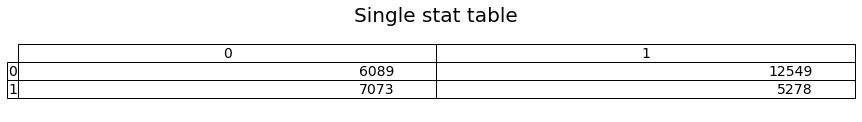

In [15]:
# simple plot

plot_single_stat(various.best_value.max)

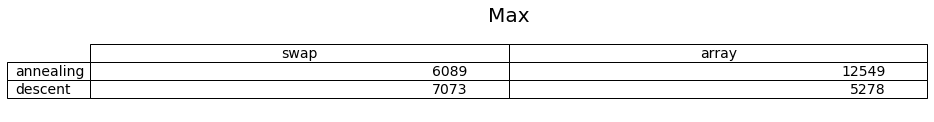

In [16]:
# cleaner plot

plot_single_stat(various.best_value.max, 'Max', ['annealing', 'descent'], ['swap', 'array'])

### Plotting the data from a single run

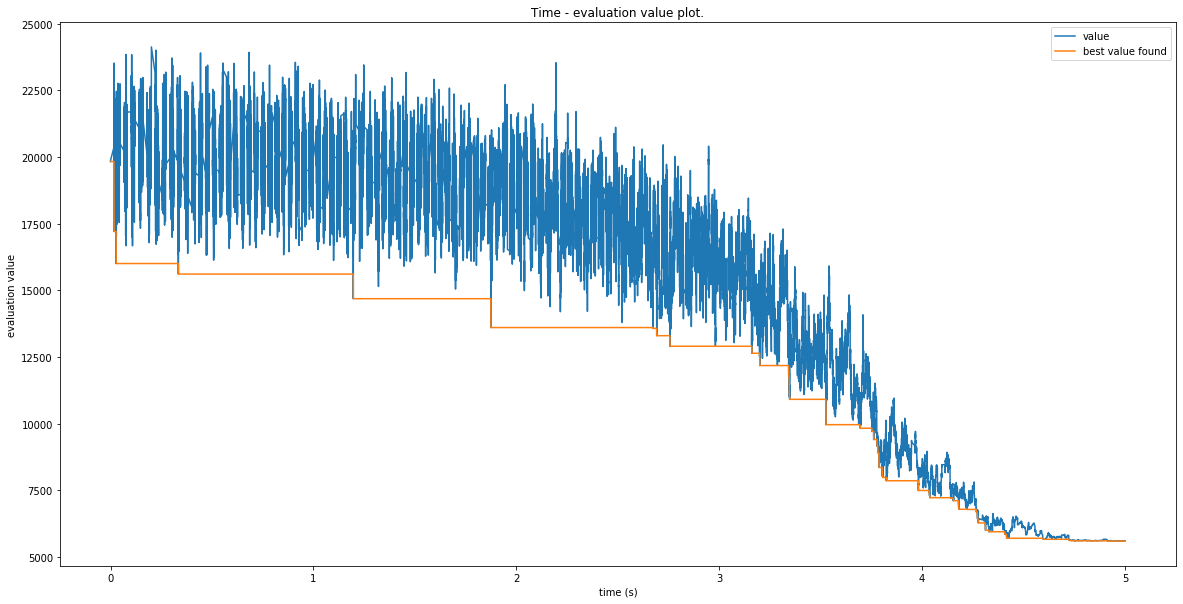

In [17]:
# annealing swap run 0

plot(result[0][0][0].data)

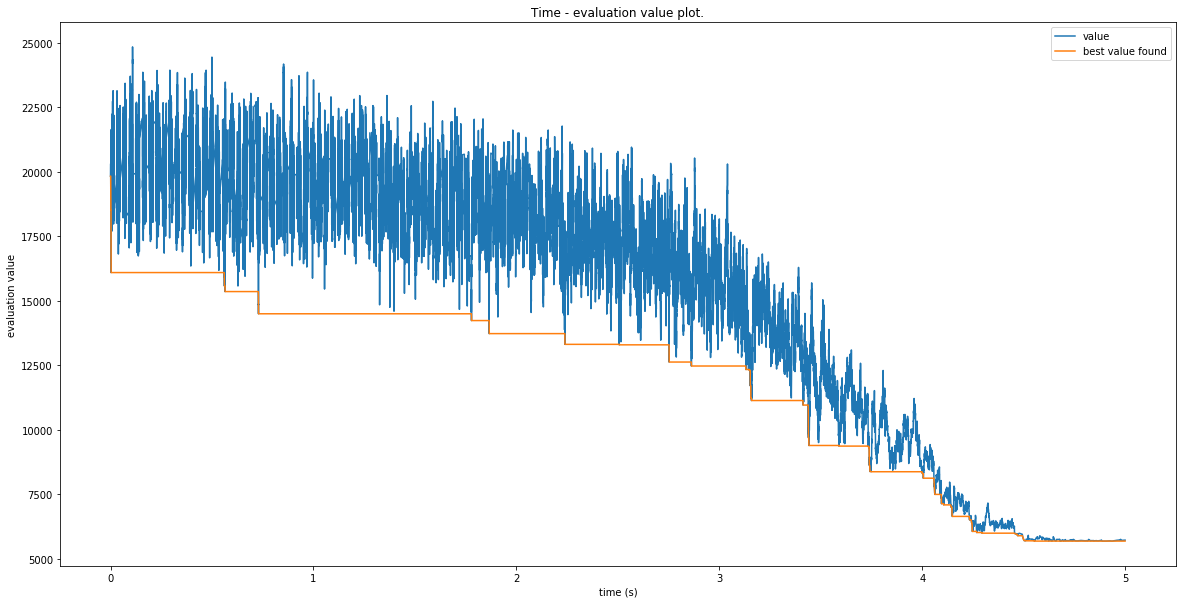

In [18]:
# annealing swap run 1

plot(result[0][0][1].data)

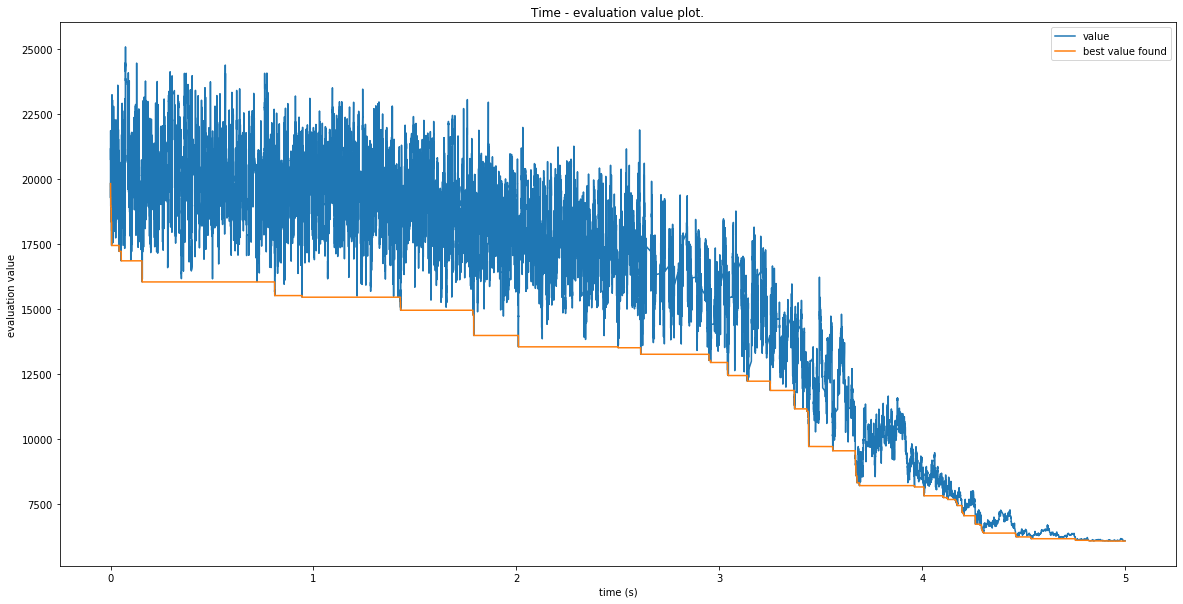

In [19]:
# annealing swap run 2

plot(result[0][0][2].data)

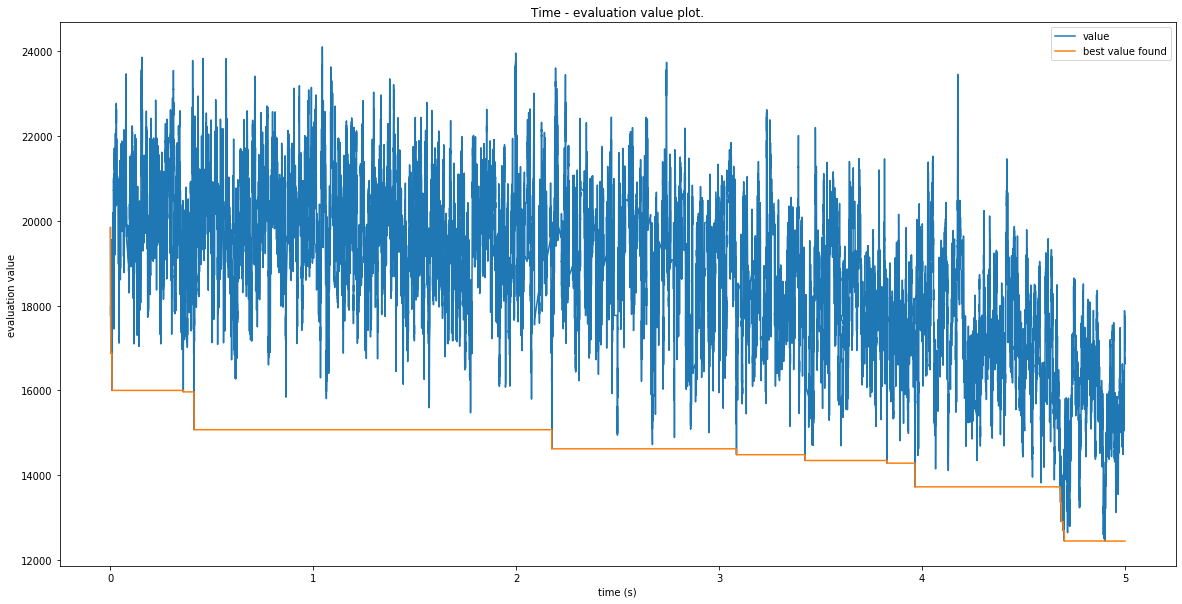

In [20]:
# annealing reverse run 0

plot(result[0][1][0].data)

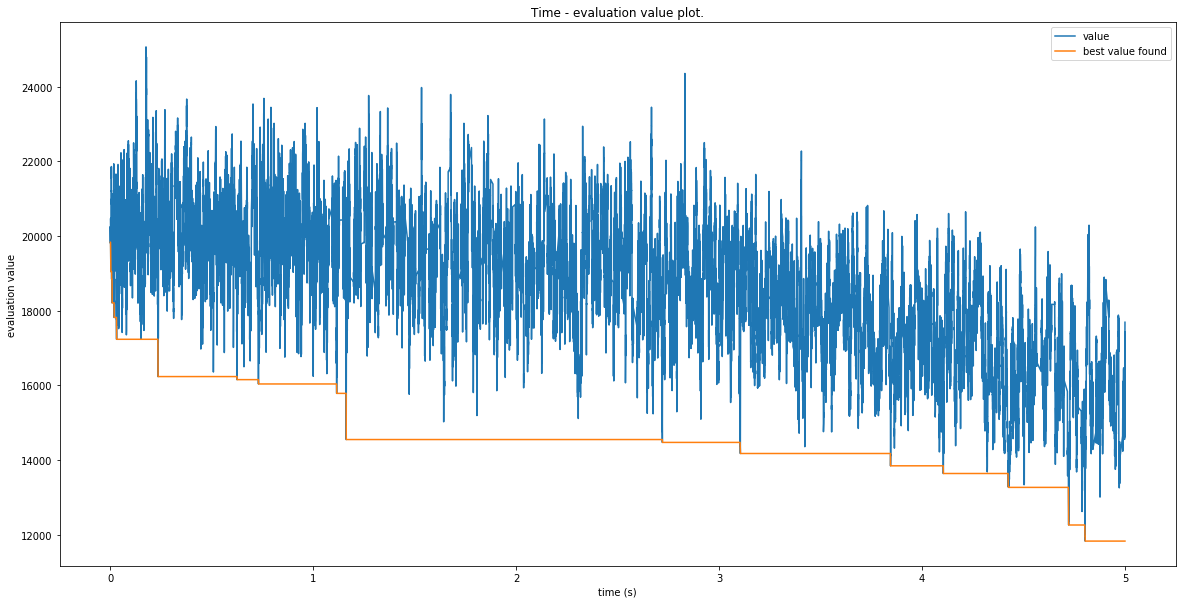

In [21]:
# annealing reverse run 1

plot(result[0][1][1].data)

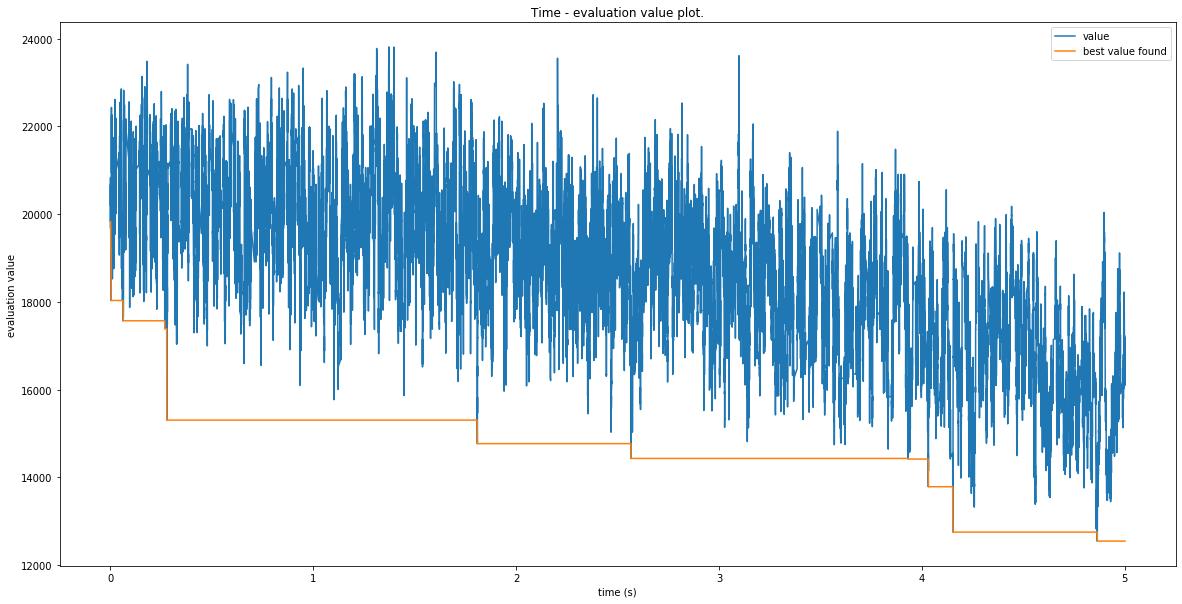

In [22]:
# annealing reverse run 2

plot(result[0][1][2].data)

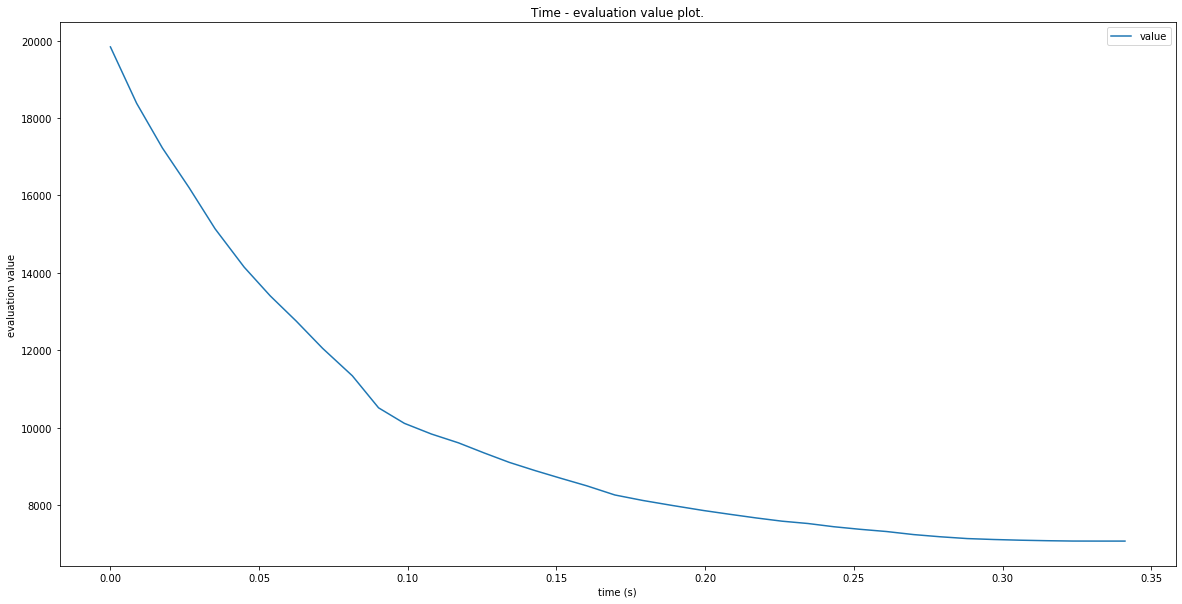

In [23]:
# descent swap run 0 (run 0, 1 and 2 should be almost identical)

plot(result[1][0][0].data)

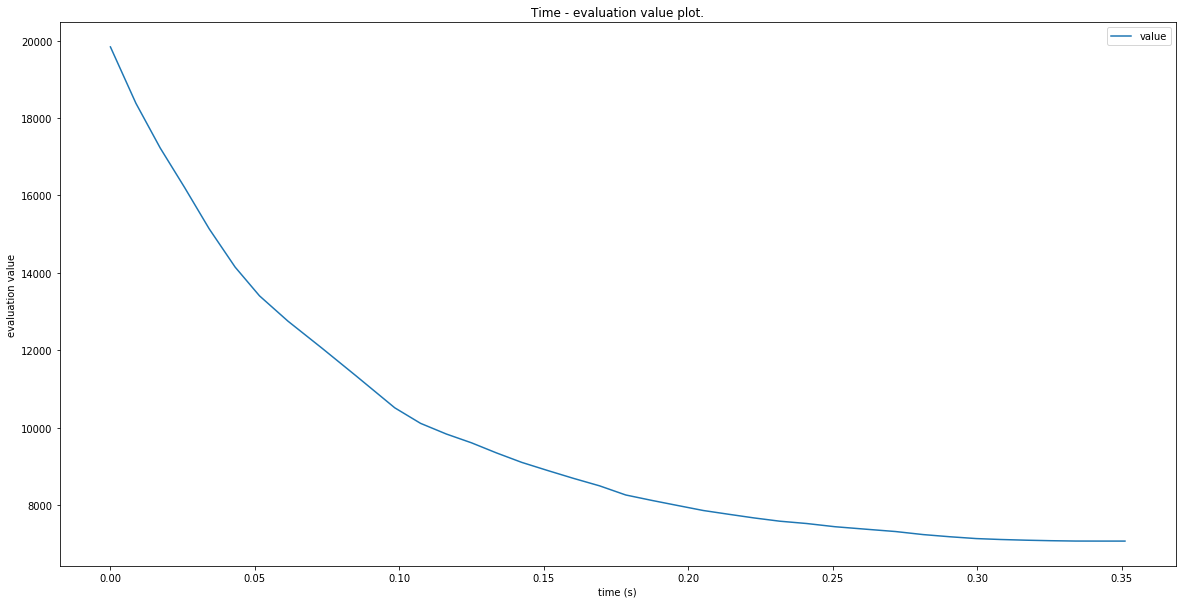

In [24]:
# descent swap run 1 (run 0, 1 and 2 should be almost identical)

plot(result[1][0][1].data)

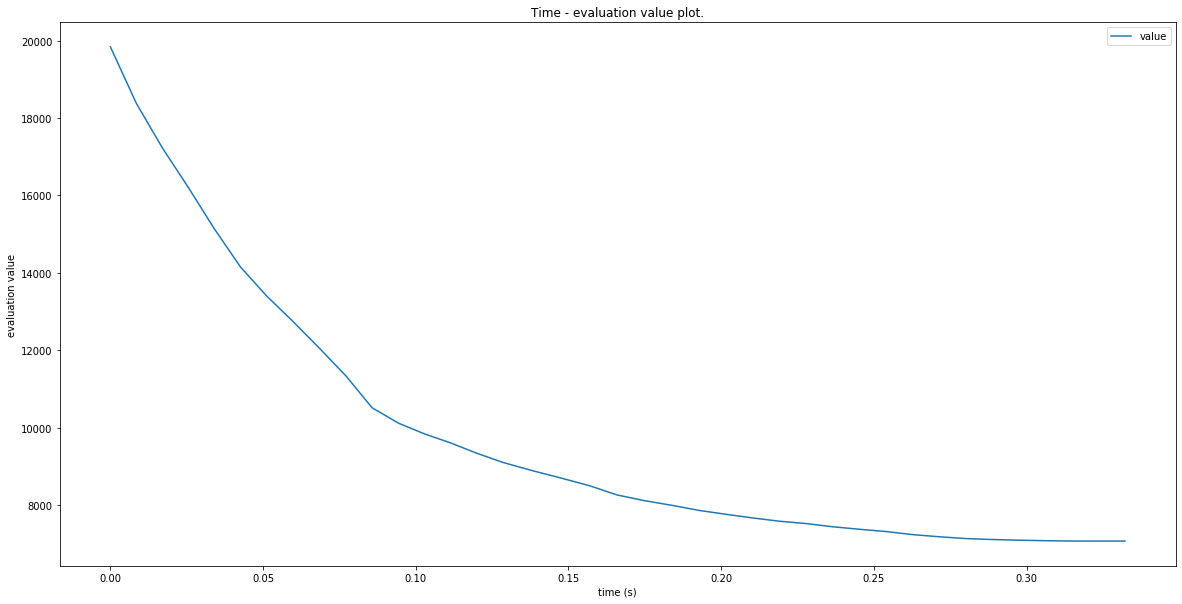

In [25]:
# descent swap run 2 (run 0, 1 and 2 should be almost identical)

plot(result[1][0][2].data)

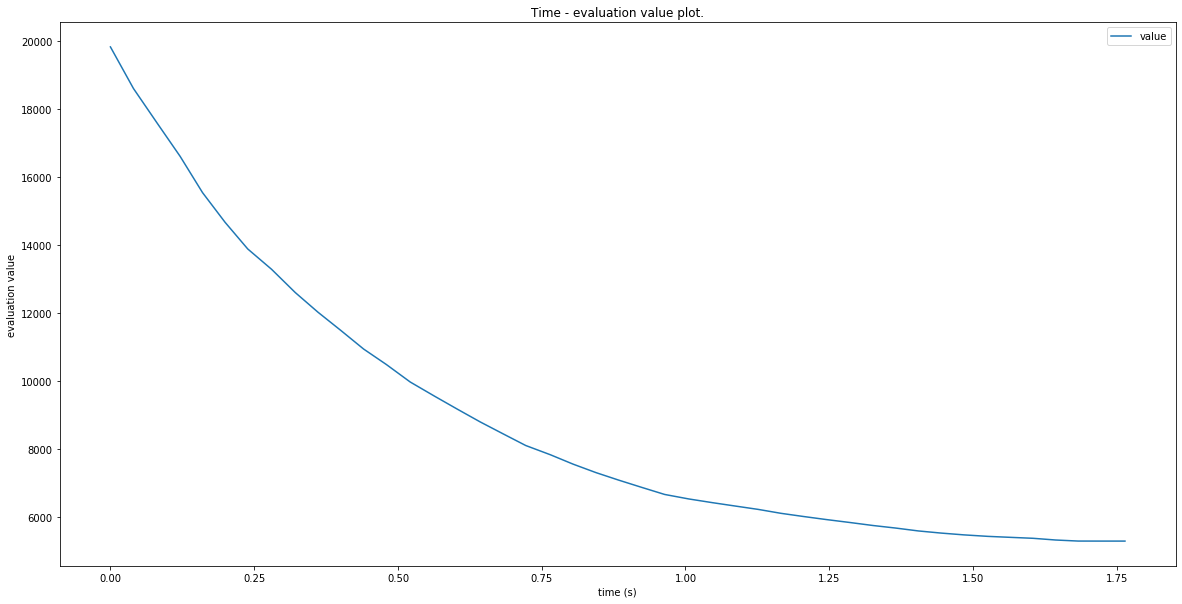

In [26]:
# descent reverse run 0 (run 0, 1 and 2 should be almost identical)

plot(result[1][1][0].data)

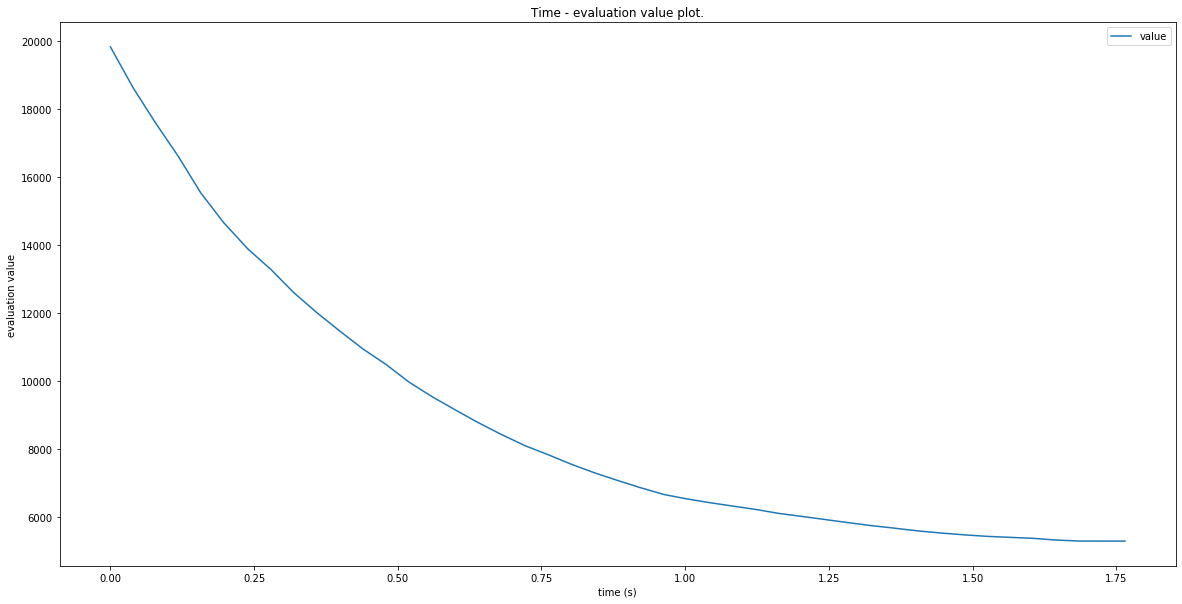

In [27]:
# descent reverse run 1 (run 0, 1 and 2 should be almost identical)

plot(result[1][1][1].data)

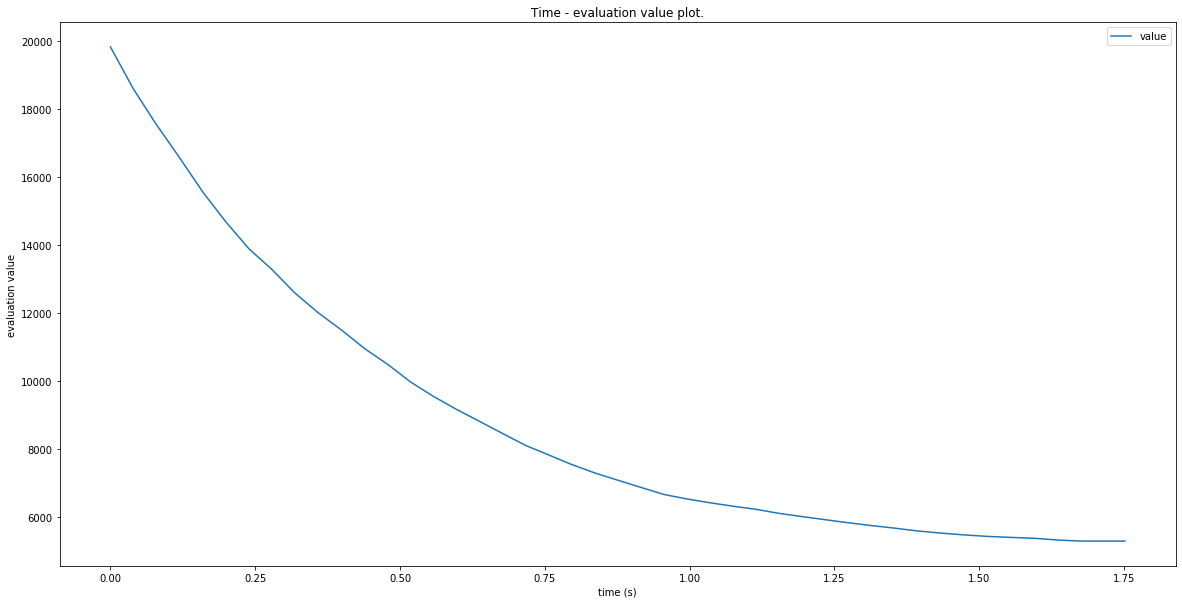

In [28]:
# descent reverse run 2 (run 0, 1 and 2 should be almost identical)

plot(result[1][1][2].data)